# Lab 7

Event selection optimization You and your lab partner should pick different pT (transverse momentum) samples (one uses low-pT sampels and the other use high-pT samples) for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

In this Lab, I'm using the high PT samples. $N_{higgs} = 50$ and $N_{qcd}=2000$

### 1.Make a stacked histogram plot for the feature variable: mass

Evaluate expected significance without any event selection.

 - Use Poisson statistics for significance calculation

 - Compare your number of  NHiggs/(√NQCD) . If they are equivalent, explain your findings.

In [112]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import pickle
import math
from scipy.signal import argrelextrema

plt.rcParams["figure.figsize"] = (20,15)

In [113]:
infile = open ('higgs_100000_pt_1000_1200.pkl','rb')
higgs = pickle.load(infile)
higgs.keys()

file = open ('qcd_100000_pt_1000_1200.pkl','rb')
qcd = pickle.load(file)
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

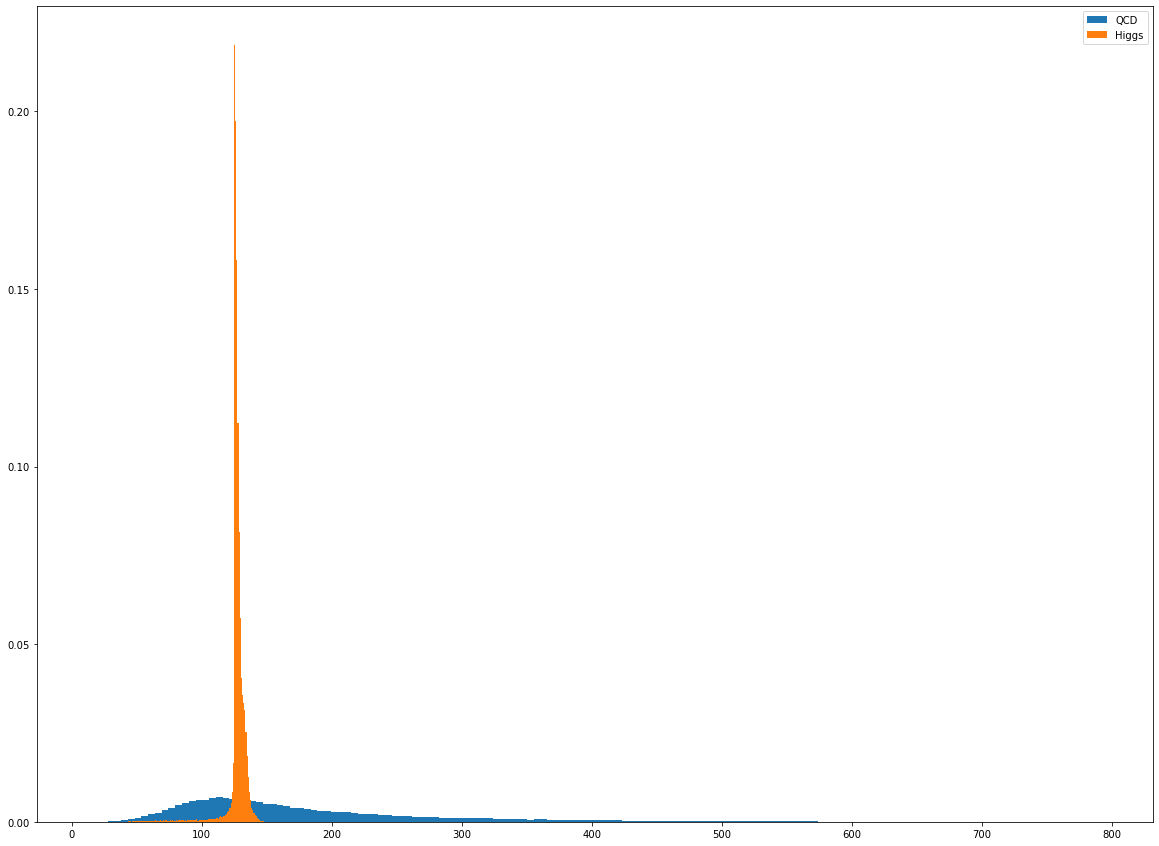

In [114]:
qcd_hist = plt.hist(qcd['mass'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['mass'],density=True, bins=150, label='Higgs')
plt.legend()
plt.show()

We have $N_{QCD}=2000$ and $N_{Higgs}=50$. We can use Poisson statistics for significance calculation:

In [115]:
N_qcd=2000
N_higgs=50
totalN=N_qcd+N_higgs
prob = stats.poisson.sf(totalN, N_qcd)
sig = stats.norm.isf(prob)
print(sig)

1.1282230087754423


Now we calculate the significance using this equation: $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$

In [116]:
print(N_higgs/np.sqrt(N_qcd))

1.118033988749895


I think we can say that they are equivalent. 1.128 and 1.118 are not much different. 

### 2. Identify mass cuts to optimize the expected significance

   - Try different mass cuts systematically
   - Evaluate expeced significance for each set of mass cuts
   - Identify the set of the mass cuts which give you the highest significance.

In [117]:
#Cut 1 ;[110,150]
size= len(higgs['mass'])
higgs_cut = (higgs['mass']>110) & (higgs['mass'] <150)
qcd_cut = (qcd['mass']>110) & (qcd['mass'] <150)
new_N_higgs = 50*len(higgs['mass'][higgs_cut])/size
new_N_qcd = 2000*len(qcd['mass'][qcd_cut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
#print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

Expected significance is 2.179982343338033


In [118]:
#Cut 2 ;[120,140]
higgs_cut = (higgs['mass']>120) & (higgs['mass'] <140)
qcd_cut = (qcd['mass']>120) & (qcd['mass'] <140)
new_N_higgs = 50*len(higgs['mass'][higgs_cut])/size
new_N_qcd = 2000*len(qcd['mass'][qcd_cut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
#print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

Expected significance is 3.009284136100454


In [119]:
#Cut 3 ;[125,135]
higgs_cut = (higgs['mass']>125) & (higgs['mass'] <135)
qcd_cut = (qcd['mass']>125) & (qcd['mass'] <135)
new_N_higgs = 50*len(higgs['mass'][higgs_cut])/size
new_N_qcd = 2000*len(qcd['mass'][qcd_cut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
#print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

Expected significance is 3.700282119535471


The cut range from 125 to 135, give me the highest significance is 3.7

### 3. Make stacked histogram plots for the reset of features

#### Set A of plots without any event selection 

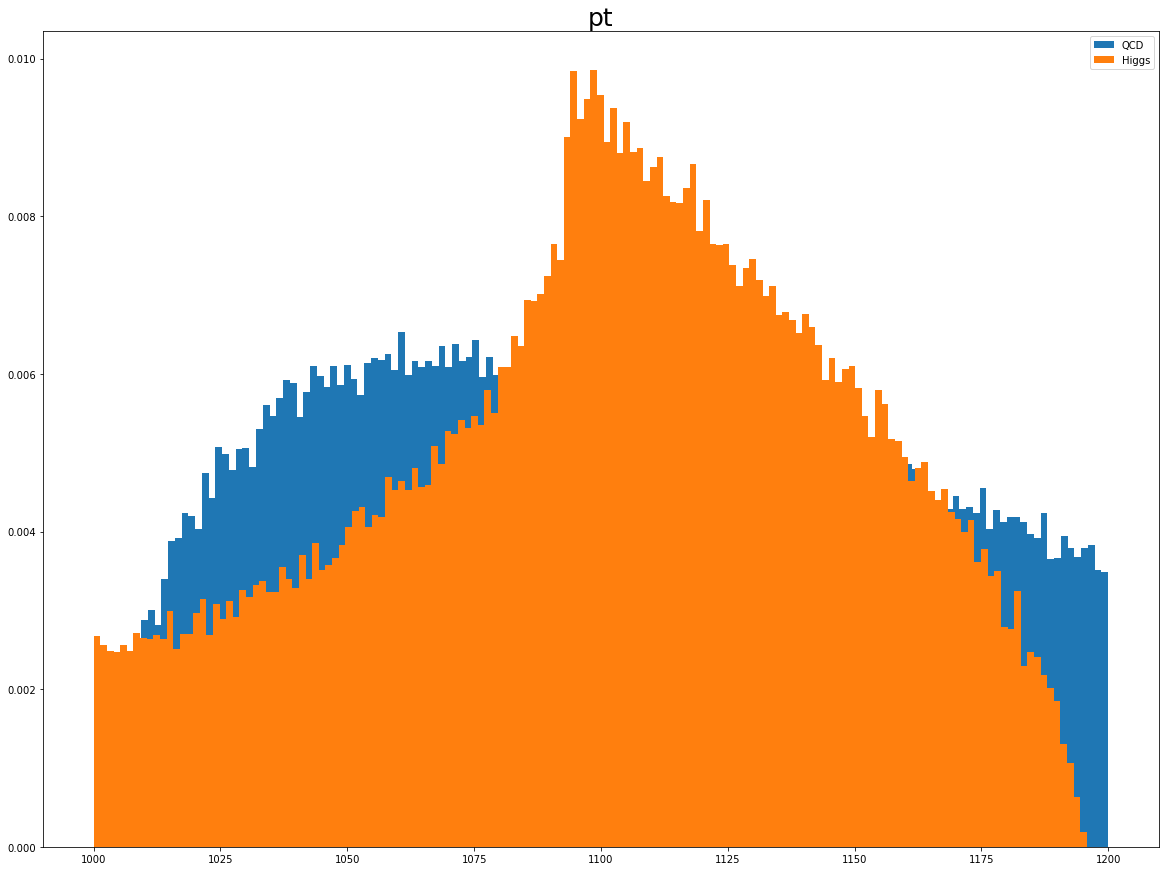

In [120]:
qcd_hist = plt.hist(qcd['pt'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['pt'],density=True, bins=150, label='Higgs')
plt.title('pt',size=25)
plt.legend()
plt.show()

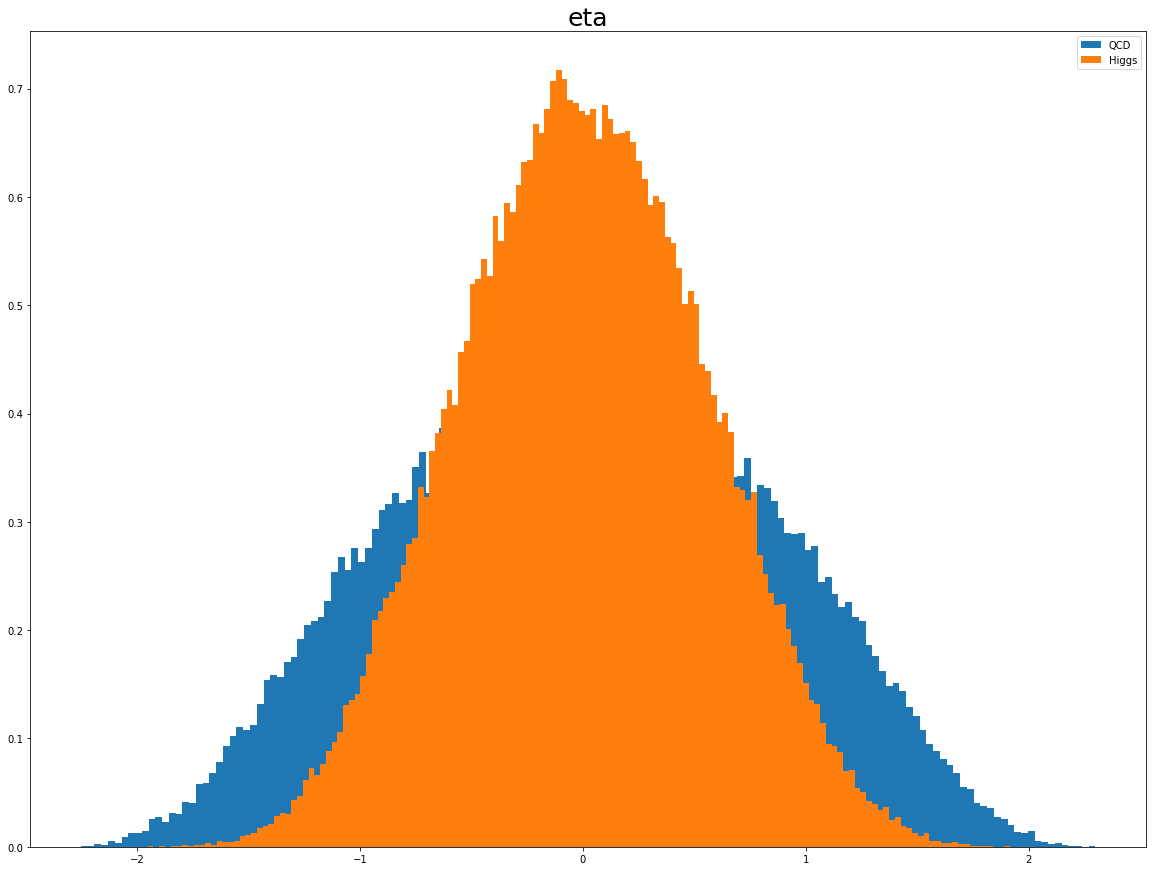

In [121]:
qcd_hist = plt.hist(qcd['eta'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['eta'],density=True, bins=150, label='Higgs')
plt.title('eta',size=25)
plt.legend()
plt.show()

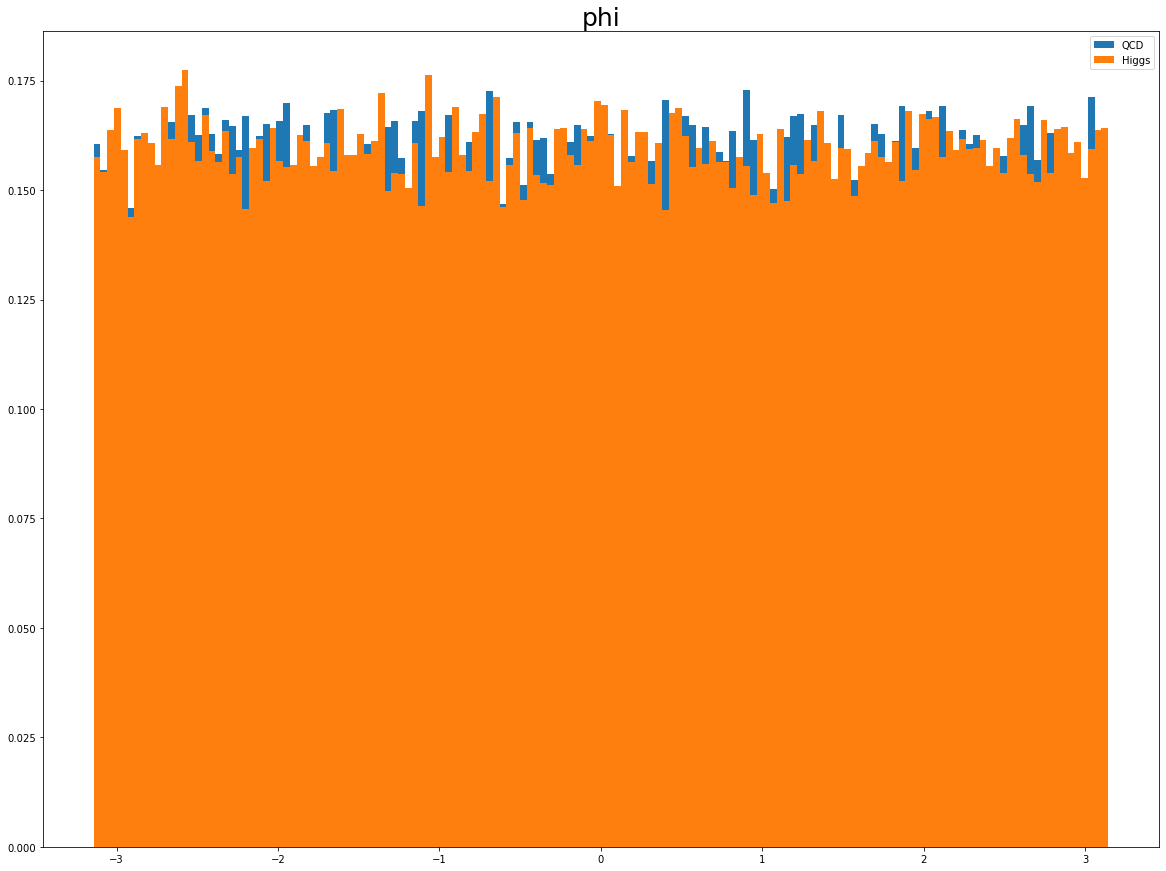

In [122]:
qcd_hist = plt.hist(qcd['phi'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['phi'],density=True, bins=150, label='Higgs')
plt.title('phi',size=25)
plt.legend()
plt.show()

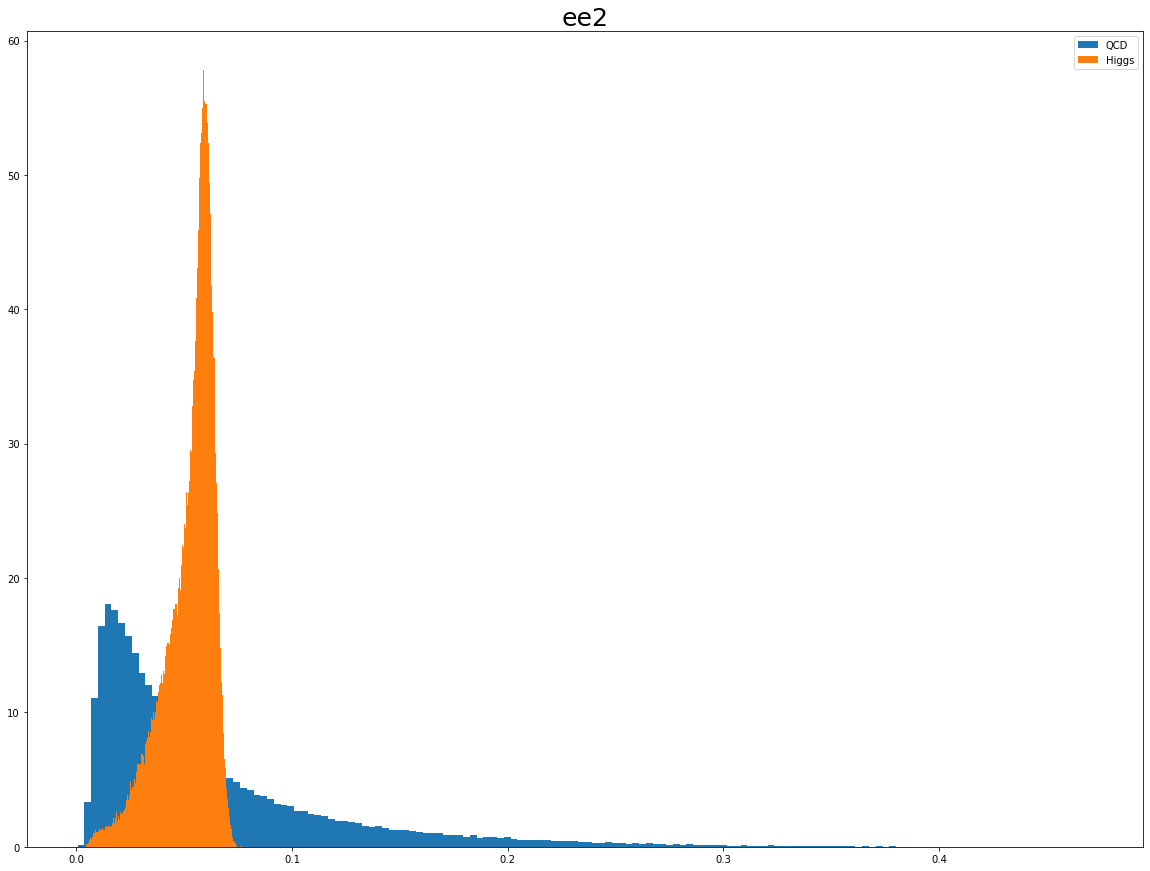

In [123]:
qcd_hist = plt.hist(qcd['ee2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['ee2'],density=True, bins=150, label='Higgs')
plt.title('ee2',size=25)
plt.legend()
plt.show()

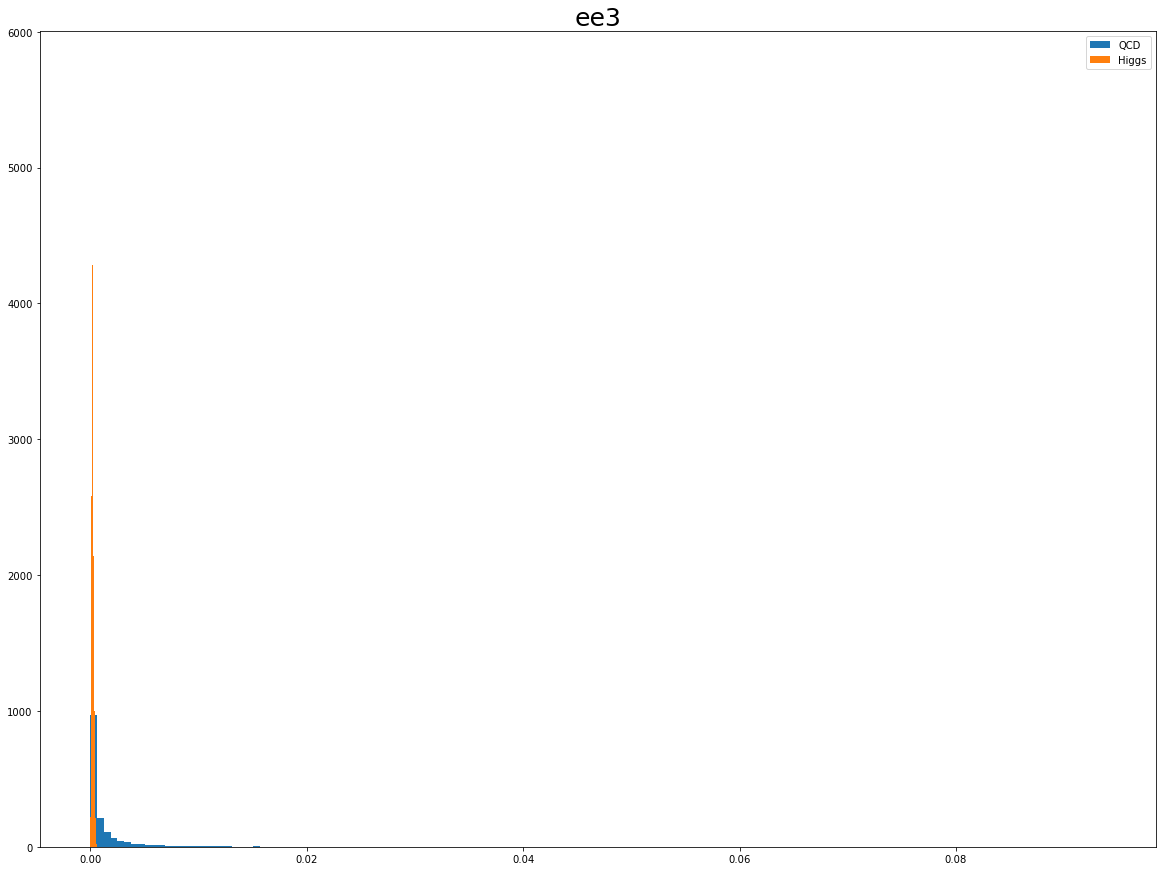

In [124]:
qcd_hist = plt.hist(qcd['ee3'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['ee3'],density=True, bins=150, label='Higgs')
plt.title('ee3',size=25)
plt.legend()
plt.show()

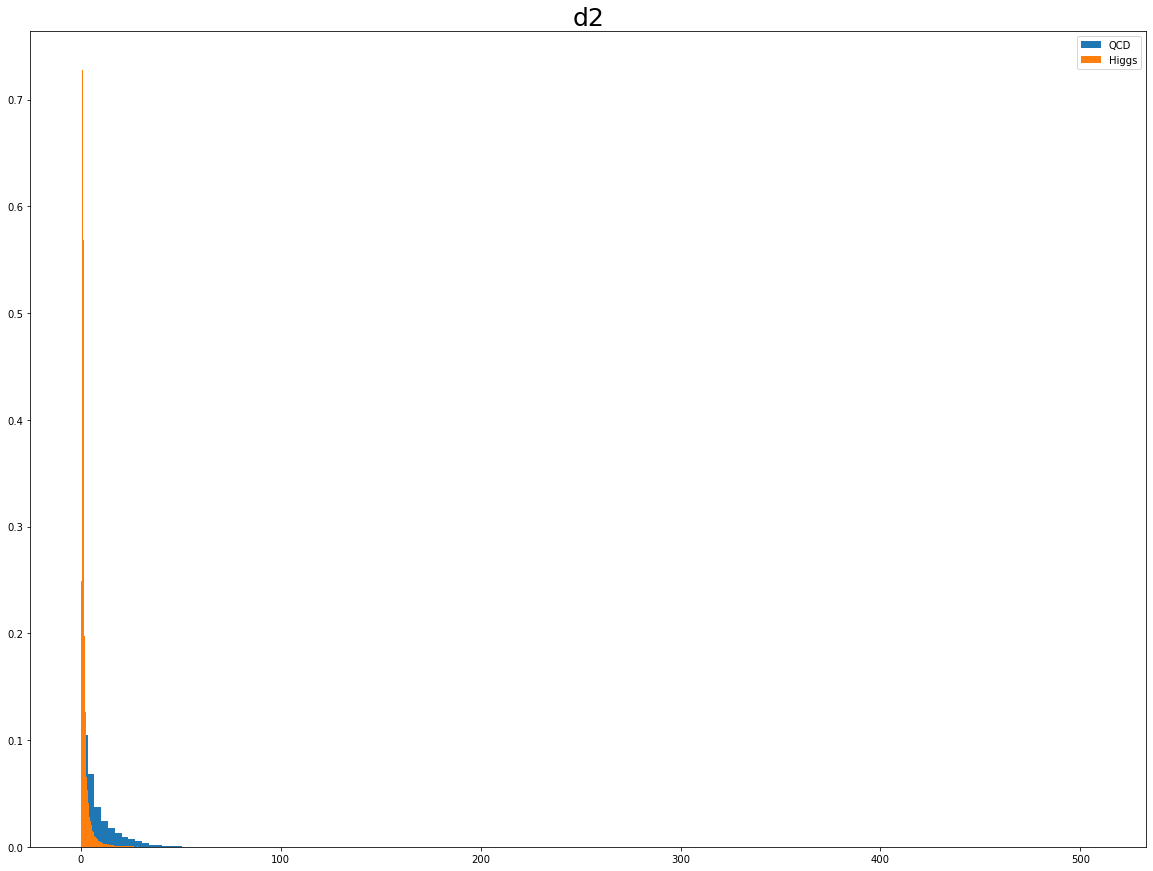

In [125]:
qcd_hist = plt.hist(qcd['d2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['d2'],density=True, bins=150, label='Higgs')
plt.title('d2',size=25)
plt.legend()
plt.show()

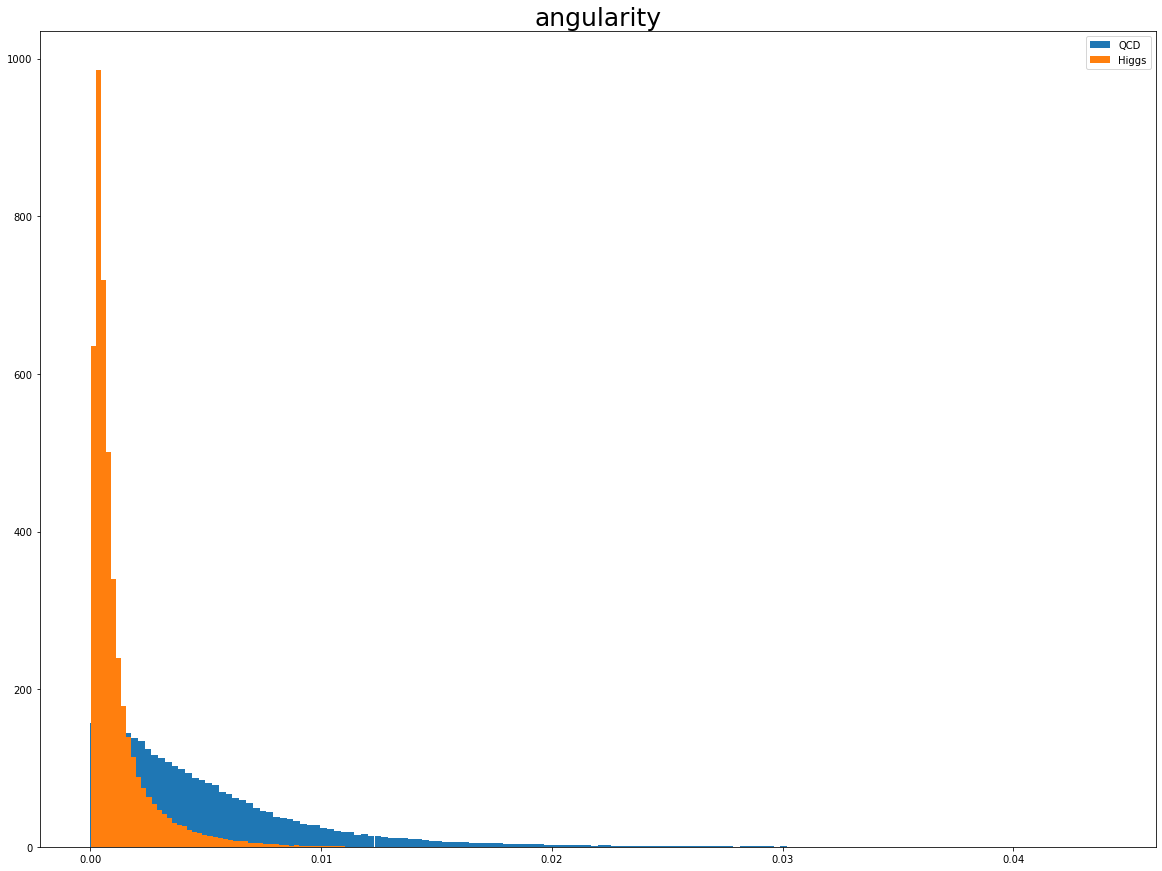

In [126]:
qcd_hist = plt.hist(qcd['angularity'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['angularity'],density=True, bins=150, label='Higgs')
plt.title('angularity',size=25)
plt.legend()
plt.show()

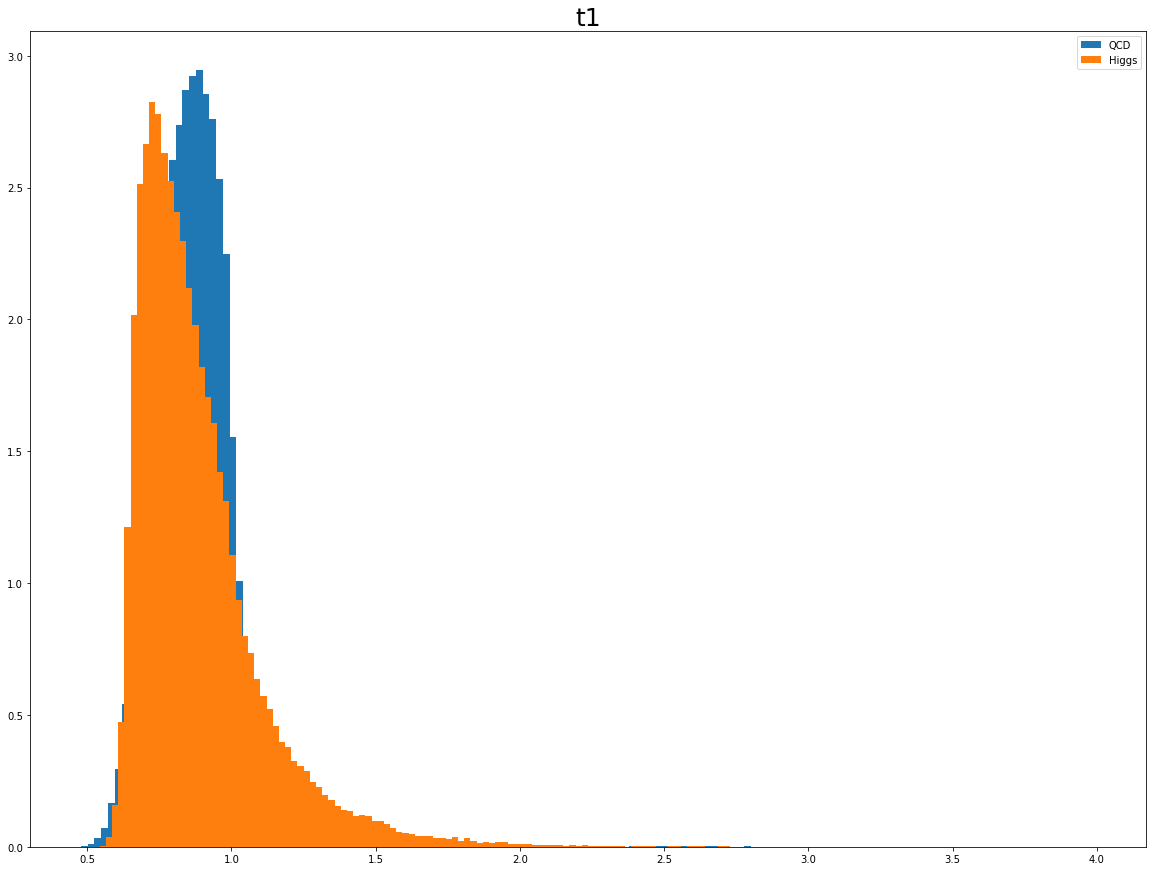

In [127]:
qcd_hist = plt.hist(qcd['t1'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['t1'],density=True, bins=150, label='Higgs')
plt.title('t1',size=25)
plt.legend()
plt.show()

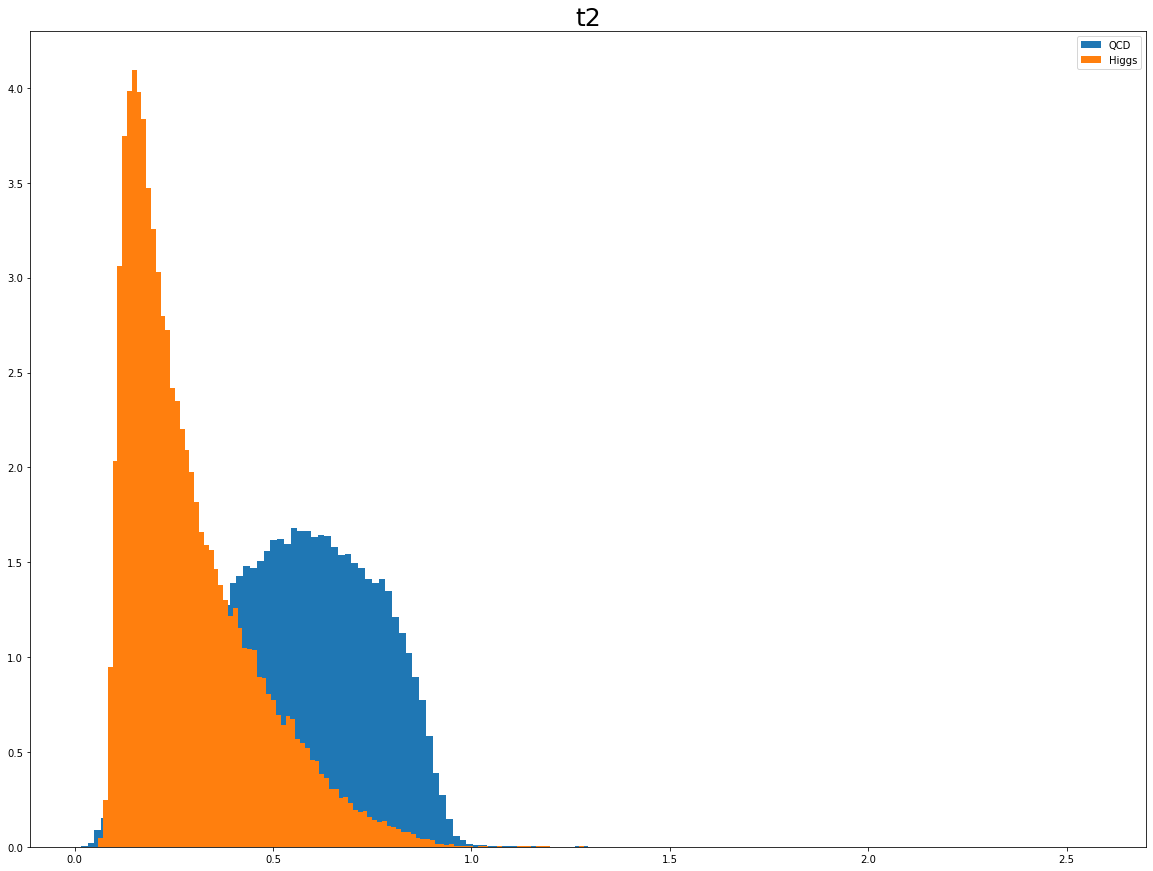

In [128]:
qcd_hist = plt.hist(qcd['t2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['t2'],density=True, bins=150, label='Higgs')
plt.title('t2',size=25)
plt.legend()
plt.show()

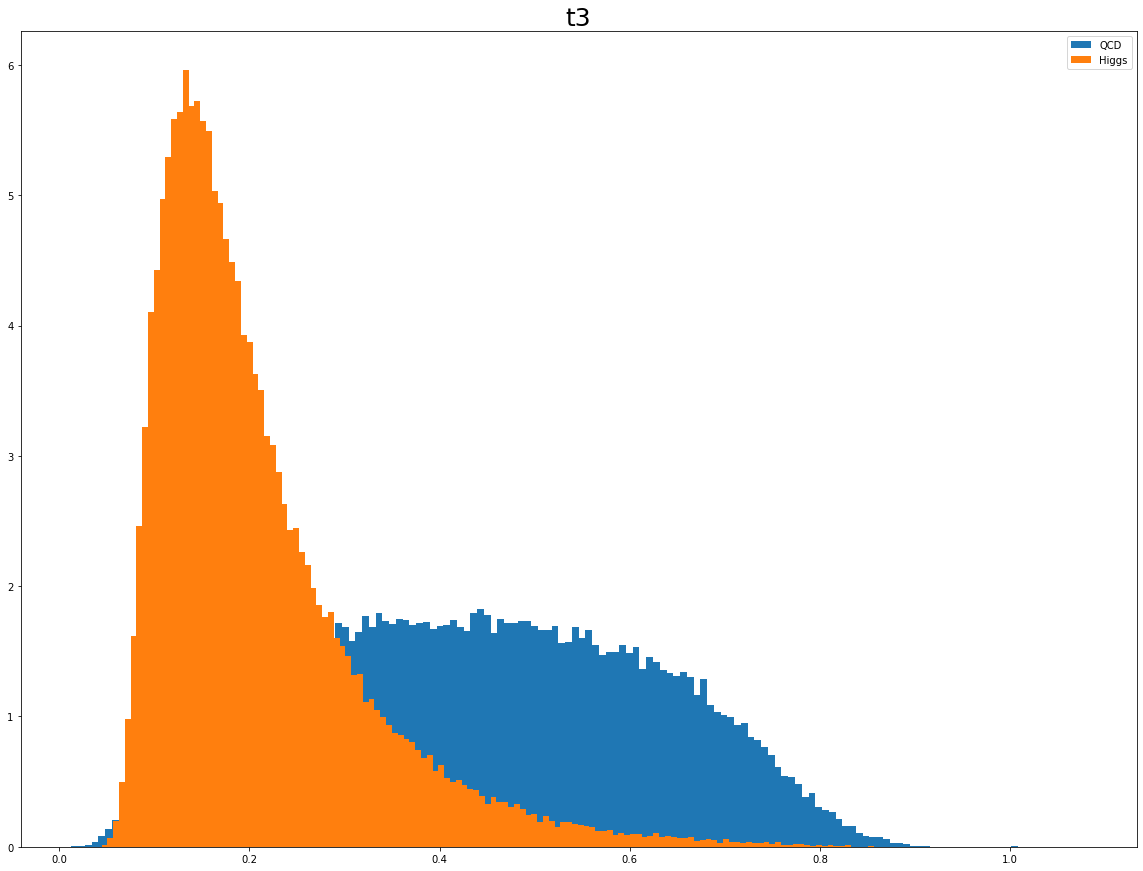

In [129]:
qcd_hist = plt.hist(qcd['t3'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['t3'],density=True, bins=150, label='Higgs')
plt.title('t3',size=25)
plt.legend()
plt.show()

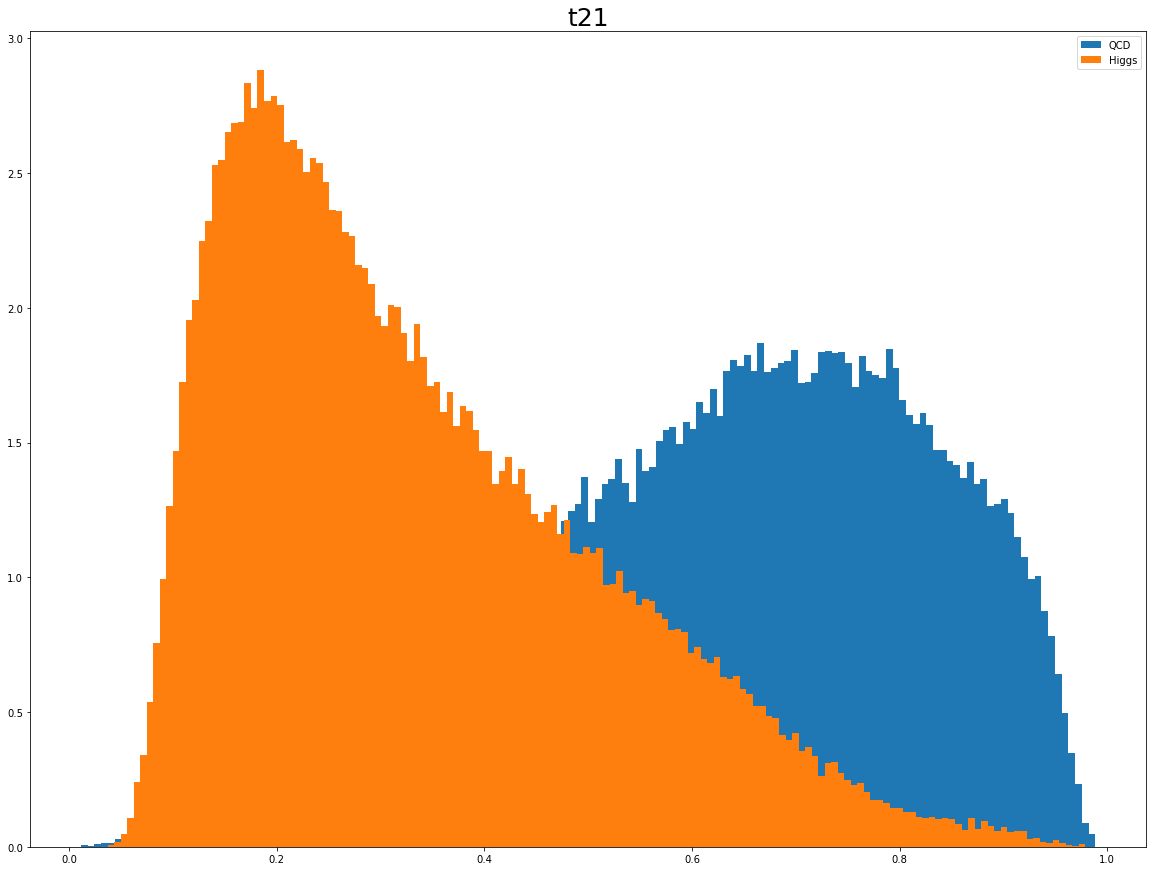

In [130]:
qcd_hist = plt.hist(qcd['t21'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['t21'],density=True, bins=150, label='Higgs')
plt.title('t21',size=25)
plt.legend()
plt.show()

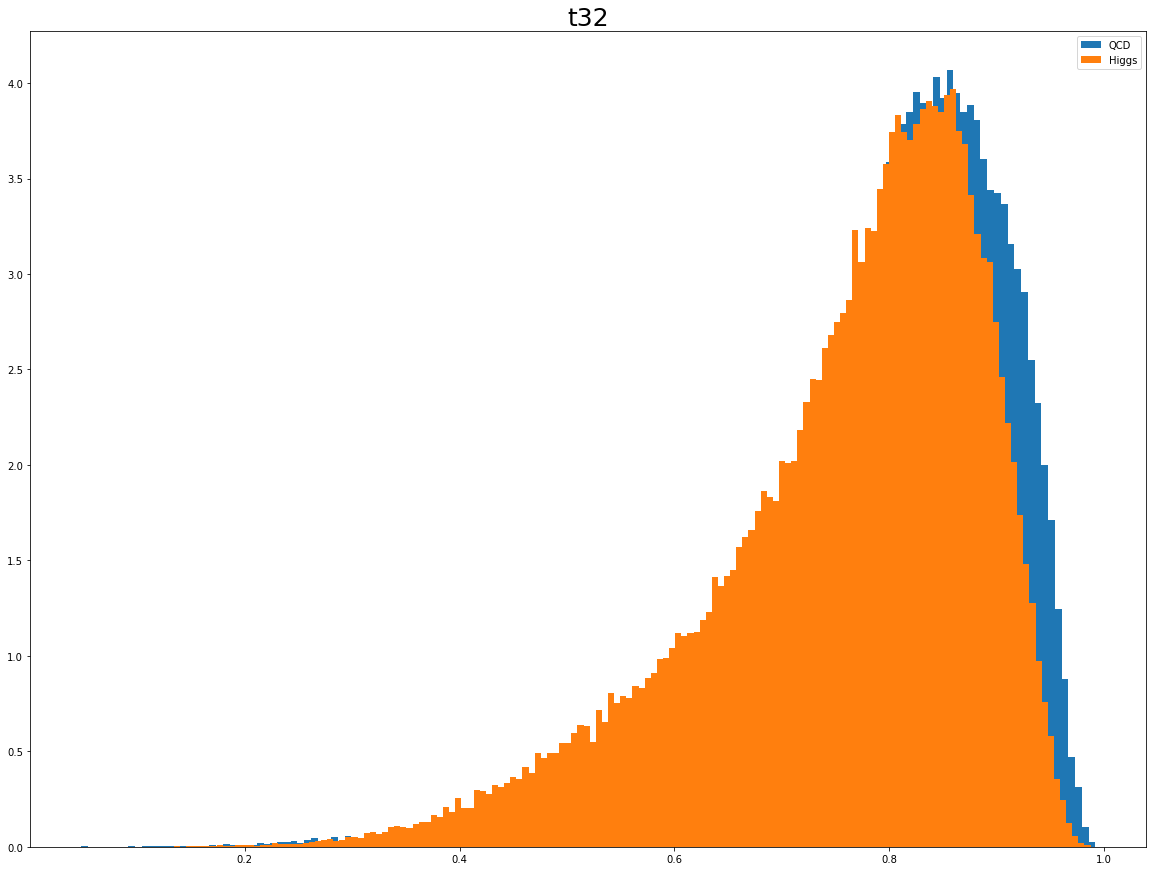

In [131]:
qcd_hist = plt.hist(qcd['t32'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['t32'],density=True, bins=150, label='Higgs')
plt.title('t32',size=25)
plt.legend()
plt.show()

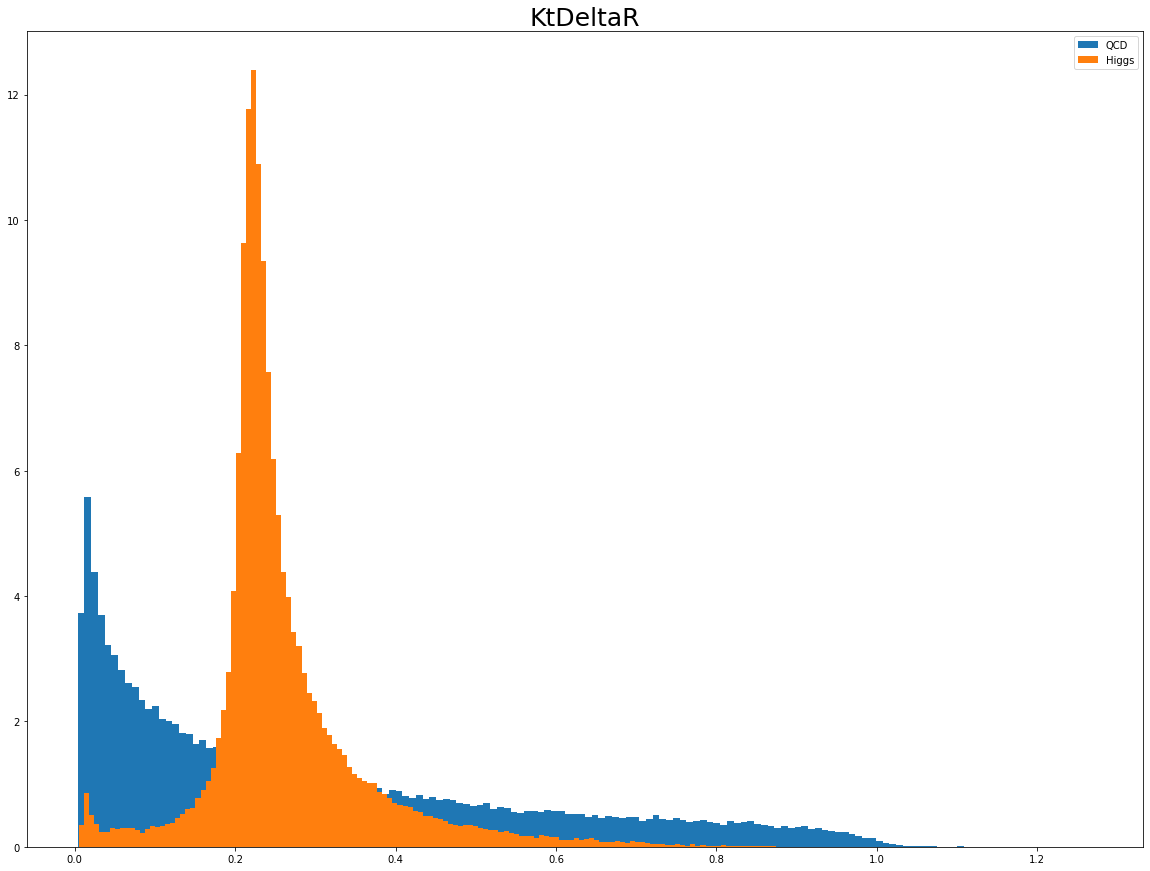

In [132]:
qcd_hist = plt.hist(qcd['KtDeltaR'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs['KtDeltaR'],density=True, bins=150, label='Higgs')
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

#### Set B of plots with your optimal mass cuts

In [133]:
higgs_cut = higgs[(higgs['mass']>125) & (higgs['mass'] <135)]
qcd_cut = qcd[(qcd['mass']>125) & (qcd['mass'] <135)]

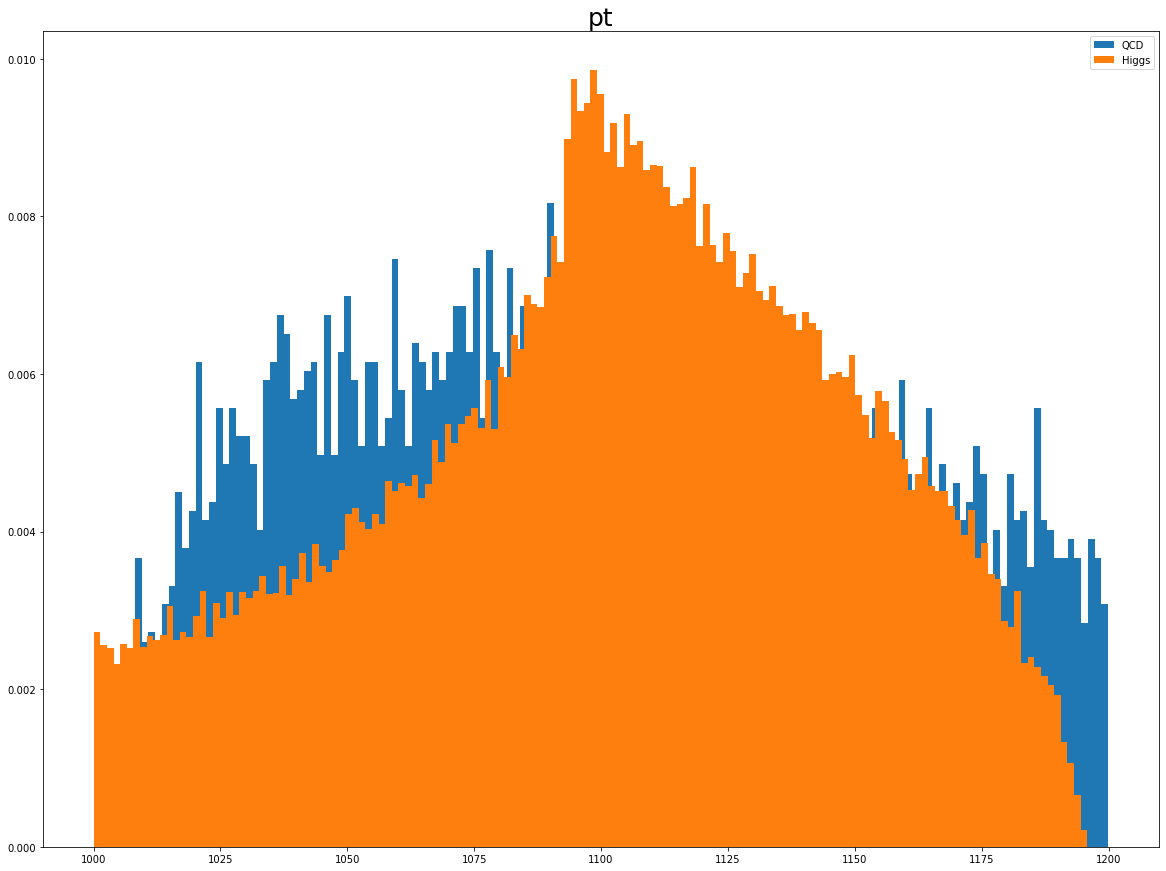

In [134]:
qcd_hist = plt.hist(qcd_cut['pt'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['pt'],density=True, bins=150, label='Higgs')
plt.title('pt',size=25)
plt.legend()
plt.show()

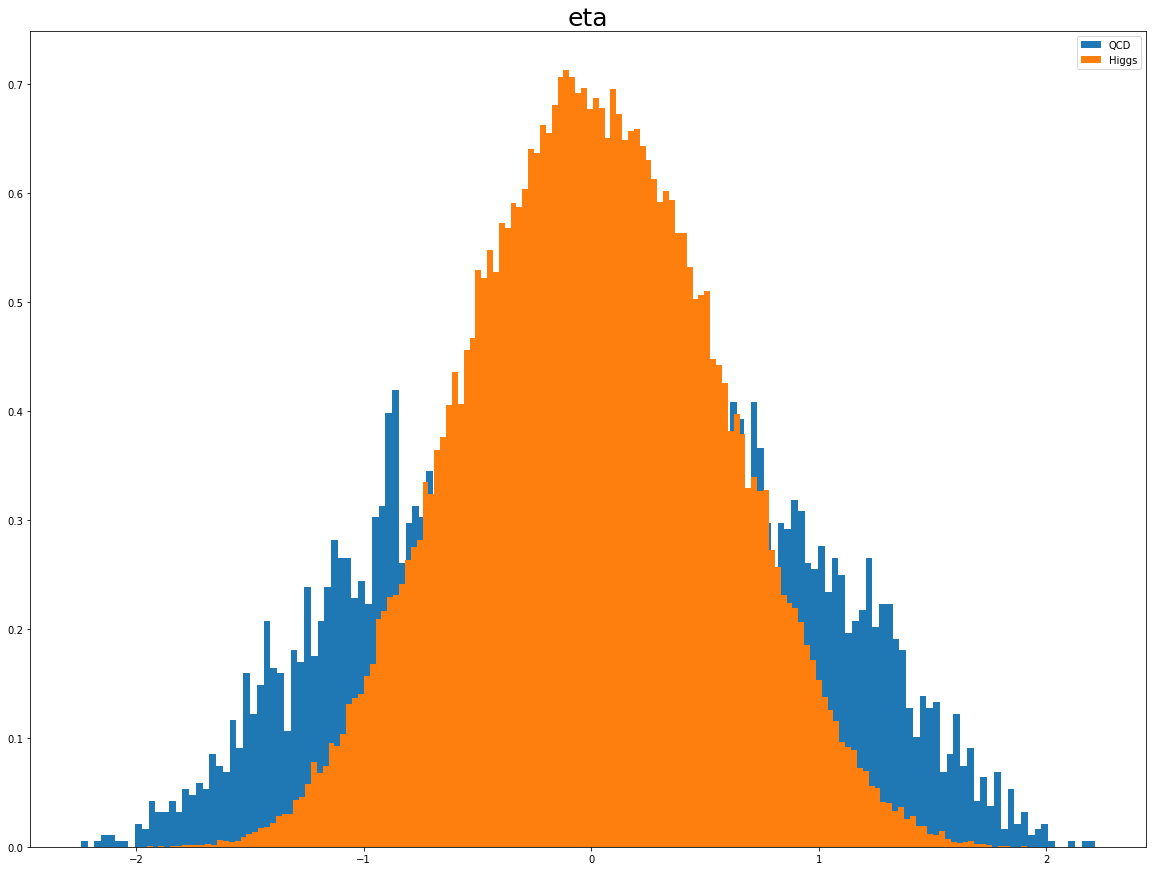

In [135]:
qcd_hist = plt.hist(qcd_cut['eta'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['eta'],density=True, bins=150, label='Higgs')
plt.title('eta',size=25)
plt.legend()
plt.show()

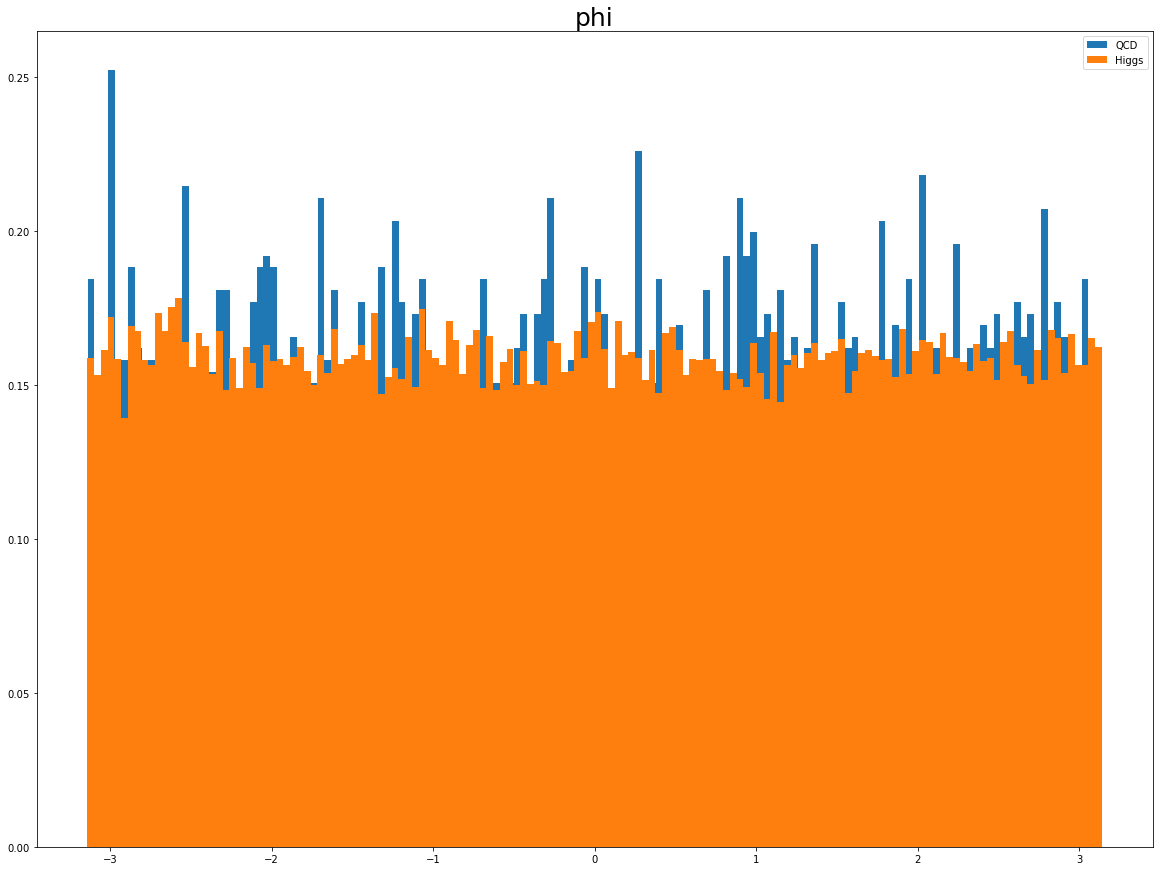

In [136]:
qcd_hist = plt.hist(qcd_cut['phi'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['phi'],density=True, bins=150, label='Higgs')
plt.title('phi',size=25)
plt.legend()
plt.show()

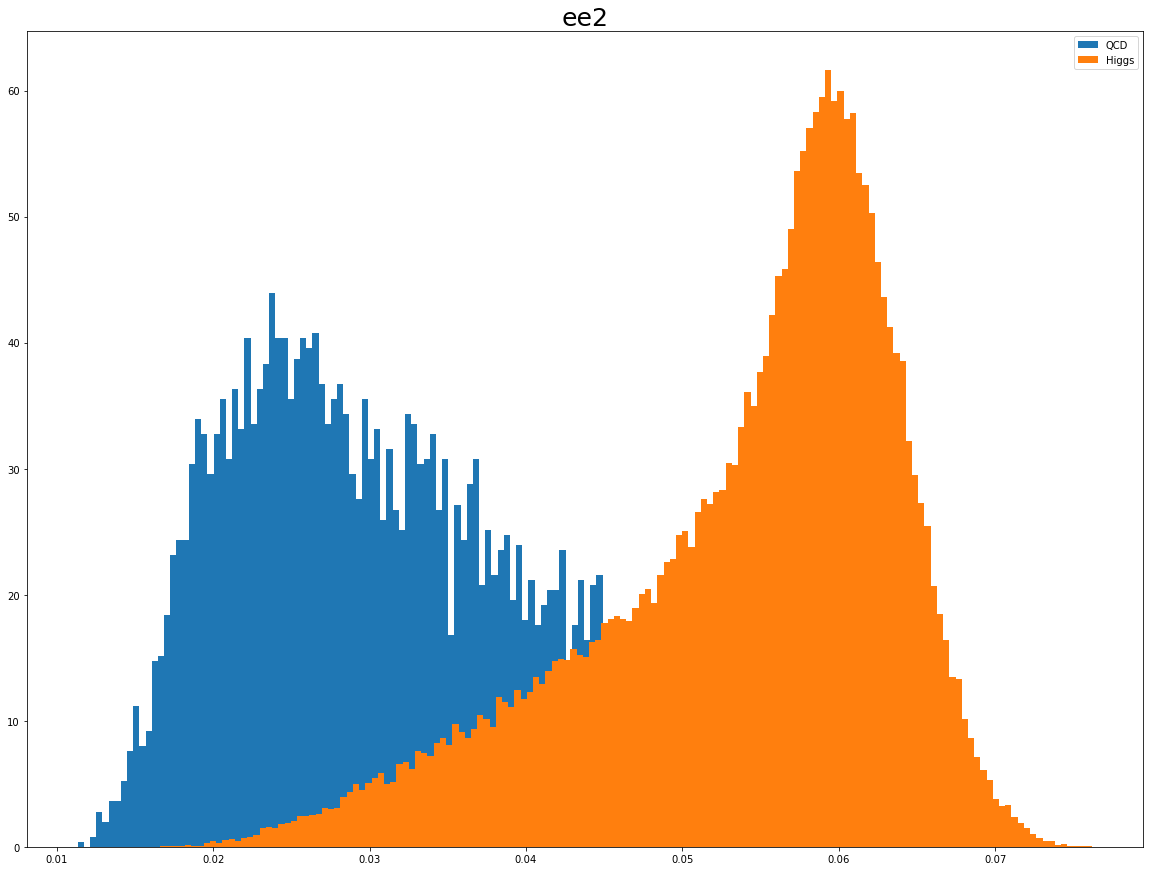

In [137]:
qcd_hist = plt.hist(qcd_cut['ee2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['ee2'],density=True, bins=150, label='Higgs')
plt.title('ee2',size=25)
plt.legend()
plt.show()

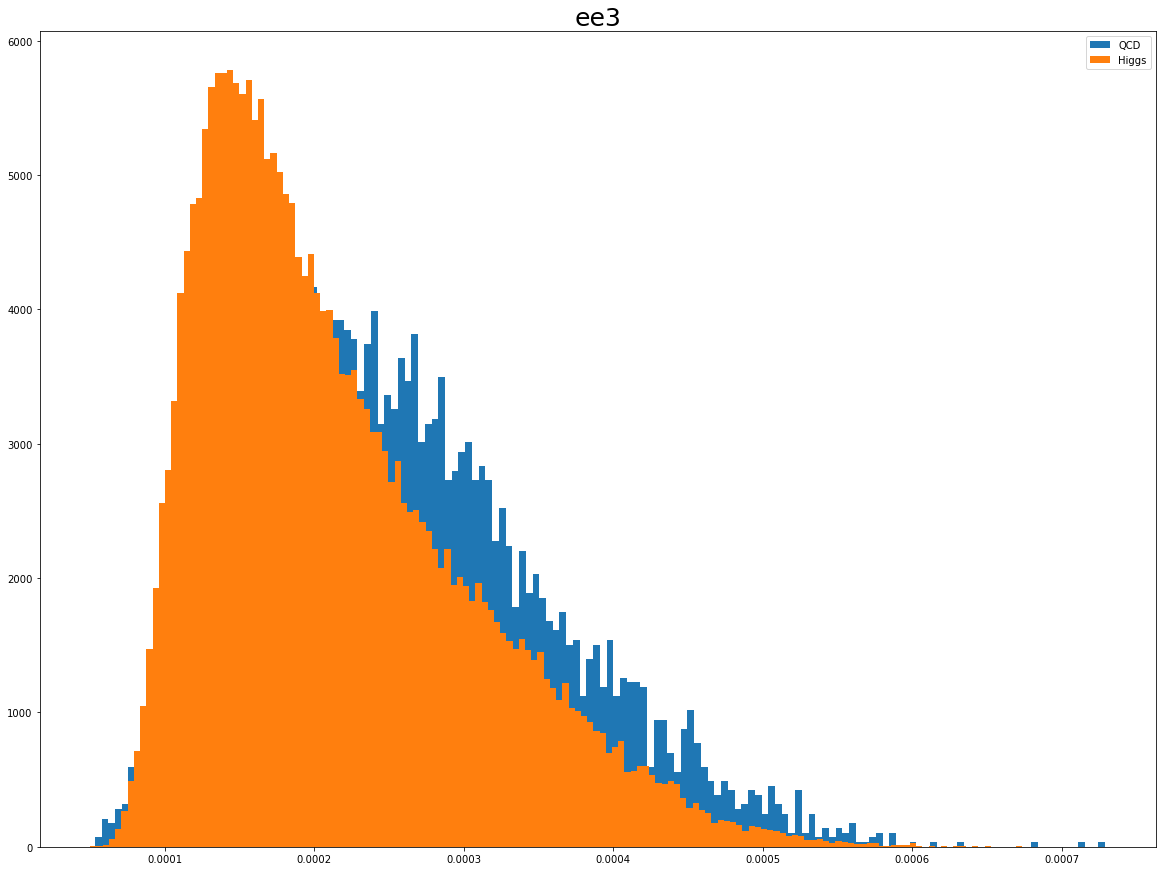

In [138]:
qcd_hist = plt.hist(qcd_cut['ee3'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['ee3'],density=True, bins=150, label='Higgs')
plt.title('ee3',size=25)
plt.legend()
plt.show()

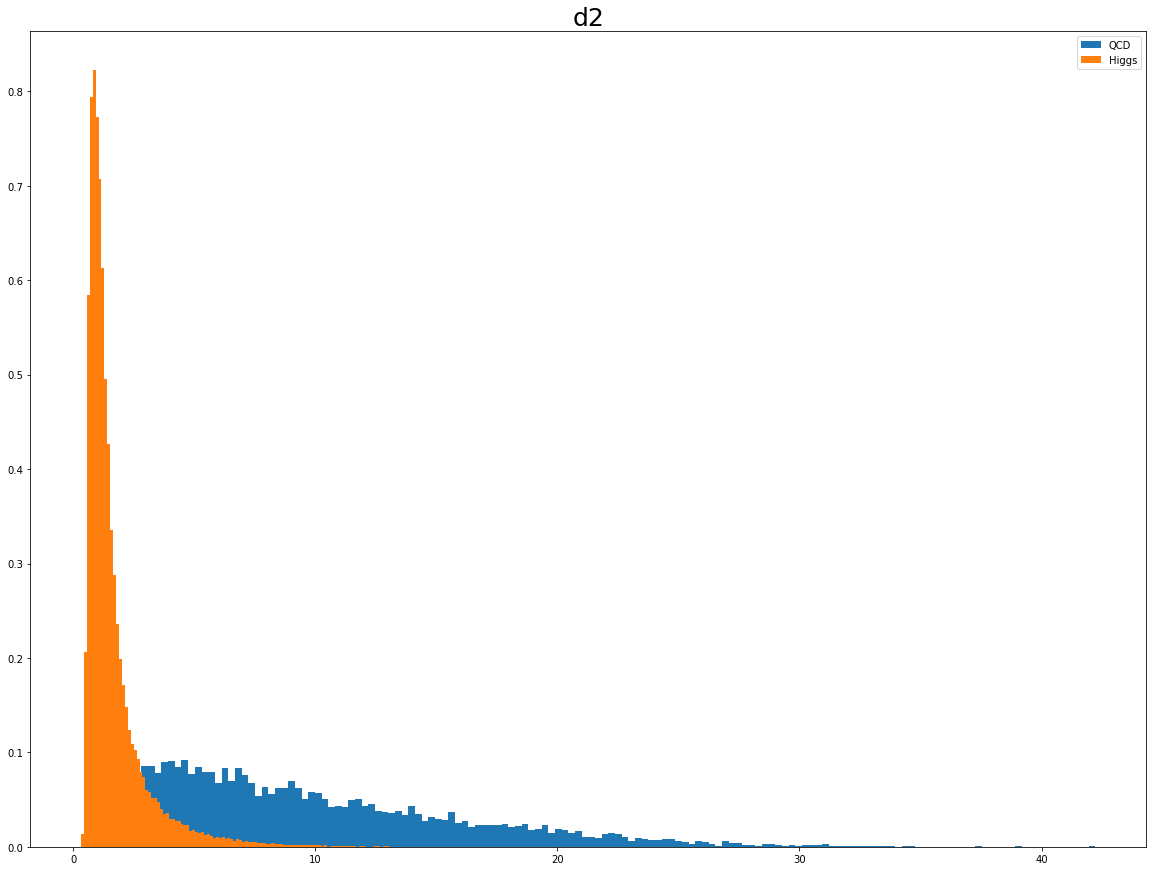

In [139]:
qcd_hist = plt.hist(qcd_cut['d2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['d2'],density=True, bins=150, label='Higgs')
plt.title('d2',size=25)
plt.legend()
plt.show()

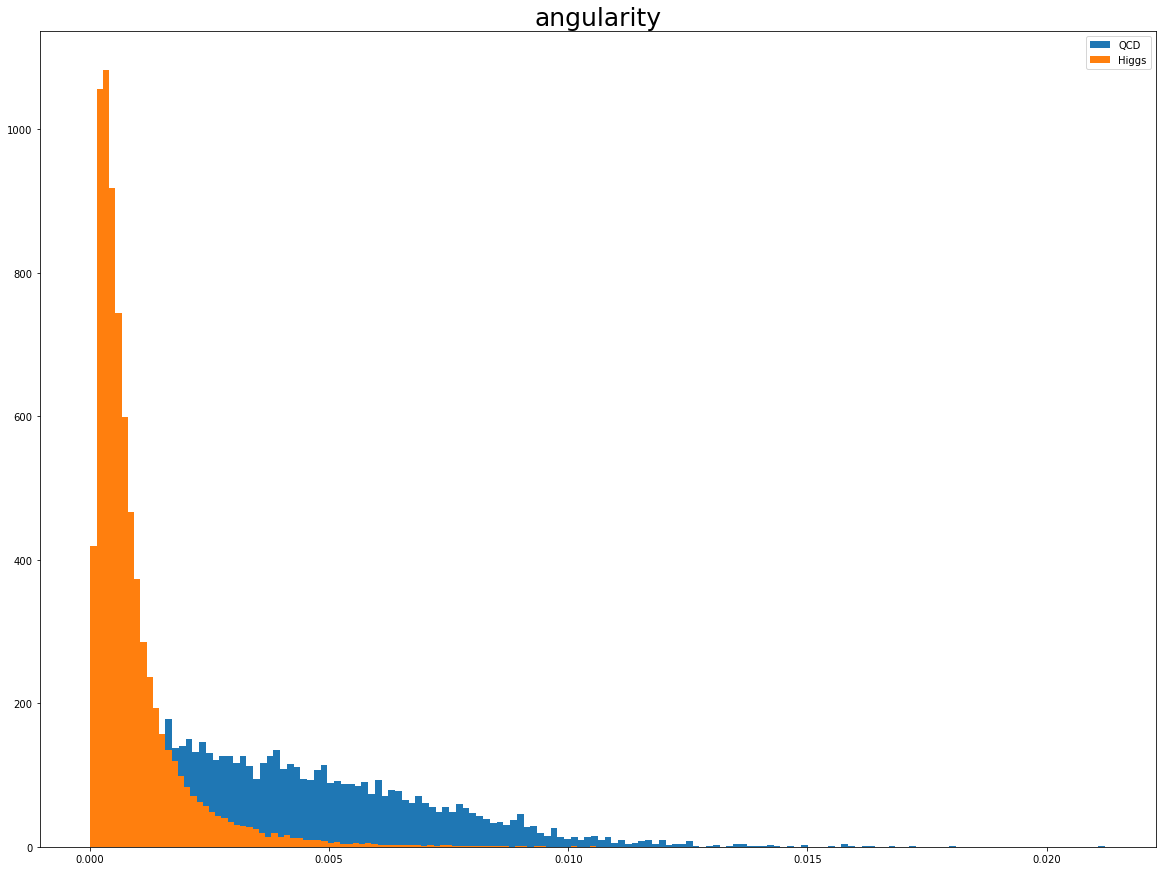

In [140]:
qcd_hist = plt.hist(qcd_cut['angularity'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['angularity'],density=True, bins=150, label='Higgs')
plt.title('angularity',size=25)
plt.legend()
plt.show()

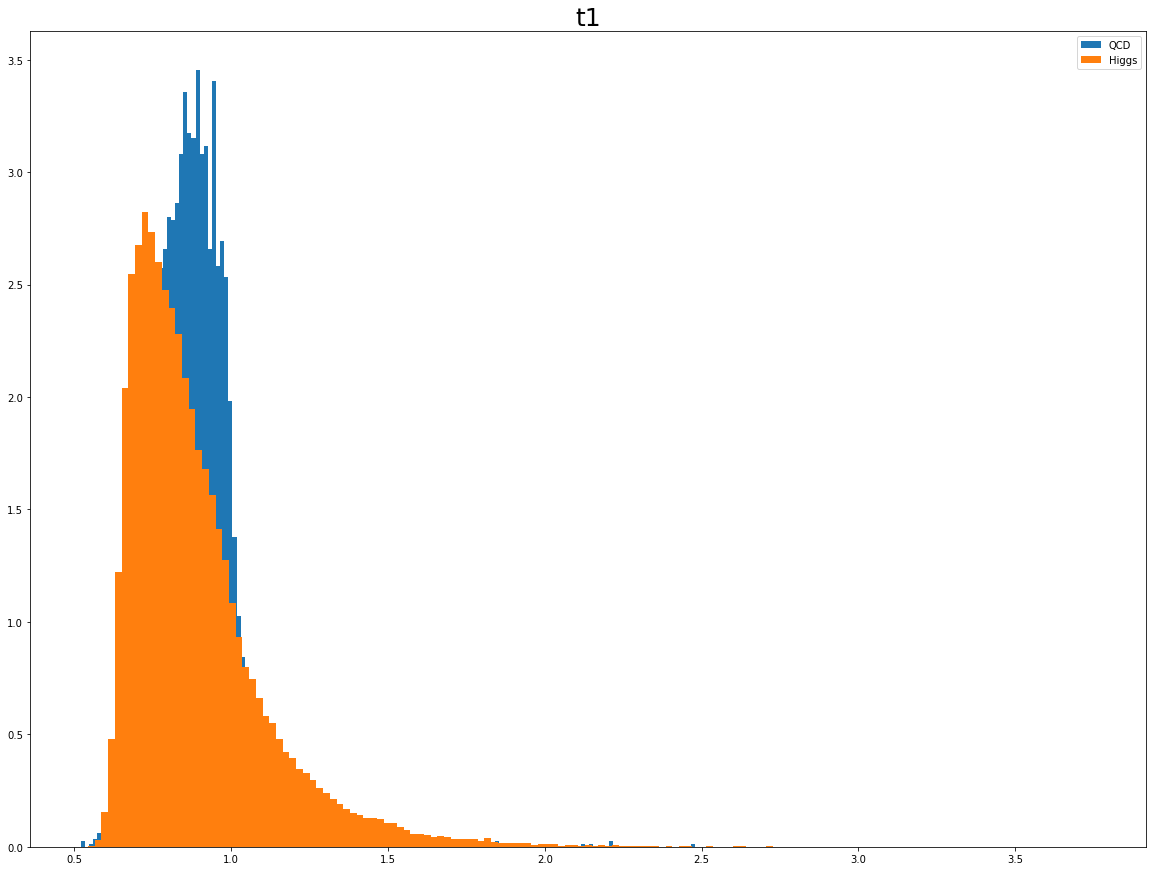

In [141]:
qcd_hist = plt.hist(qcd_cut['t1'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['t1'],density=True, bins=150, label='Higgs')
plt.title('t1',size=25)
plt.legend()
plt.show()

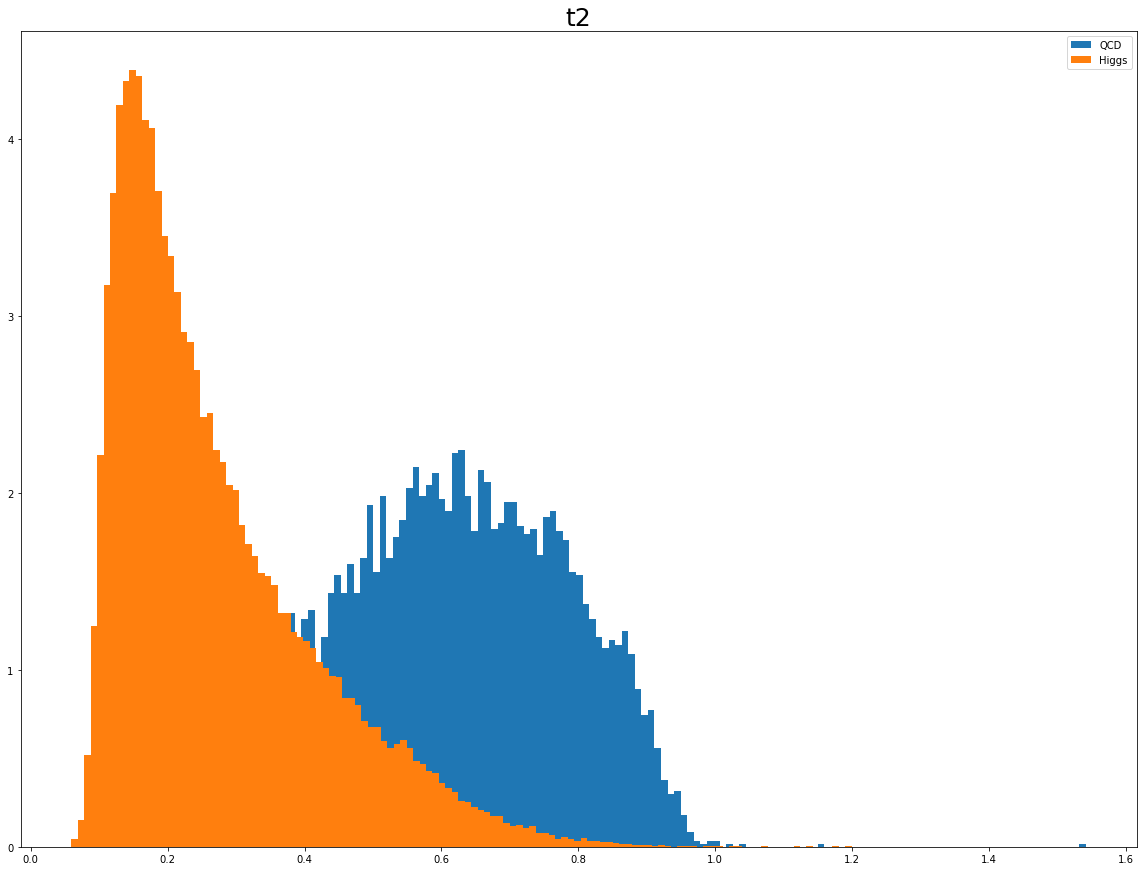

In [142]:
qcd_hist = plt.hist(qcd_cut['t2'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['t2'],density=True, bins=150, label='Higgs')
plt.title('t2',size=25)
plt.legend()
plt.show()

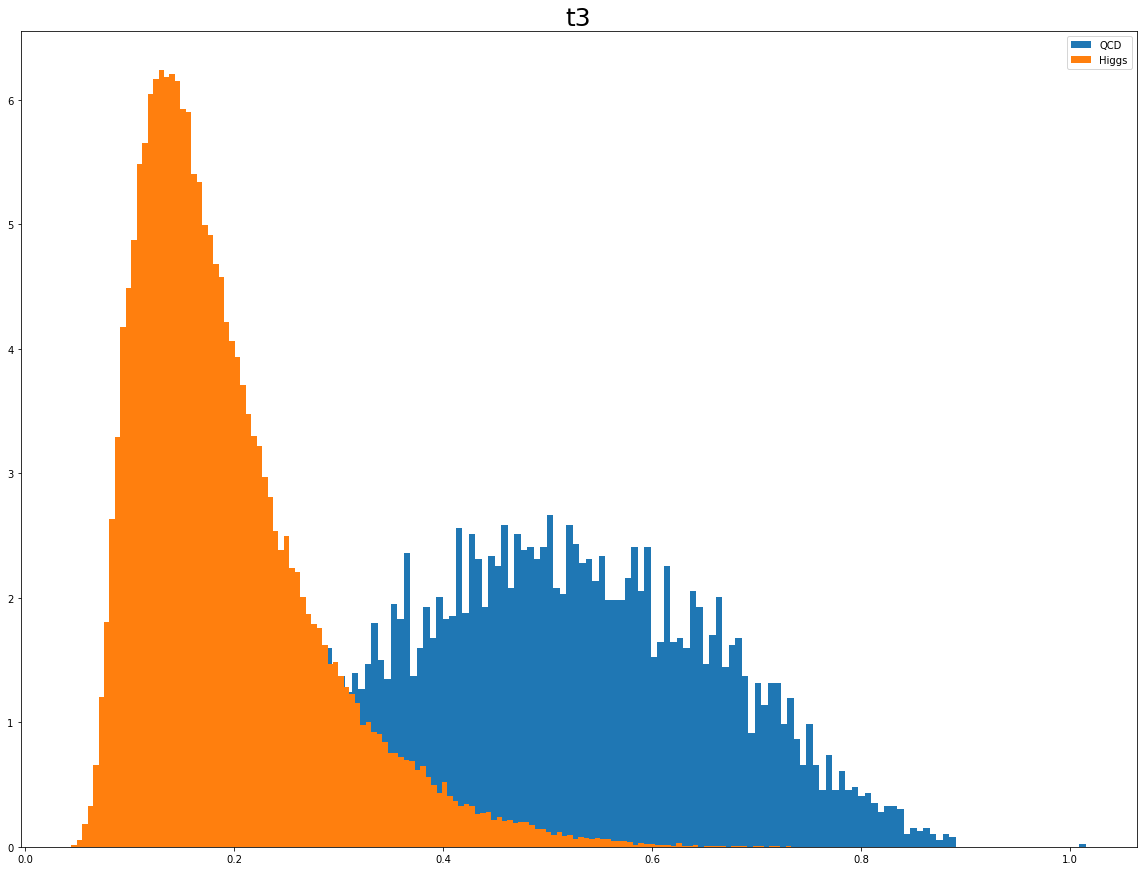

In [143]:
qcd_hist = plt.hist(qcd_cut['t3'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['t3'],density=True, bins=150, label='Higgs')
plt.title('t3',size=25)
plt.legend()
plt.show()

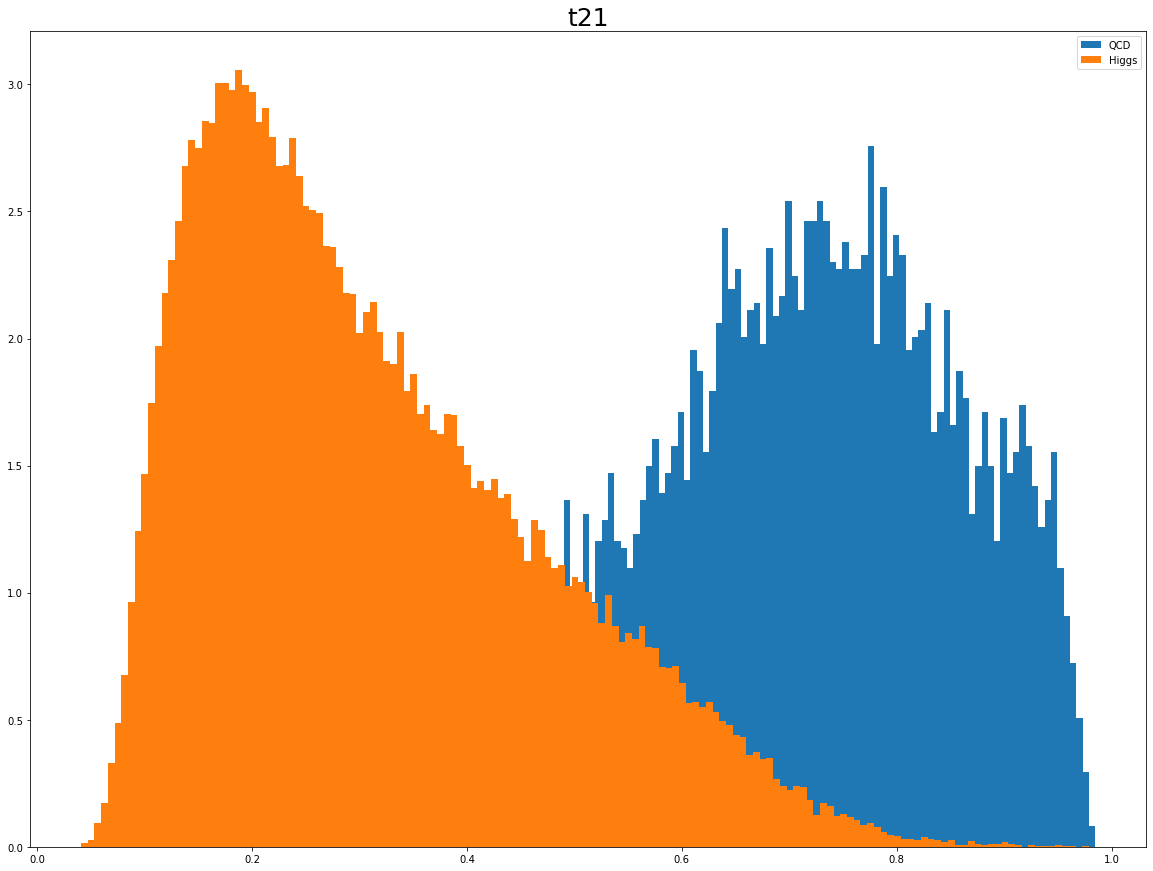

In [144]:
qcd_hist = plt.hist(qcd_cut['t21'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['t21'],density=True, bins=150, label='Higgs')
plt.title('t21',size=25)
plt.legend()
plt.show()

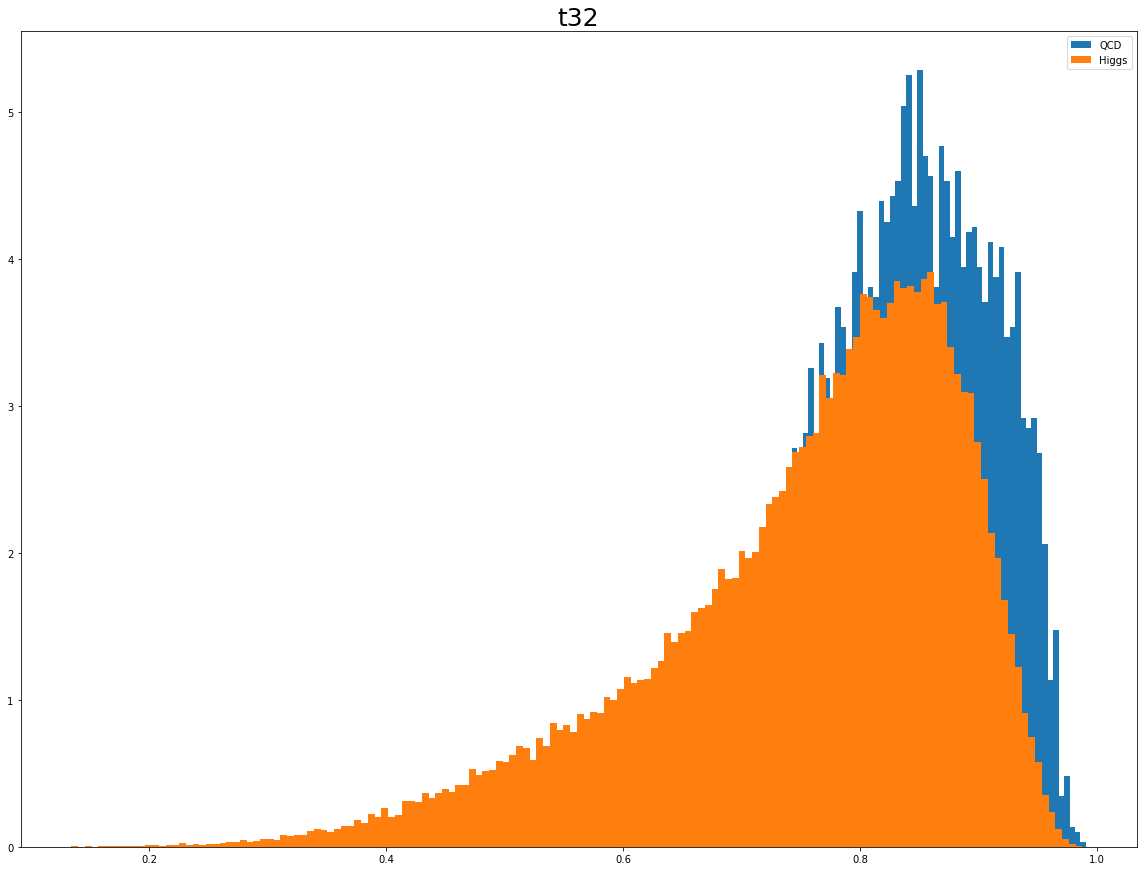

In [145]:
qcd_hist = plt.hist(qcd_cut['t32'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['t32'],density=True, bins=150, label='Higgs')
plt.title('t32',size=25)
plt.legend()
plt.show()

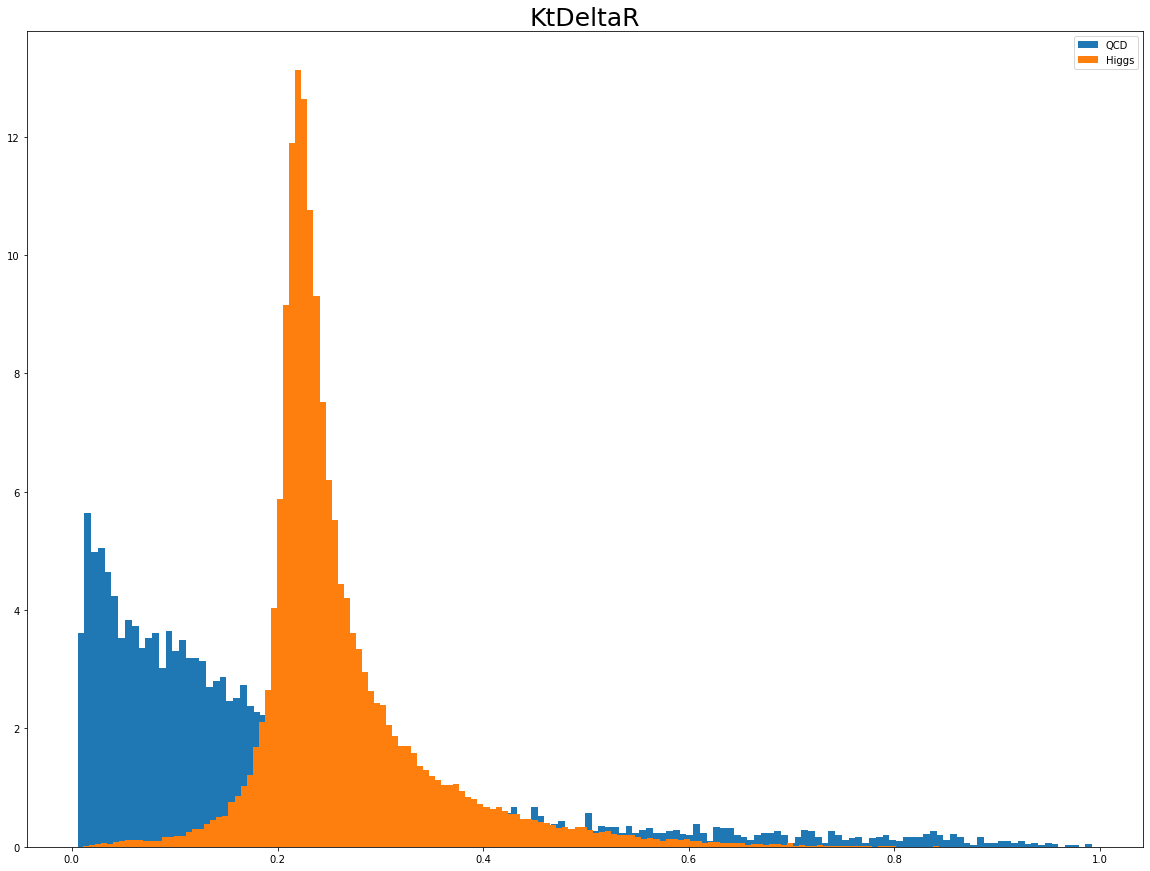

In [146]:
qcd_hist = plt.hist(qcd_cut['KtDeltaR'],density=True, bins=150, label='QCD')
higgs_hist = plt.hist(higgs_cut['KtDeltaR'],density=True, bins=150, label='Higgs')
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

Looking as these plots above, I think another feature that have good discriminative are ee2, t2, t3, t21 and ktDeltaR. But I think the best one to analyze is ktDeltaR.

### 4.Optimize event selections using multiple features (if necessary)

In [153]:
#Cut 1 ;
size= len(higgs['KtDeltaR'])
higgs_cut = (higgs['KtDeltaR']>0.15) & (higgs['KtDeltaR'] <0.30)
qcd_cut = (qcd['KtDeltaR']>0.15) & (qcd['KtDeltaR'] <0.30)
new_N_higgs = 50*len(higgs['KtDeltaR'][higgs_cut])/size
new_N_qcd = 2000*len(qcd['KtDeltaR'][qcd_cut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

36.5755 403.56
Expected significance is 1.8206908729536637


In [154]:
#Cut 2
size= len(higgs['KtDeltaR'])
higgs_cut = (higgs['KtDeltaR']>0.2) & (higgs['KtDeltaR'] <0.27)
qcd_cut = (qcd['KtDeltaR']>0.2) & (qcd['KtDeltaR'] <0.27)
new_N_higgs = 50*len(higgs['KtDeltaR'][higgs_cut])/size
new_N_qcd = 2000*len(qcd['KtDeltaR'][qcd_cut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

27.801 179.04
Expected significance is 2.0777121677163746


In [165]:
higgs_kmcut = (higgs['KtDeltaR']>0.2) & (higgs['KtDeltaR'] <0.27) & (higgs['mass']>125) & (higgs['mass'] <135)
qcd_kmcut = (qcd['KtDeltaR']>0.2) & (qcd['KtDeltaR'] <0.27) & (qcd['mass']>125) & (qcd['mass'] <135)
new_N_higgs = 50*len(higgs['mass'][higgs_kmcut])/size
new_N_qcd = 2000*len(qcd['mass'][qcd_kmcut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
print(new_N_higgs, new_N_qcd)
print('Expected significance is',sig)

24.6095 13.36
Expected significance is 6.7328596428864005


Before event selection, we have the expected significance of 1.1 sigma. After event selection, we increase the expected significance upto 6.7 sigma. We are trying to minimize the background and maximize the signal to noise ratio. which means after the cut, the signal will be counted more.  

# Lab 8

Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using one of the pseduo-experiment dataset. For each task below, you will choose one of the observed data from your specific pT sample to perform the analysis.

### 1. High luminosity data

- Focus on each feature of your event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
- Evaluate observed significance and compare your results to expectation

In [167]:
high = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

#### Without event selection

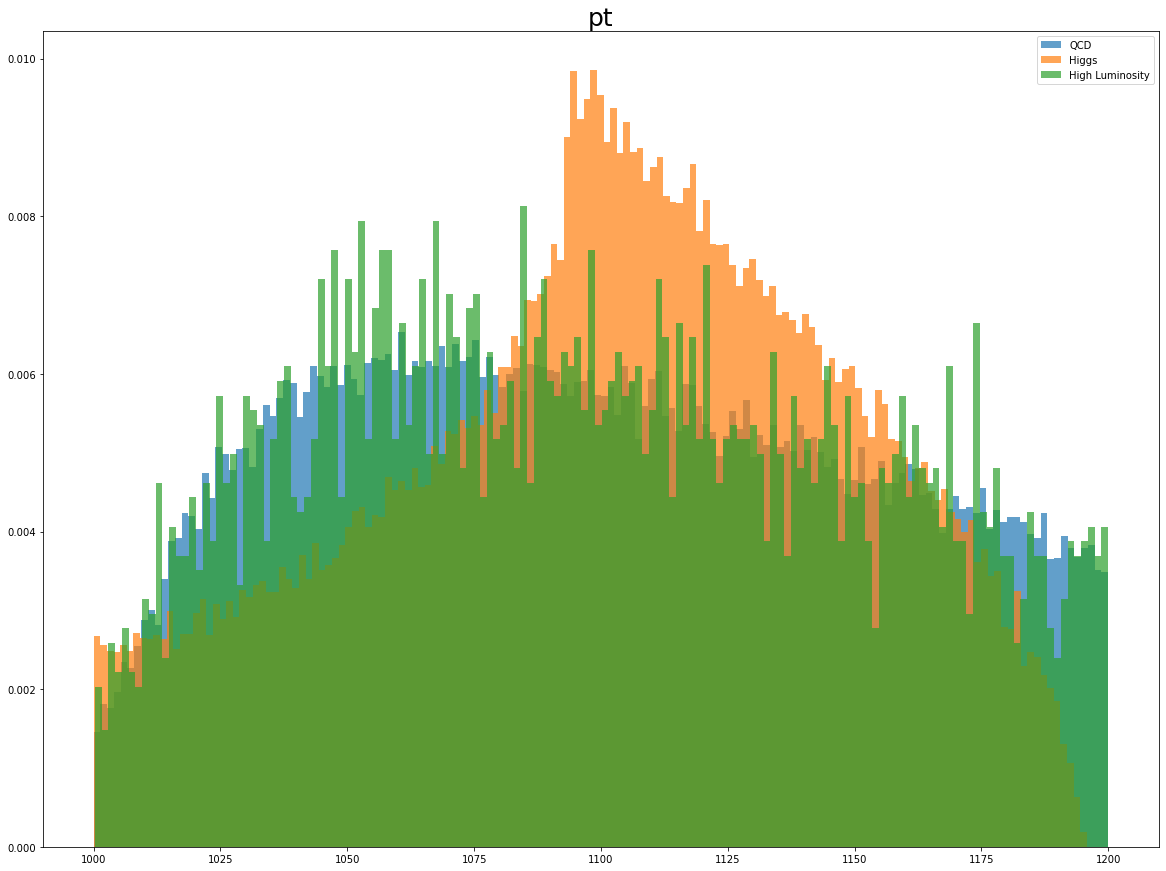

In [171]:
qcd_hist = plt.hist(qcd['pt'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['pt'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['pt'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('pt',size=25)
plt.legend()
plt.show()

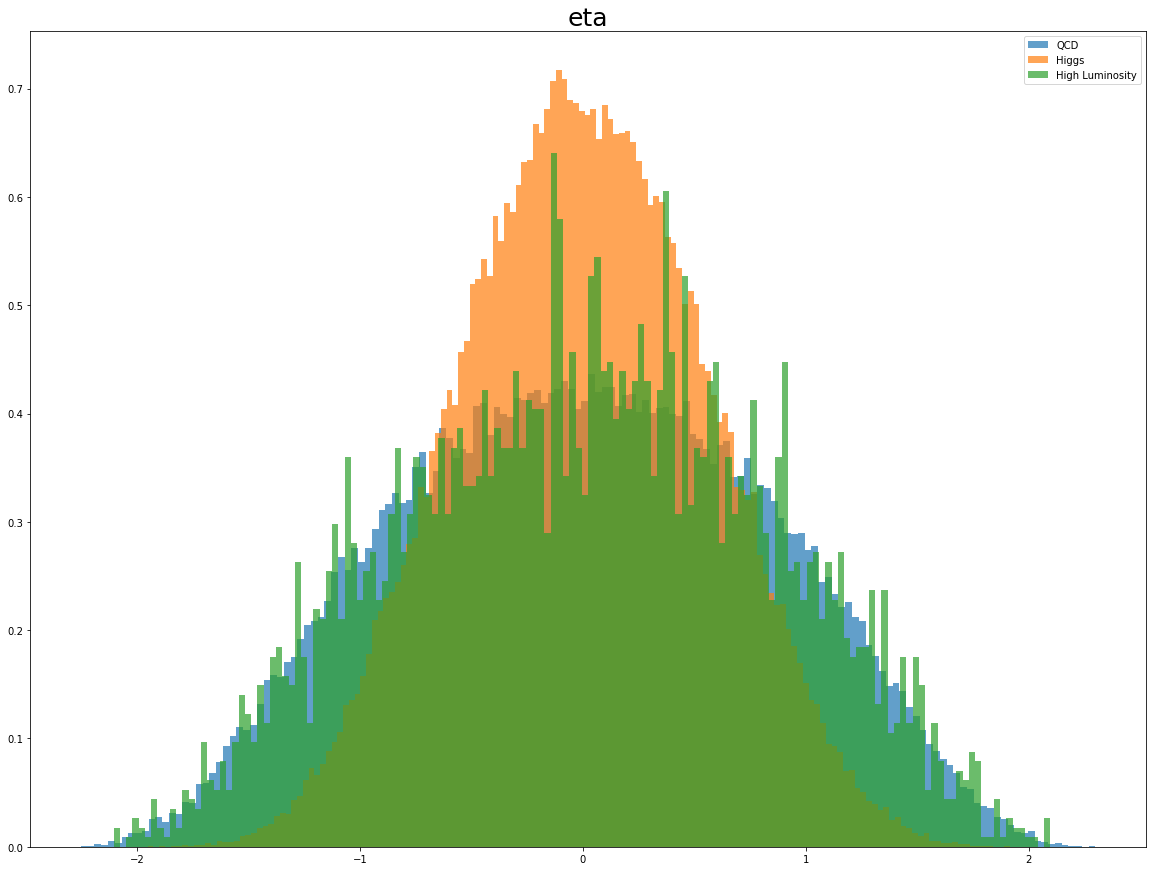

In [172]:
qcd_hist = plt.hist(qcd['eta'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['eta'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['eta'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('eta',size=25)
plt.legend()
plt.show()

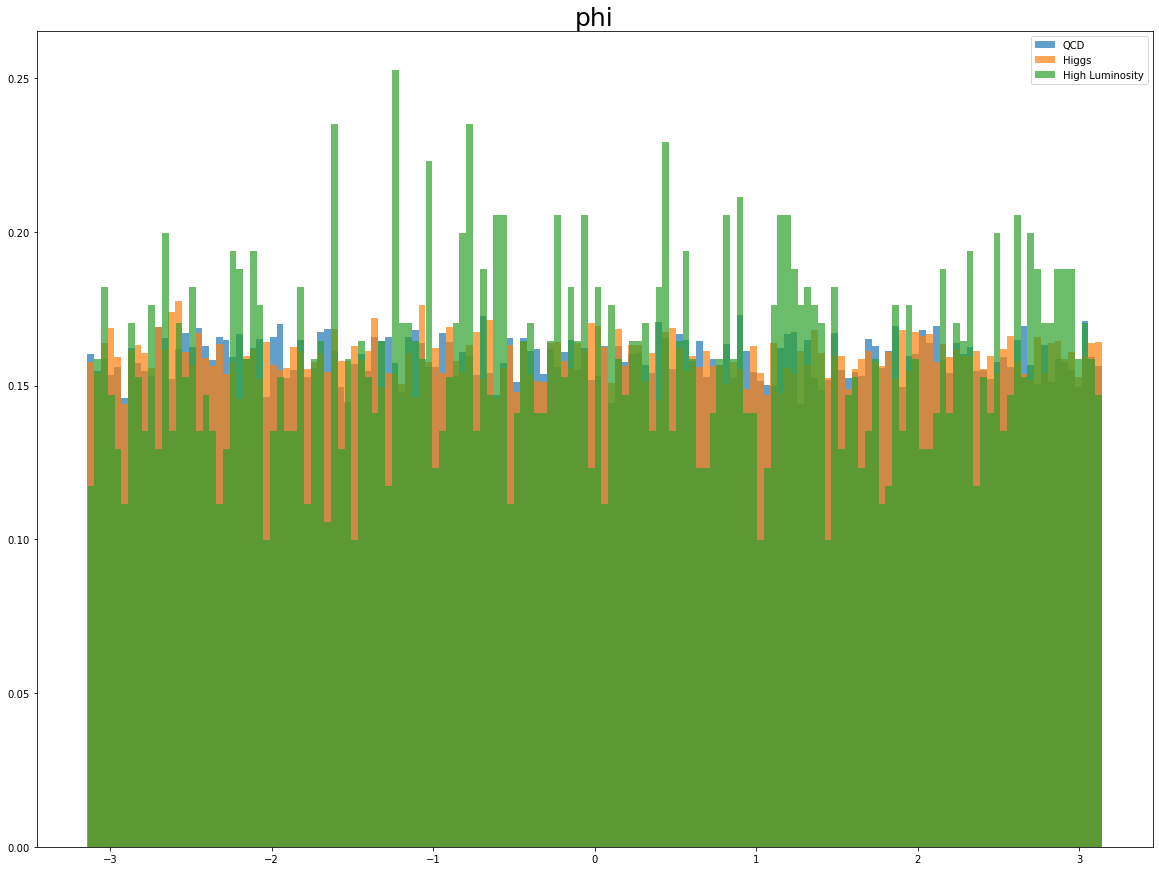

In [173]:
qcd_hist = plt.hist(qcd['phi'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['phi'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['phi'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('phi',size=25)
plt.legend()
plt.show()

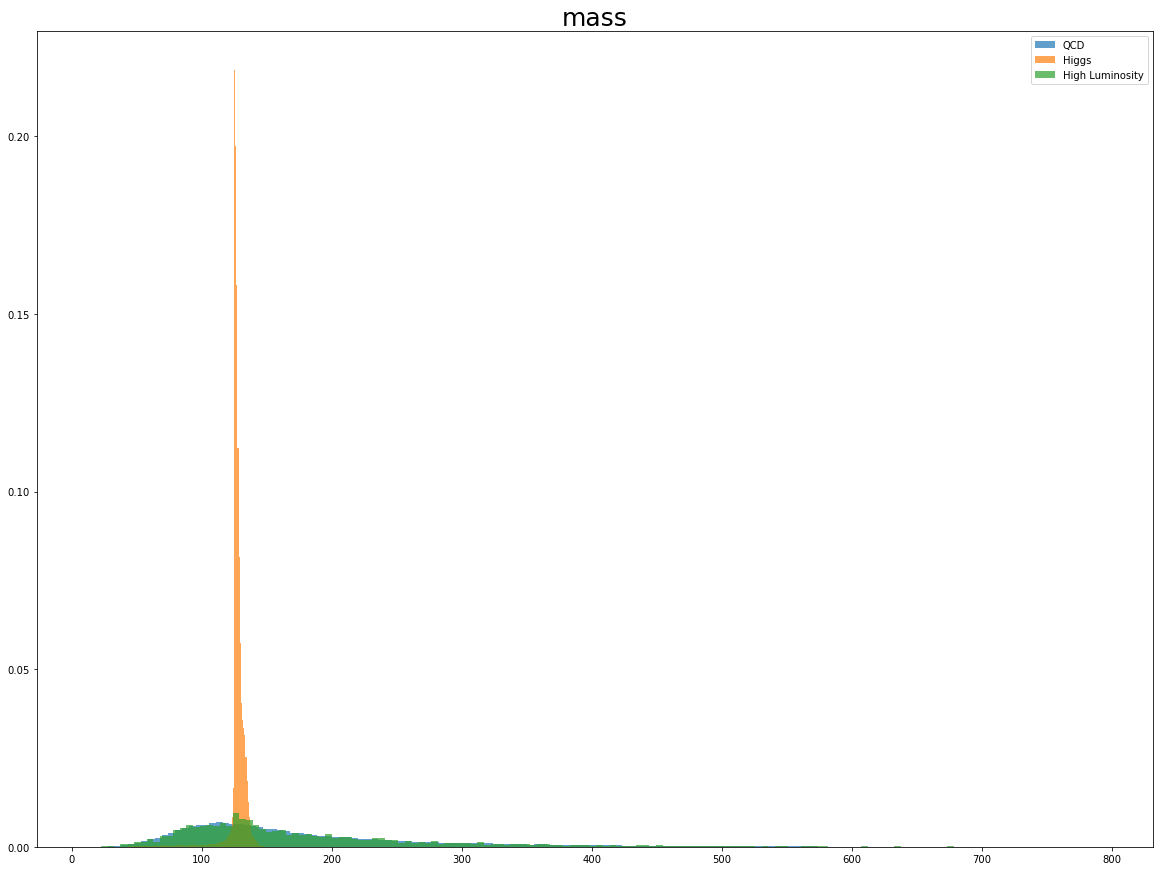

In [174]:
qcd_hist = plt.hist(qcd['mass'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['mass'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['mass'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('mass',size=25)
plt.legend()
plt.show()

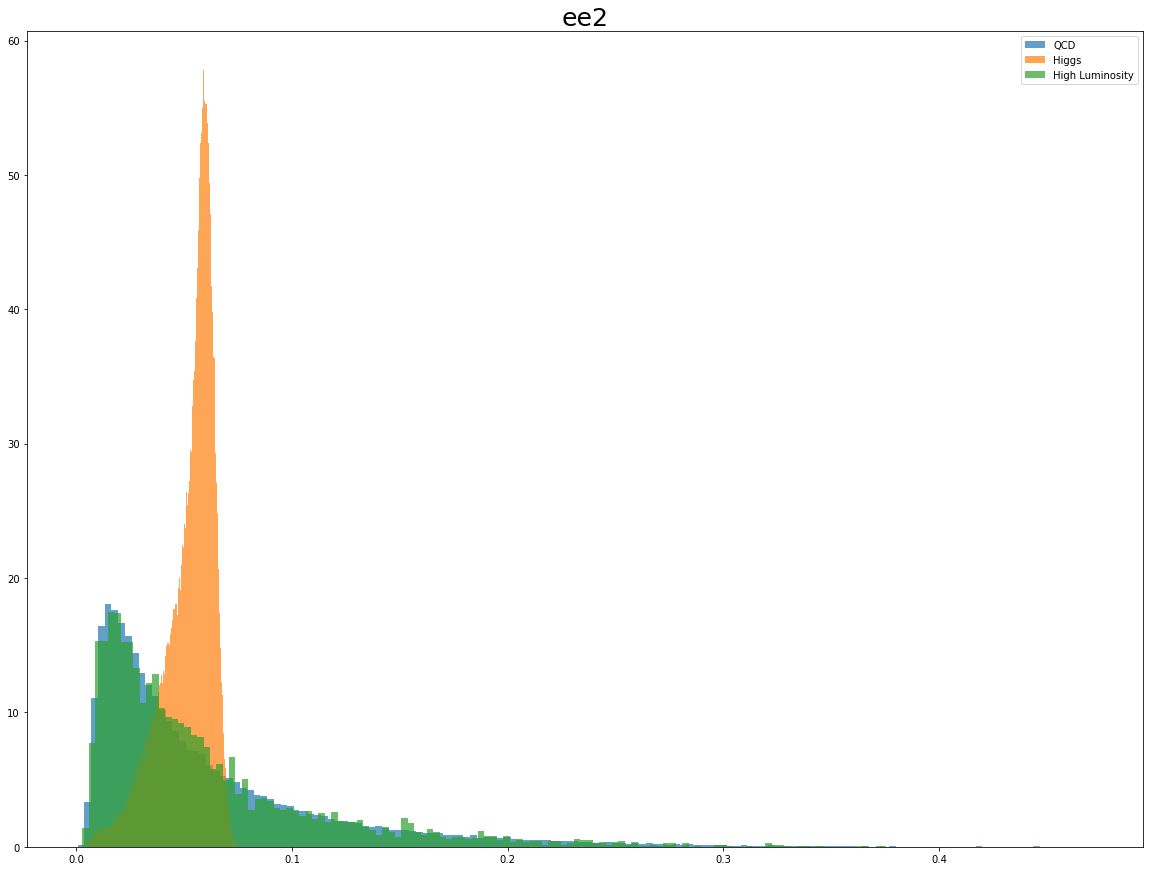

In [175]:
qcd_hist = plt.hist(qcd['ee2'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['ee2'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['ee2'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('ee2',size=25)
plt.legend()
plt.show()

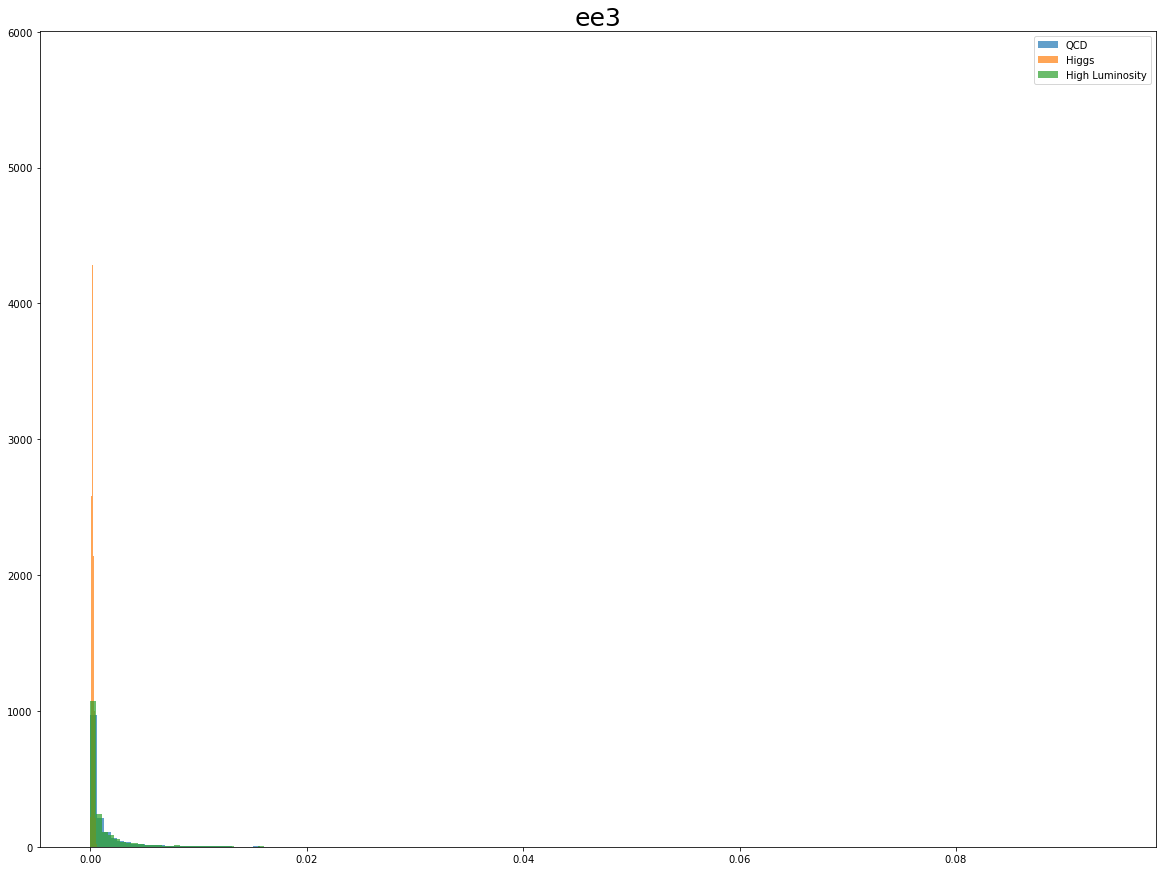

In [176]:
qcd_hist = plt.hist(qcd['ee3'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['ee3'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['ee3'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('ee3',size=25)
plt.legend()
plt.show()

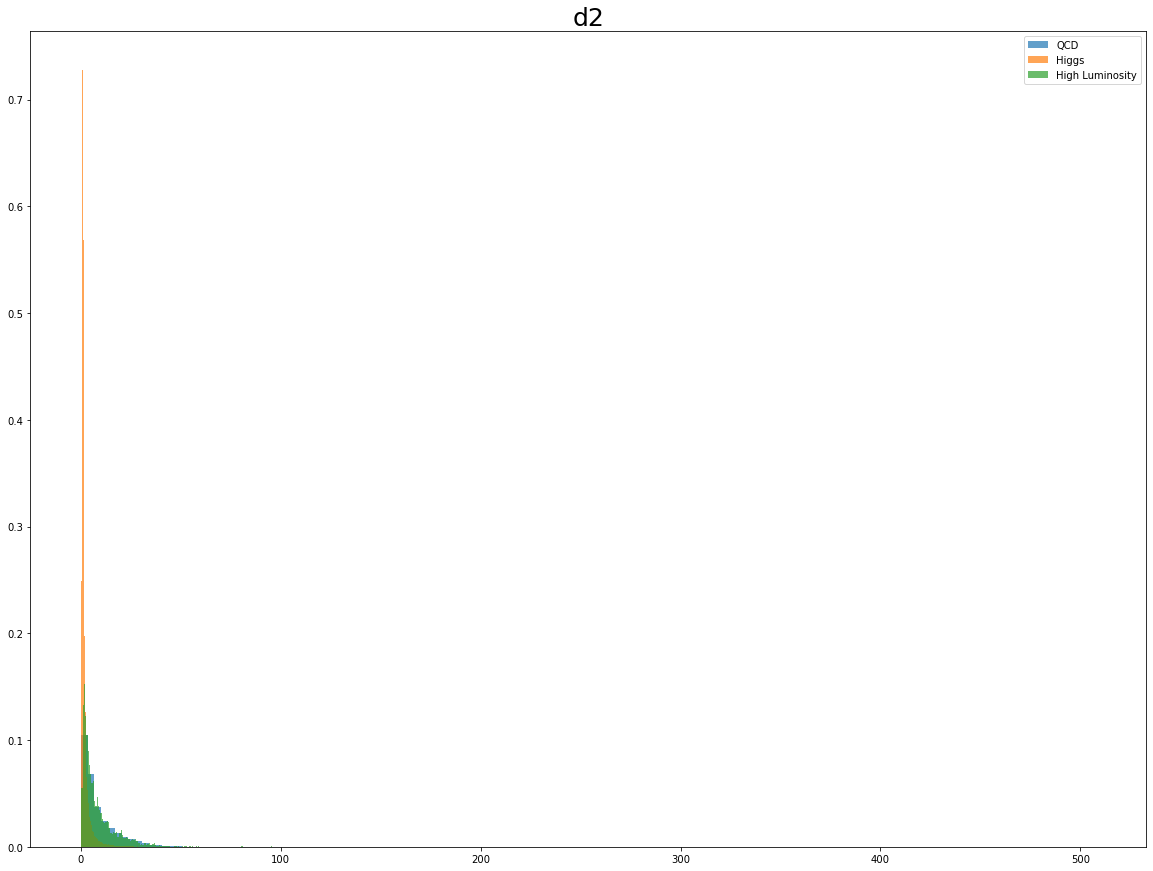

In [177]:
qcd_hist = plt.hist(qcd['d2'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['d2'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['d2'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('d2',size=25)
plt.legend()
plt.show()

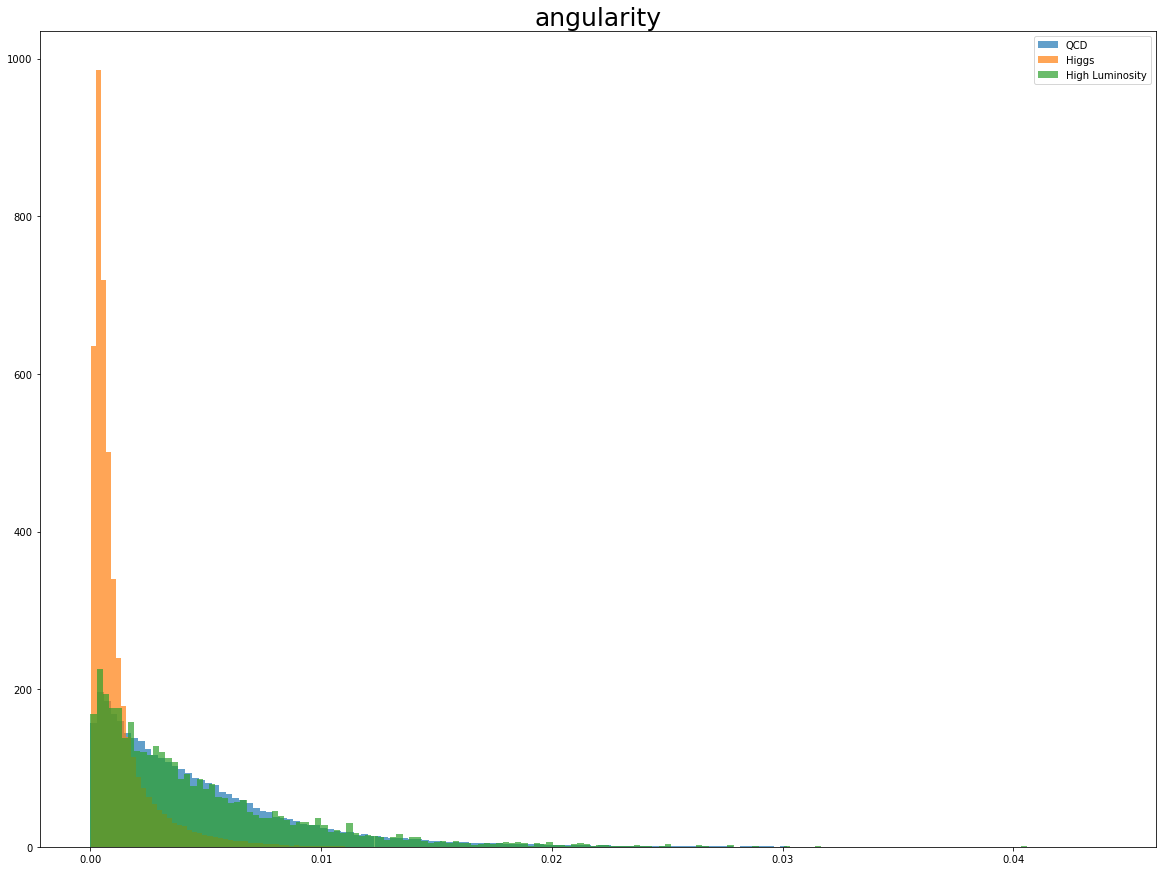

In [178]:
qcd_hist = plt.hist(qcd['angularity'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['angularity'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['angularity'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('angularity',size=25)
plt.legend()
plt.show()

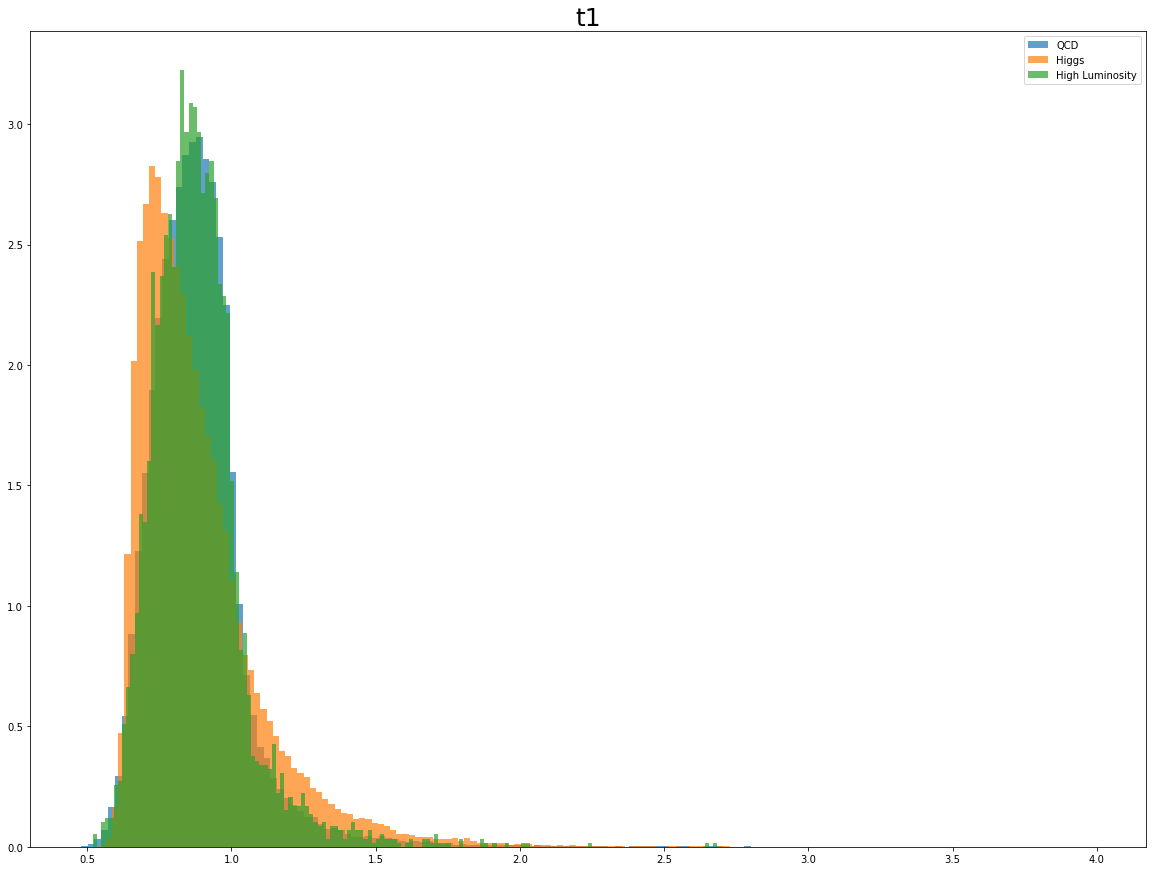

In [179]:
qcd_hist = plt.hist(qcd['t1'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['t1'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['t1'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('t1',size=25)
plt.legend()
plt.show()

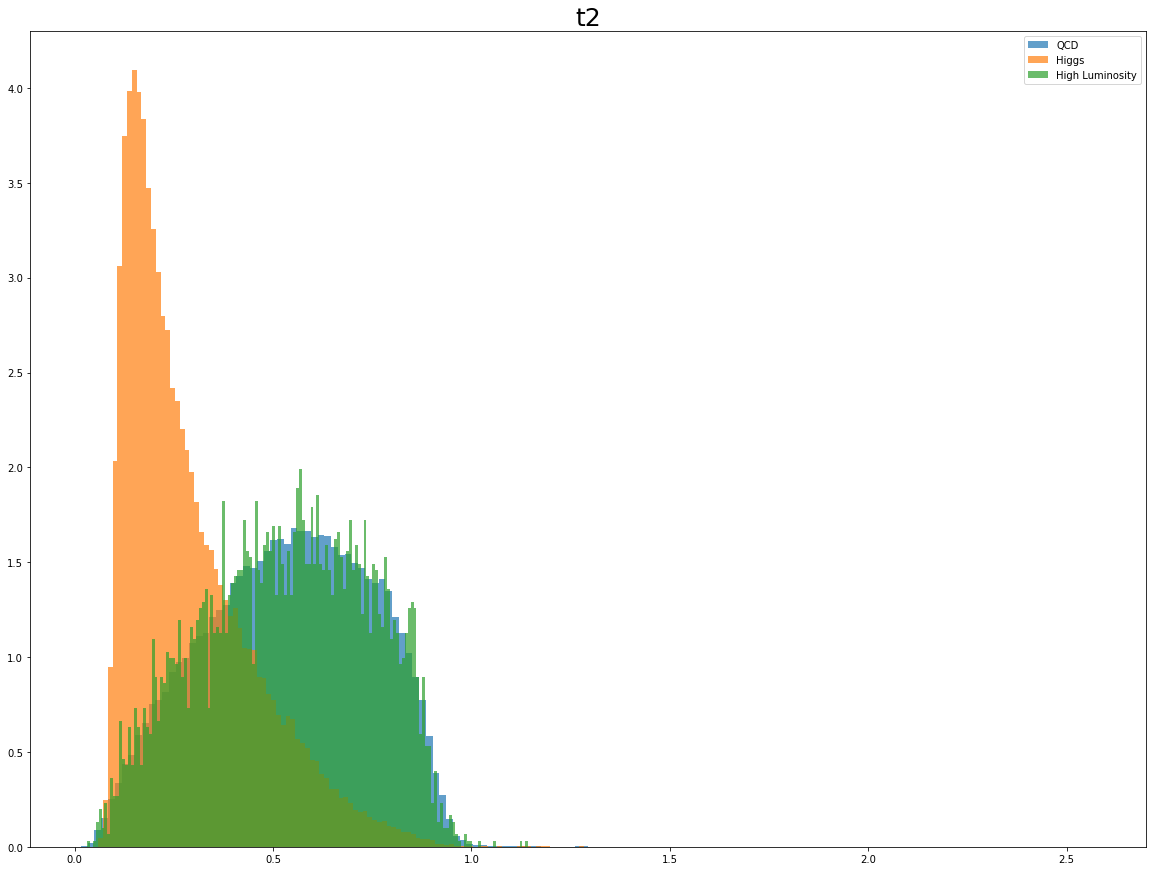

In [180]:
qcd_hist = plt.hist(qcd['t2'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['t2'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['t2'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('t2',size=25)
plt.legend()
plt.show()

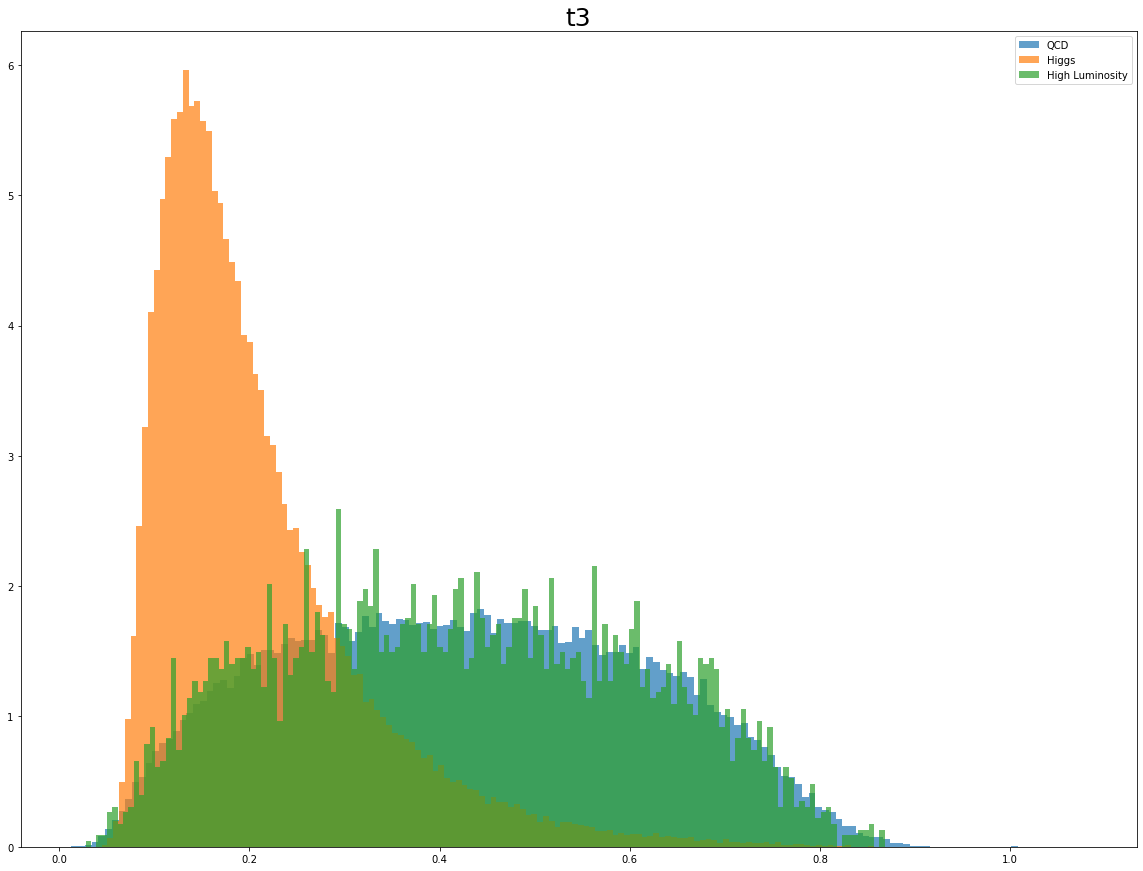

In [181]:
qcd_hist = plt.hist(qcd['t3'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['t3'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['t3'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('t3',size=25)
plt.legend()
plt.show()

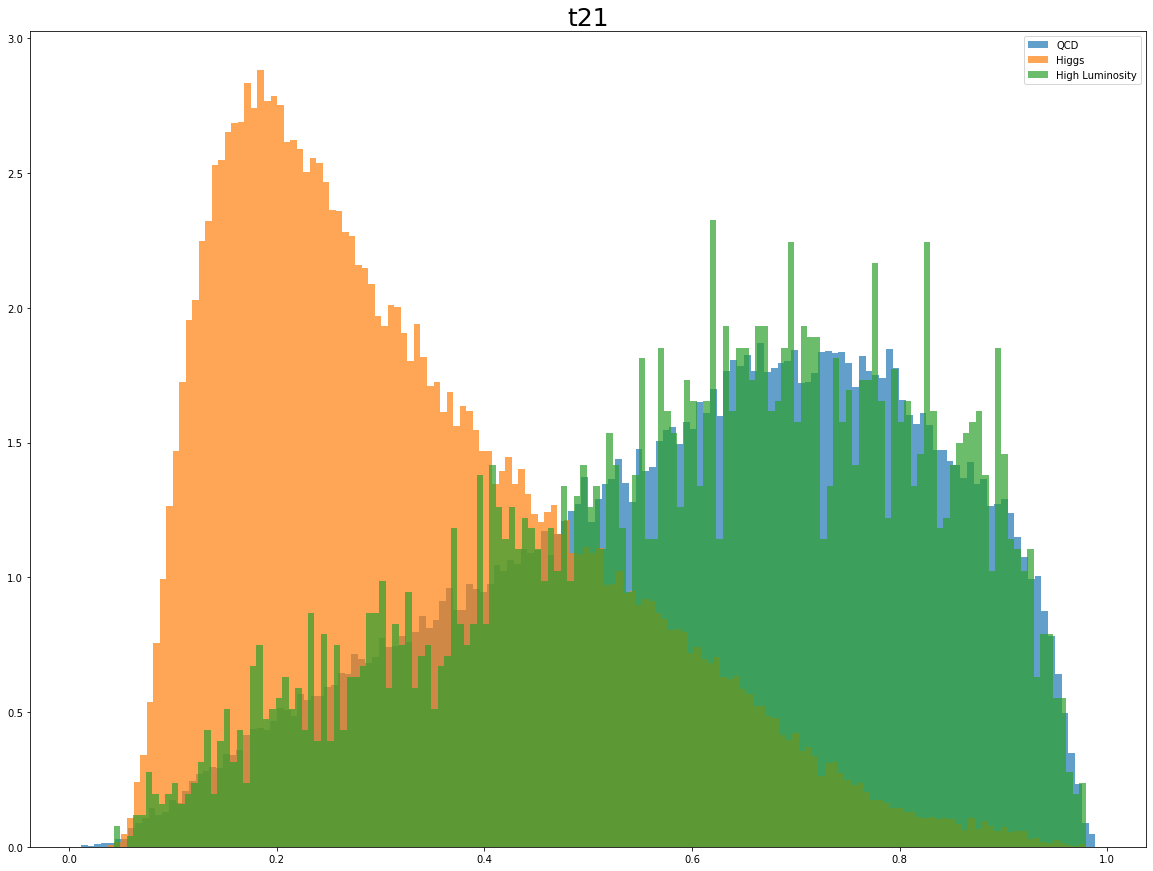

In [182]:
qcd_hist = plt.hist(qcd['t21'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['t21'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['t21'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('t21',size=25)
plt.legend()
plt.show()

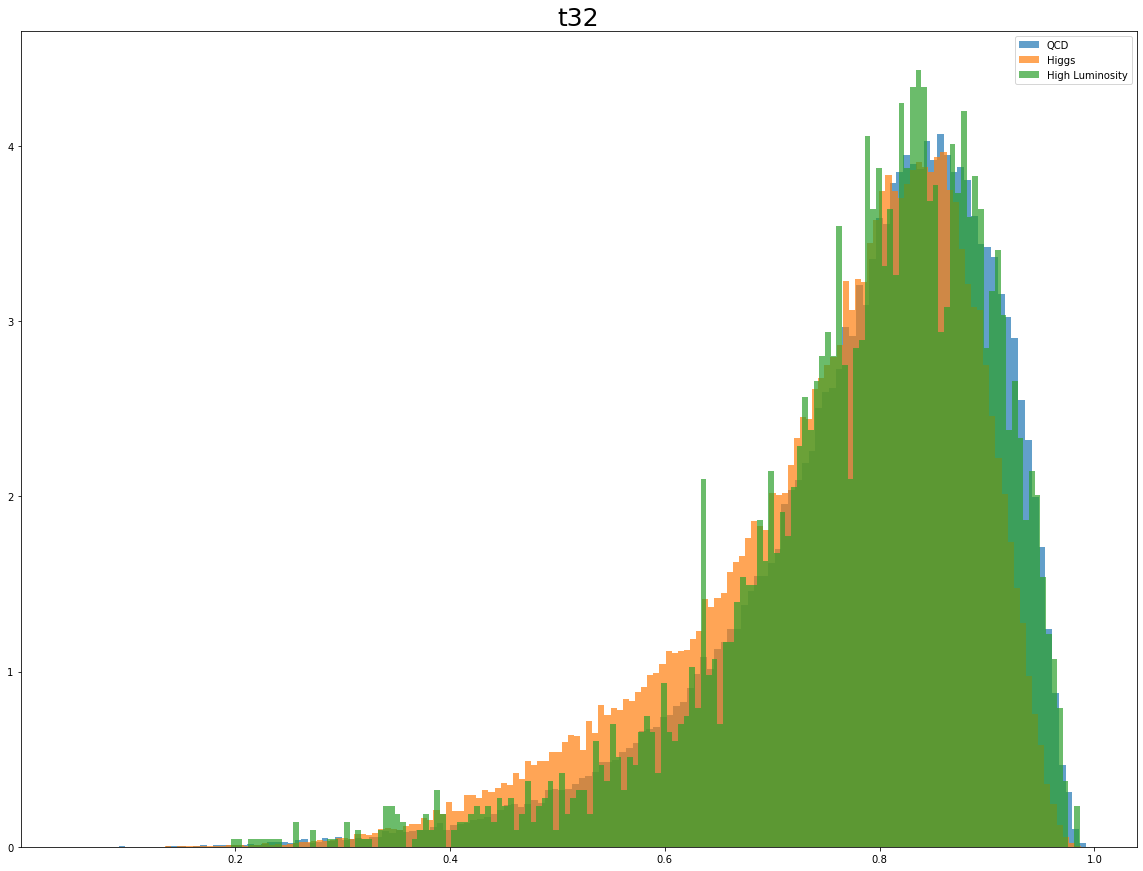

In [183]:
qcd_hist = plt.hist(qcd['t32'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['t32'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['t32'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('t32',size=25)
plt.legend()
plt.show()

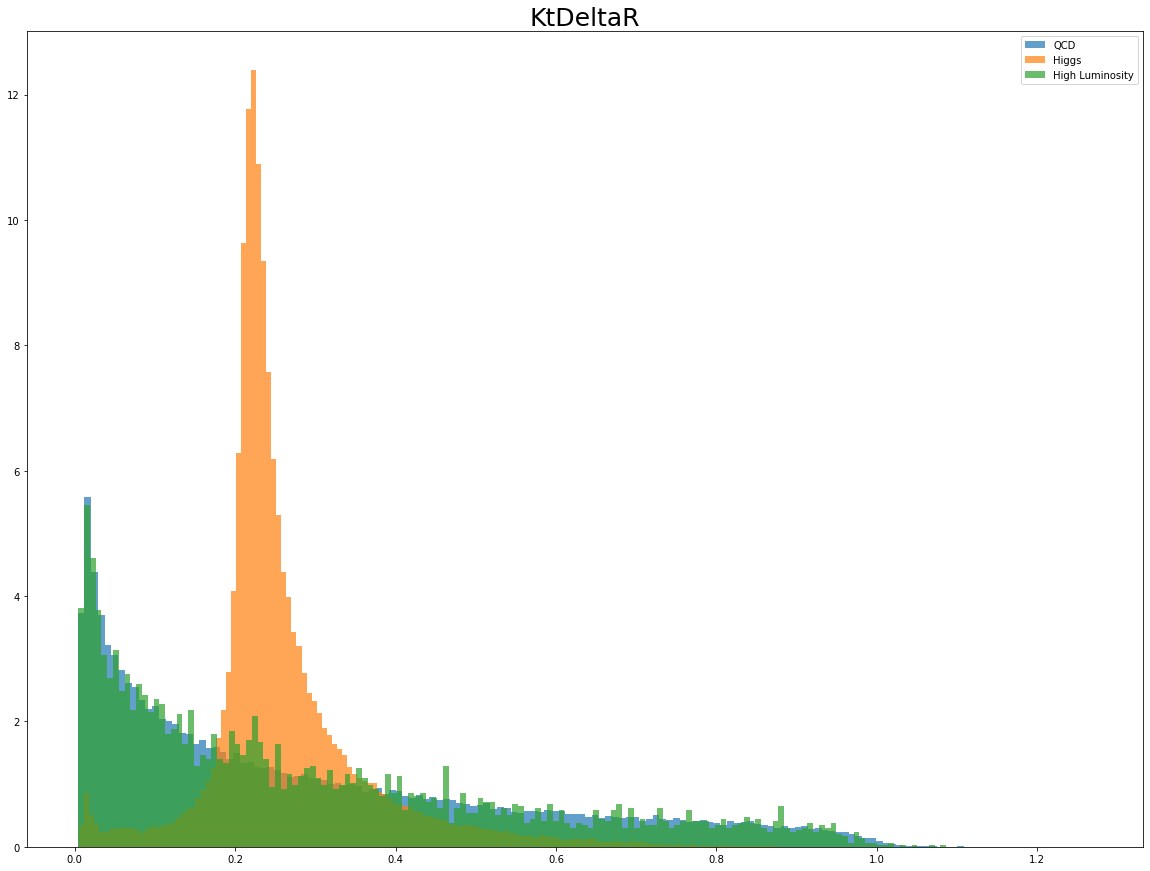

In [184]:
qcd_hist = plt.hist(qcd['KtDeltaR'],density=True, bins=150, label='QCD',alpha=0.7)
higgs_hist = plt.hist(higgs['KtDeltaR'],density=True, bins=150, label='Higgs', alpha=0.7)
high_hist= plt.hist(high['KtDeltaR'],density=True, bins=150, label='High Luminosity', alpha=0.7)
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

#### With event selection 

In [188]:
higgs_kmcut = (higgs['KtDeltaR']>0.2) & (higgs['KtDeltaR'] <0.27) & (higgs['mass']>125) & (higgs['mass'] <135)
qcd_kmcut = (qcd['KtDeltaR']>0.2) & (qcd['KtDeltaR'] <0.27) & (qcd['mass']>125) & (qcd['mass'] <135)
high_kmcut = (high['KtDeltaR']>0.2) & (high['KtDeltaR'] <0.27) & (high['mass']>125) & (high['mass'] <135)

Observed significance is 13.886381901081537


In [195]:
high_cut = high[high_kmcut==1]
qcd_cut = qcd[qcd_kmcut==1]
higgs_cut = higgs[higgs_kmcut==1]

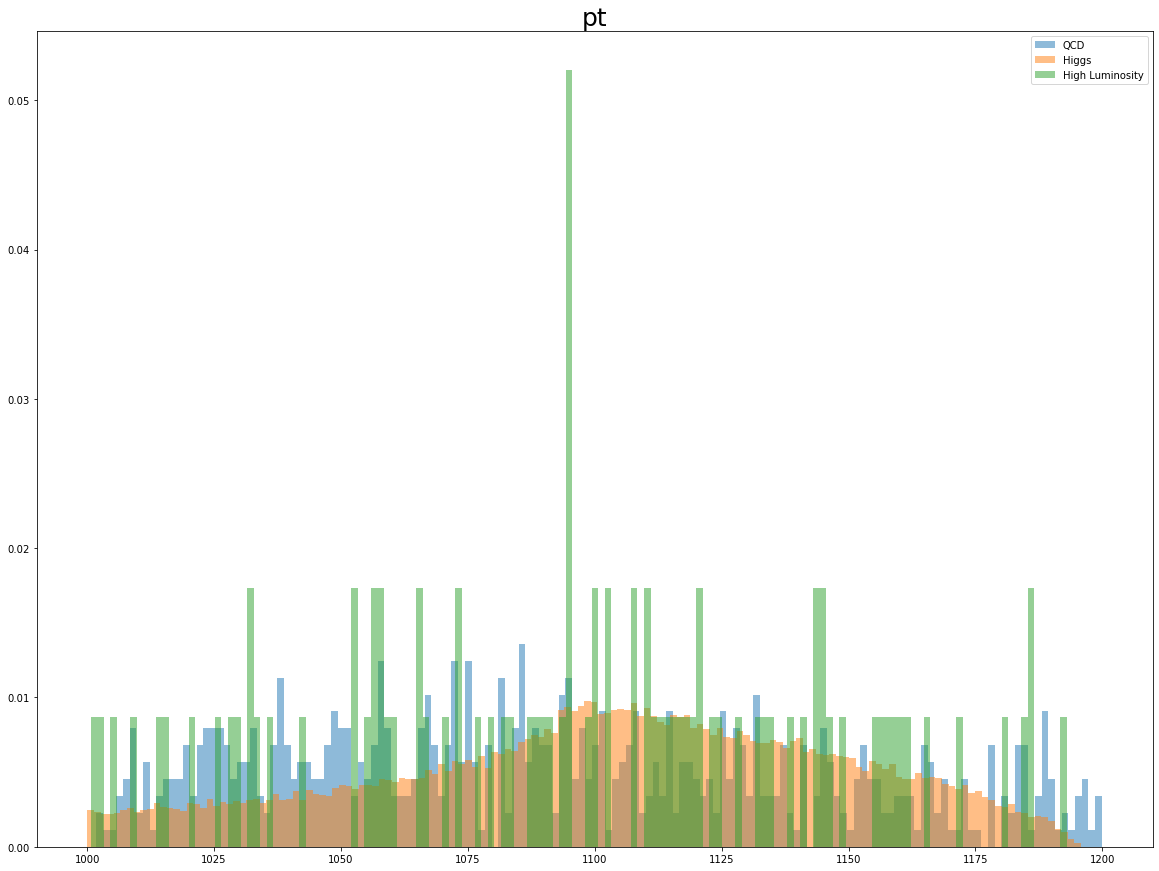

In [197]:
qcd_hist = plt.hist(qcd_cut['pt'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['pt'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['pt'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('pt',size=25)
plt.legend()
plt.show()

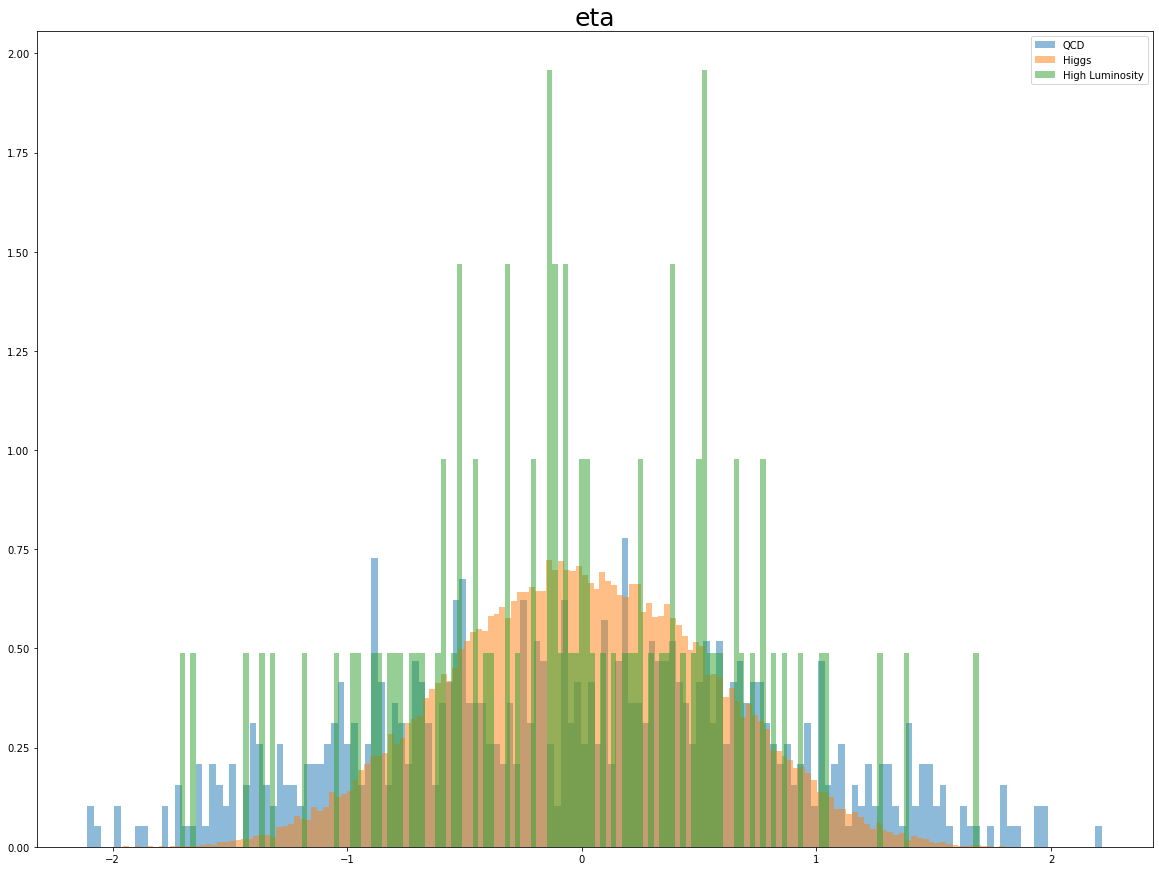

In [198]:
qcd_hist = plt.hist(qcd_cut['eta'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['eta'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['eta'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('eta',size=25)
plt.legend()
plt.show()

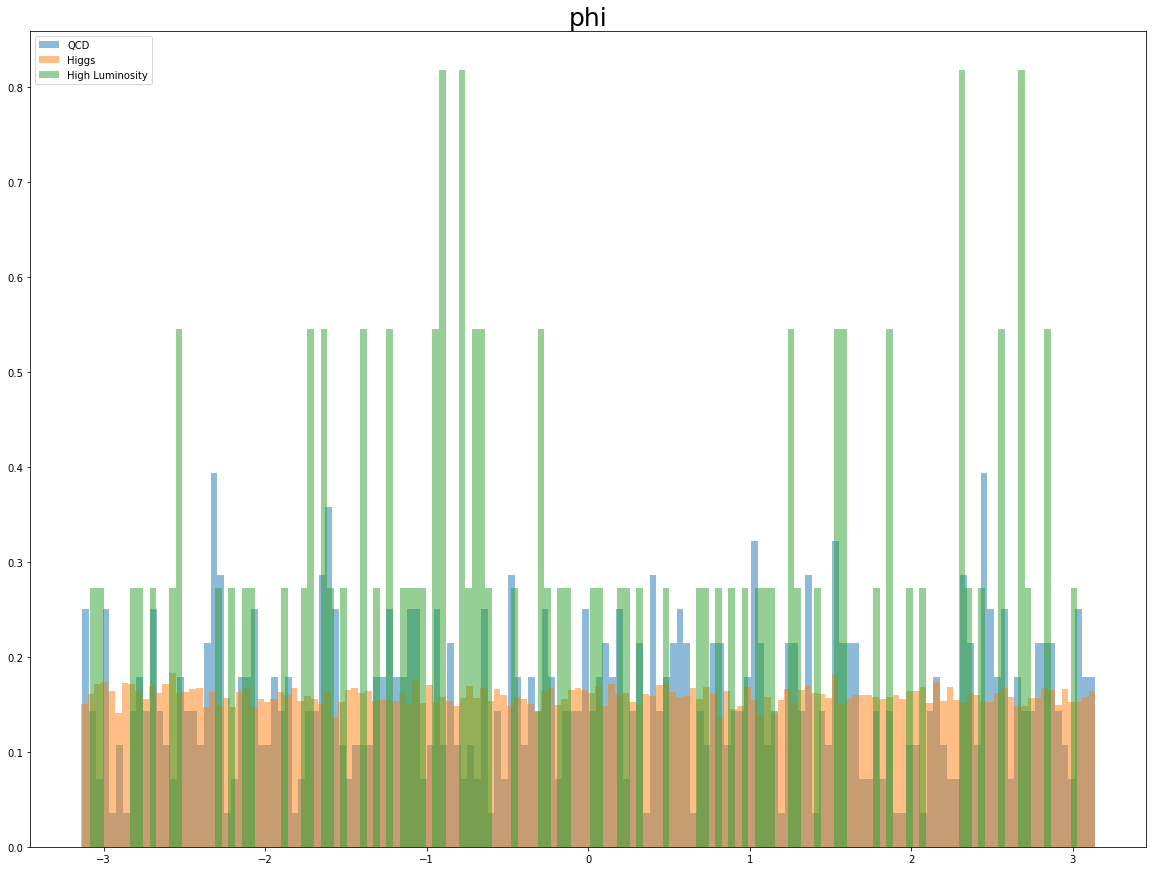

In [199]:
qcd_hist = plt.hist(qcd_cut['phi'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['phi'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['phi'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('phi',size=25)
plt.legend()
plt.show()

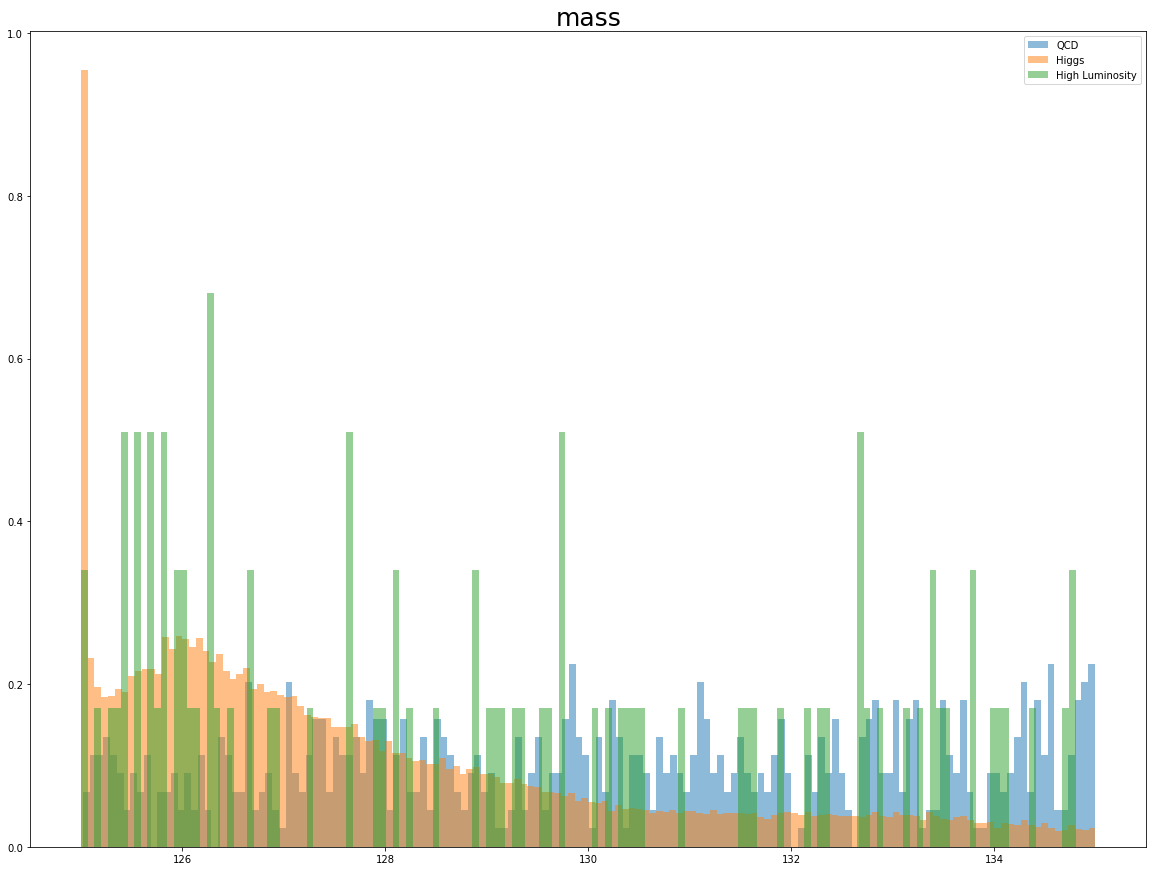

In [200]:
qcd_hist = plt.hist(qcd_cut['mass'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['mass'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['mass'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('mass',size=25)
plt.legend()
plt.show()

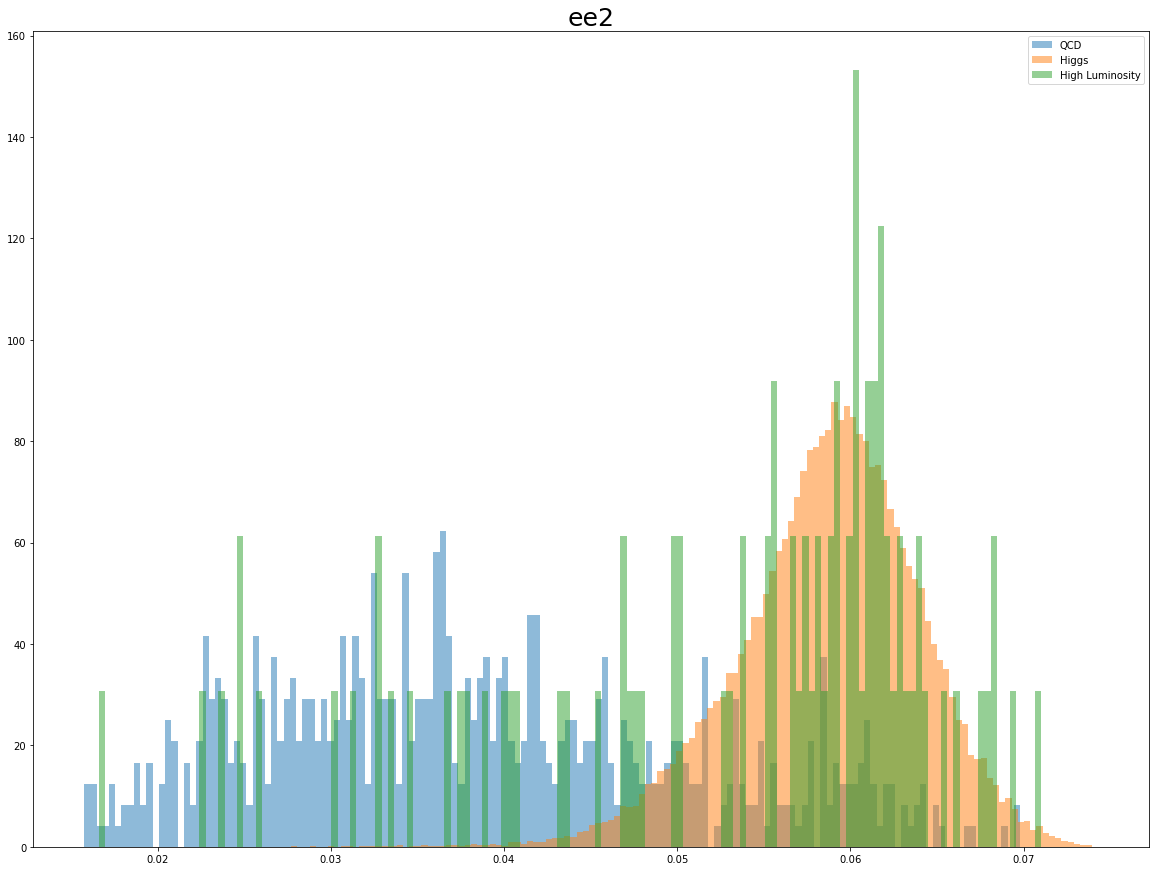

In [201]:
qcd_hist = plt.hist(qcd_cut['ee2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['ee2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['ee2'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('ee2',size=25)
plt.legend()
plt.show()

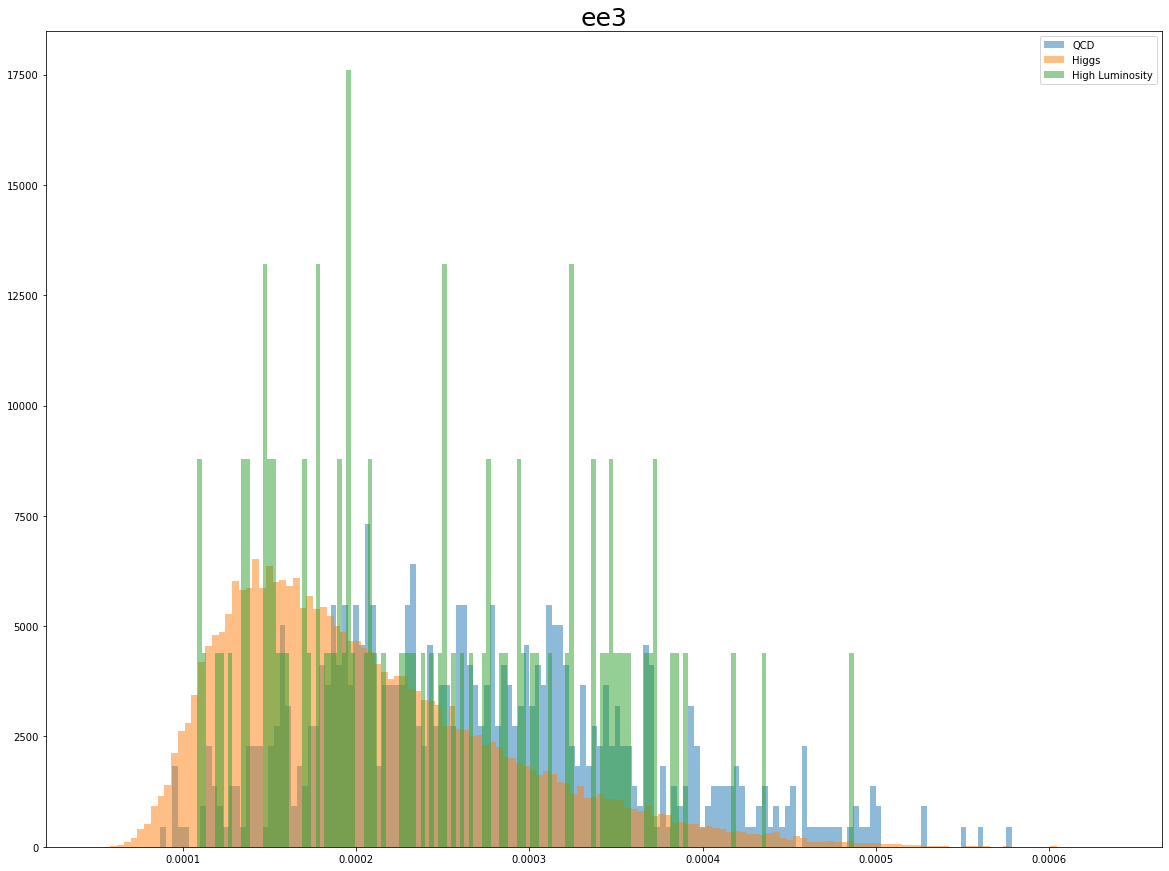

In [202]:
qcd_hist = plt.hist(qcd_cut['ee3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['ee3'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['ee3'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('ee3',size=25)
plt.legend()
plt.show()

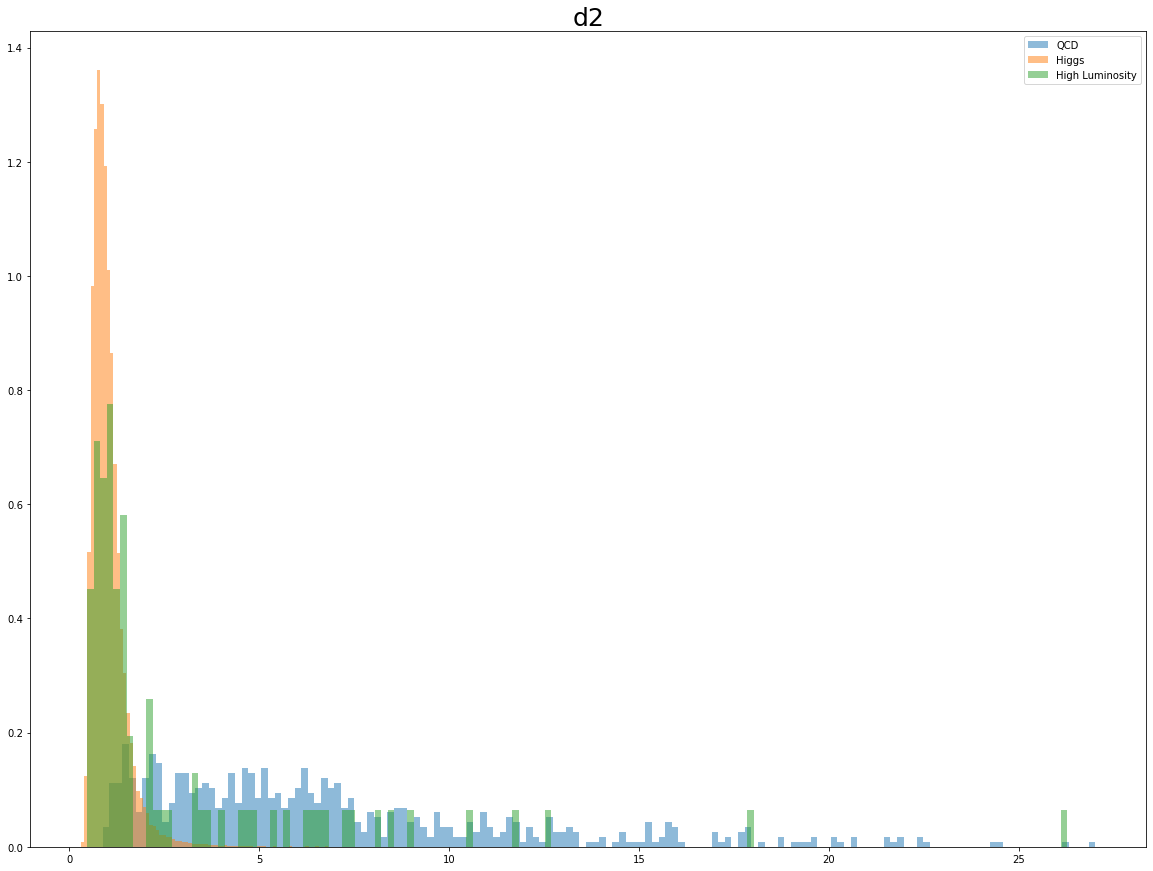

In [203]:
qcd_hist = plt.hist(qcd_cut['d2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['d2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['d2'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('d2',size=25)
plt.legend()
plt.show()

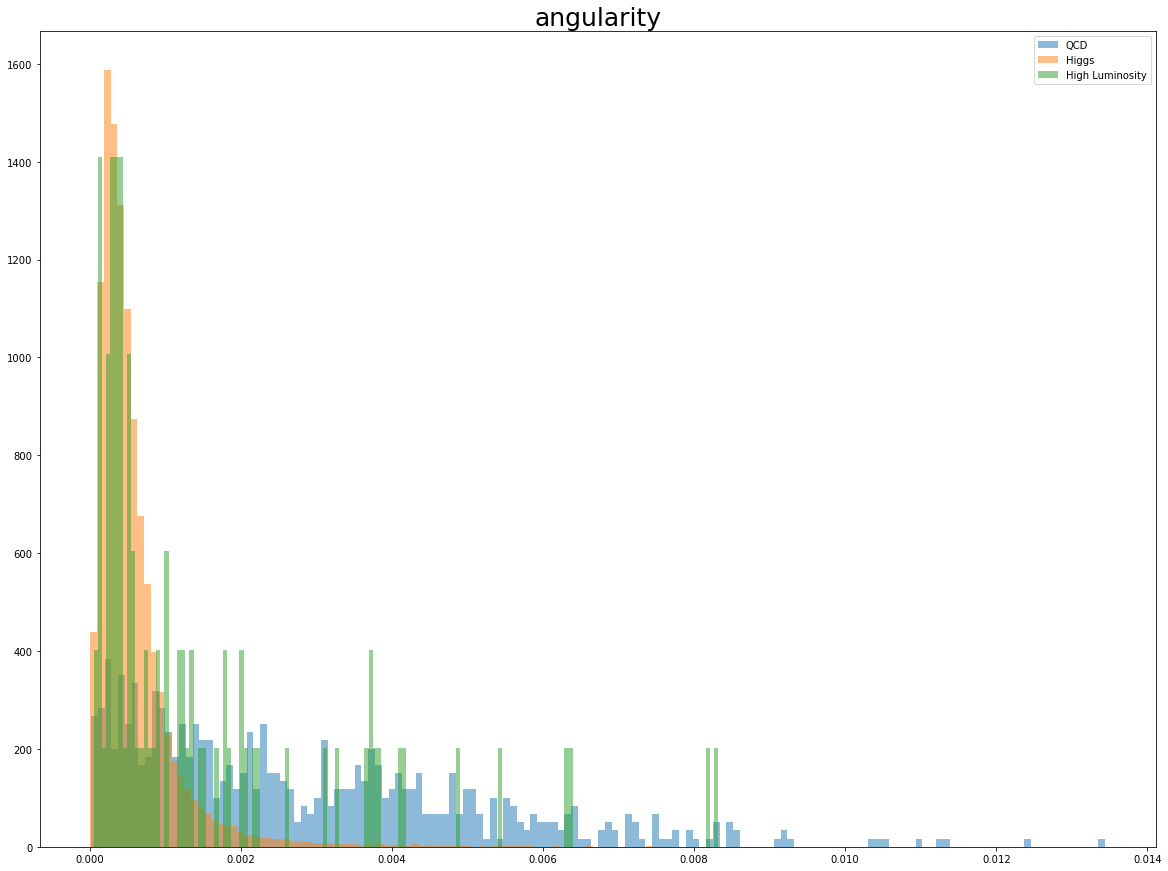

In [204]:
qcd_hist = plt.hist(qcd_cut['angularity'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['angularity'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['angularity'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('angularity',size=25)
plt.legend()
plt.show()

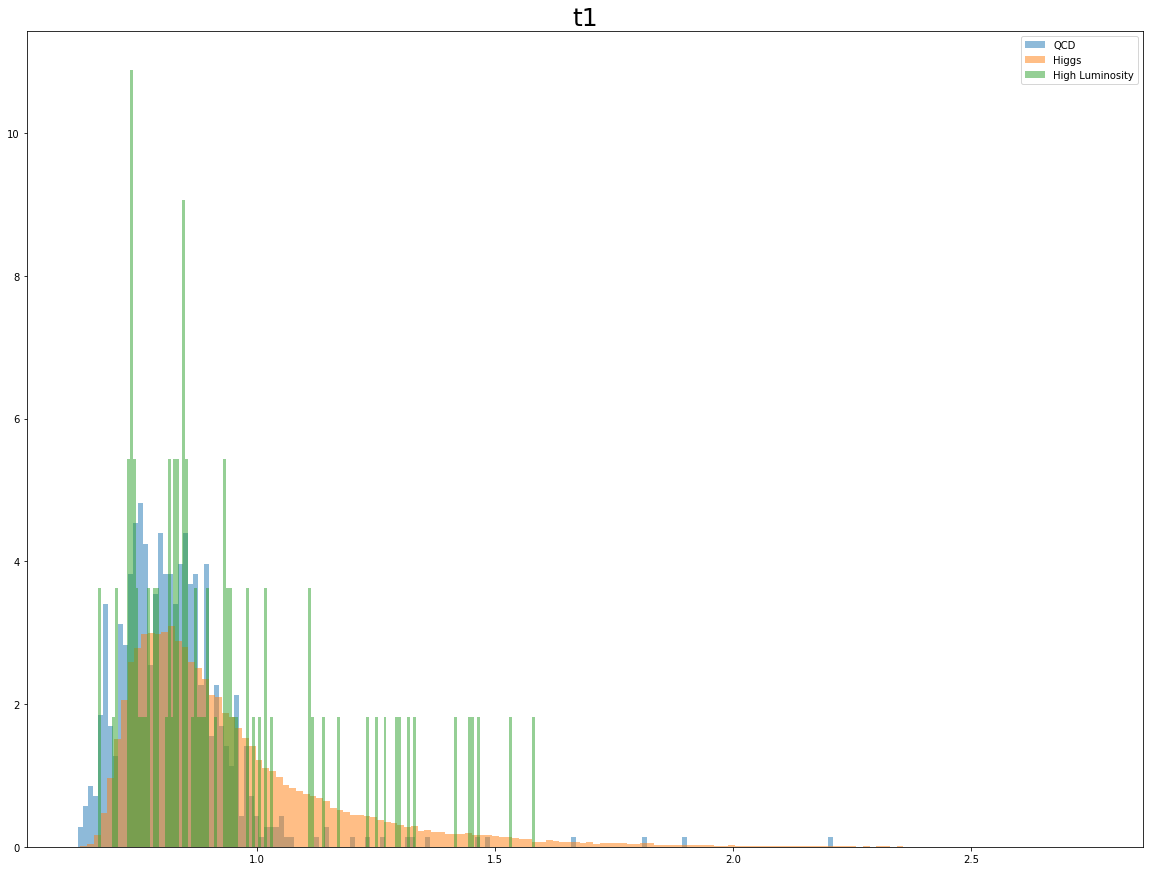

In [205]:
qcd_hist = plt.hist(qcd_cut['t1'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t1'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['t1'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('t1',size=25)
plt.legend()
plt.show()

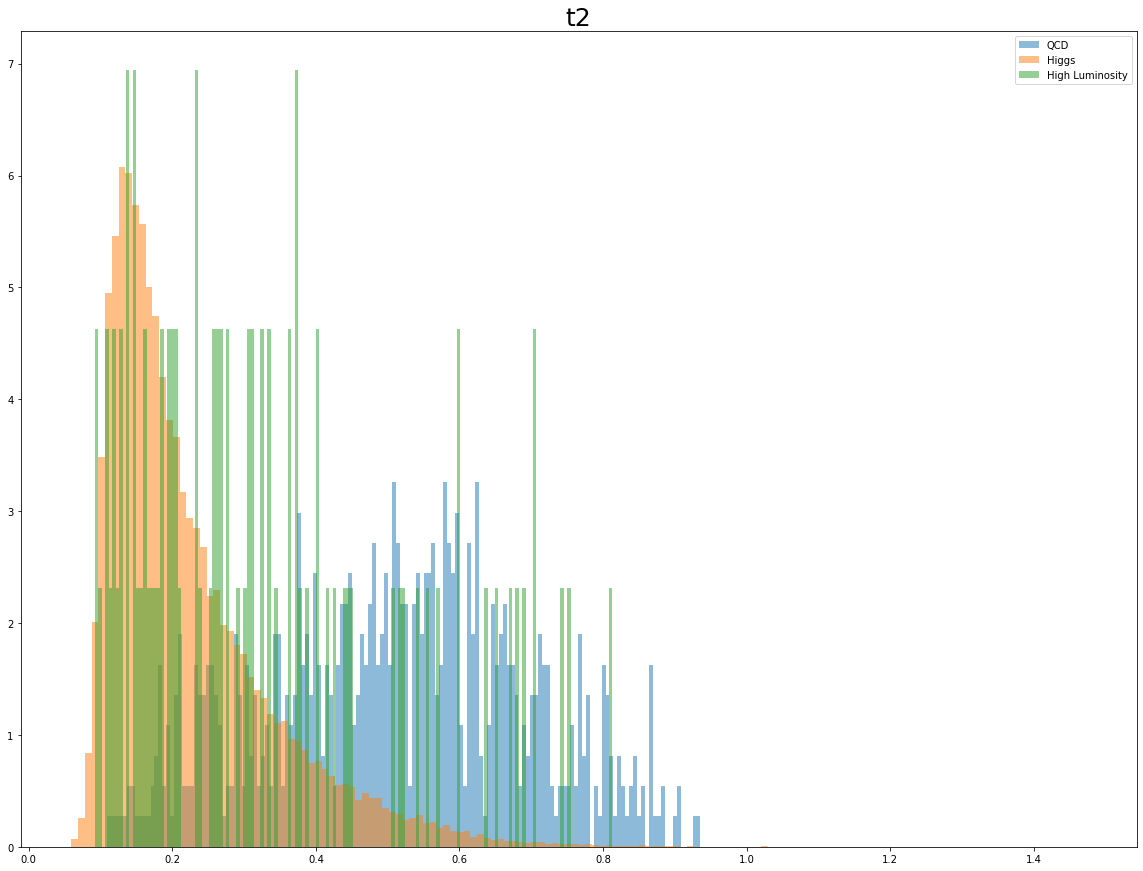

In [206]:
qcd_hist = plt.hist(qcd_cut['t2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['t2'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('t2',size=25)
plt.legend()
plt.show()

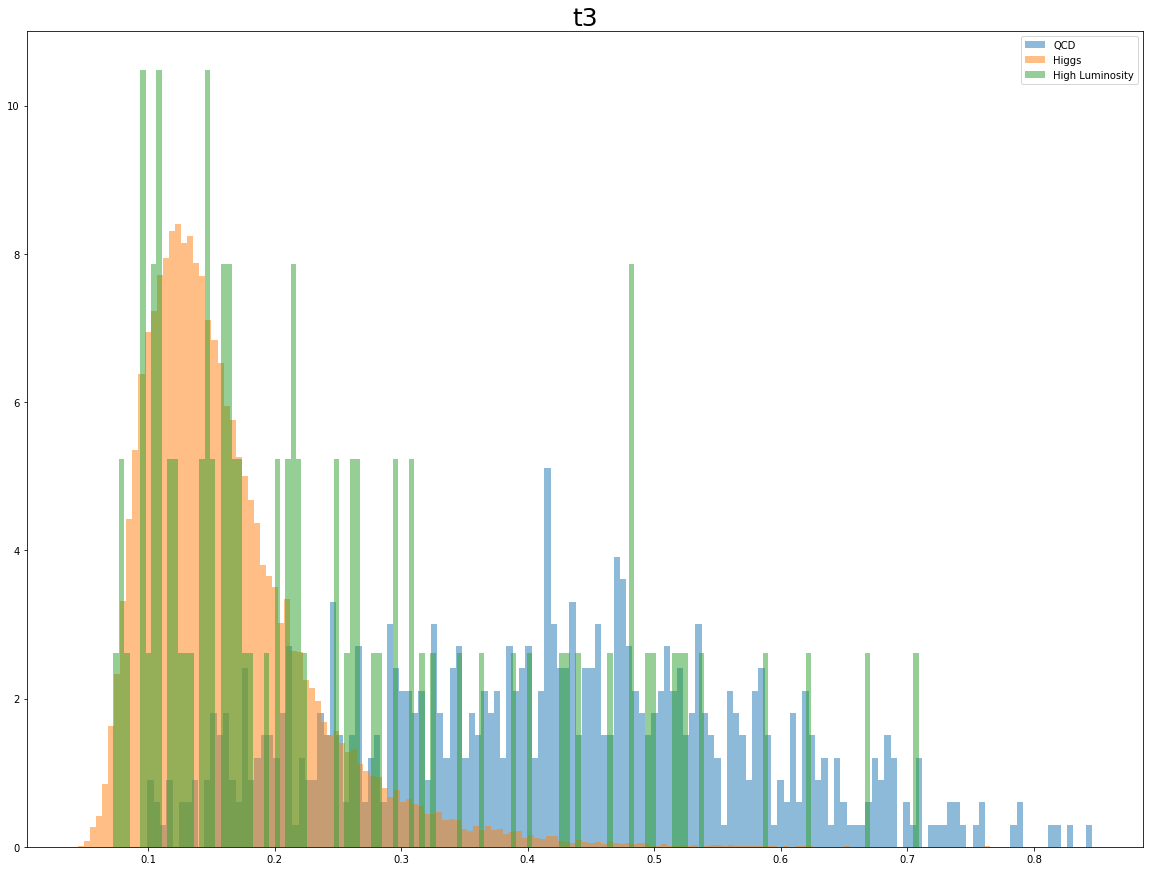

In [207]:
qcd_hist = plt.hist(qcd_cut['t3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t3'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['t3'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('t3',size=25)
plt.legend()
plt.show()

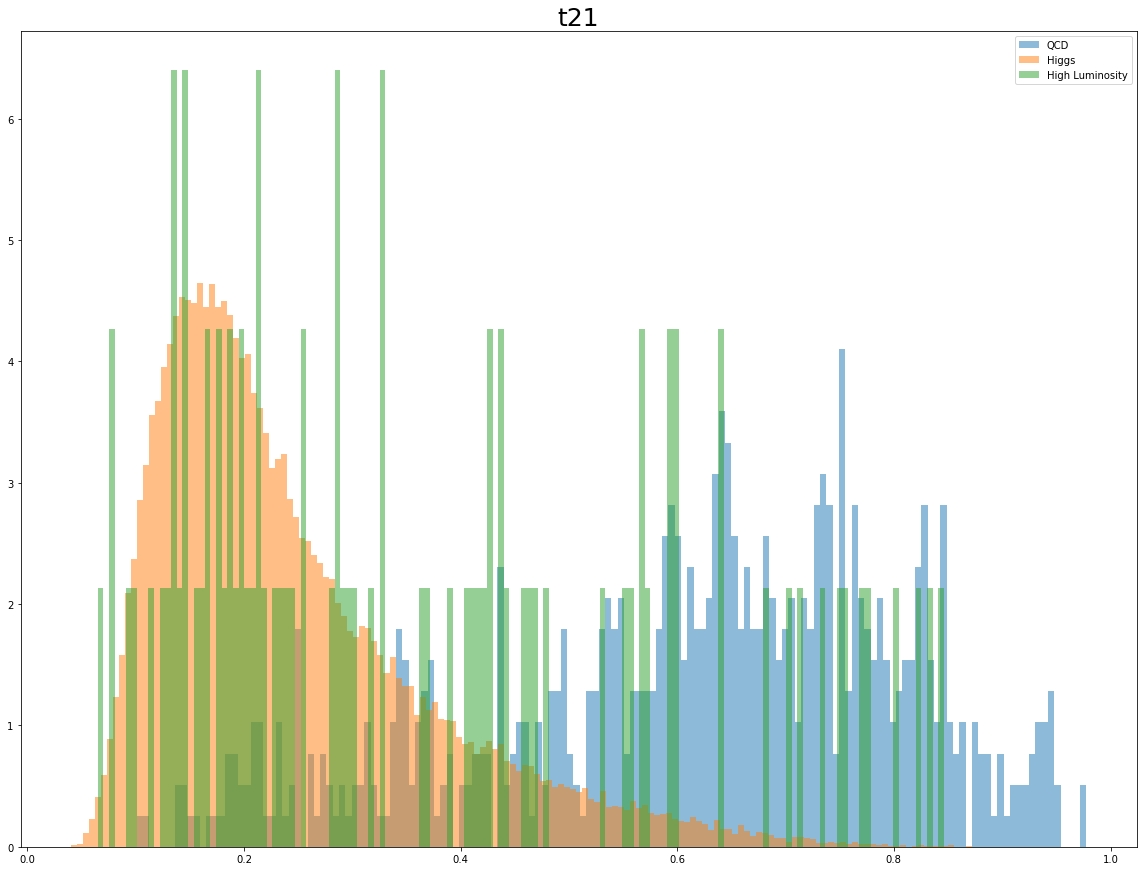

In [208]:
qcd_hist = plt.hist(qcd_cut['t21'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t21'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['t21'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('t21',size=25)
plt.legend()
plt.show()

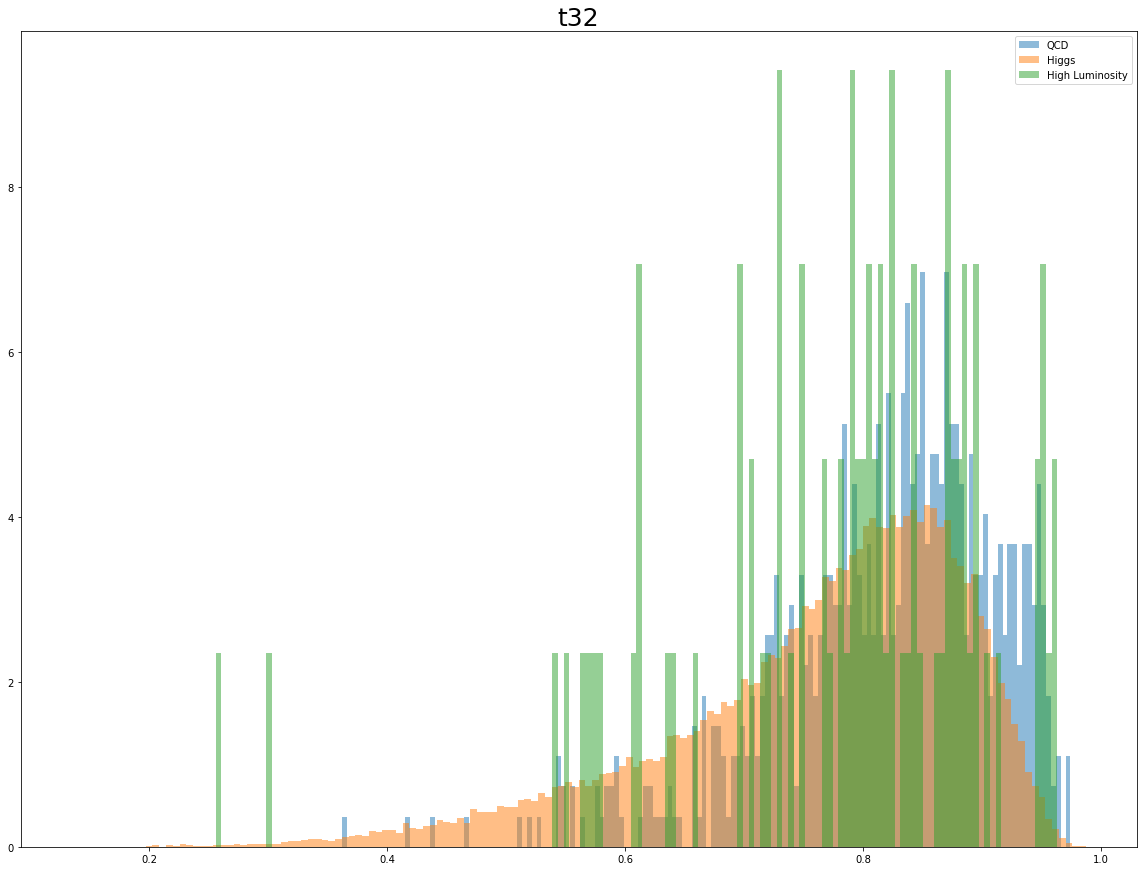

In [209]:
qcd_hist = plt.hist(qcd_cut['t32'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t32'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['t32'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('t32',size=25)
plt.legend()
plt.show()

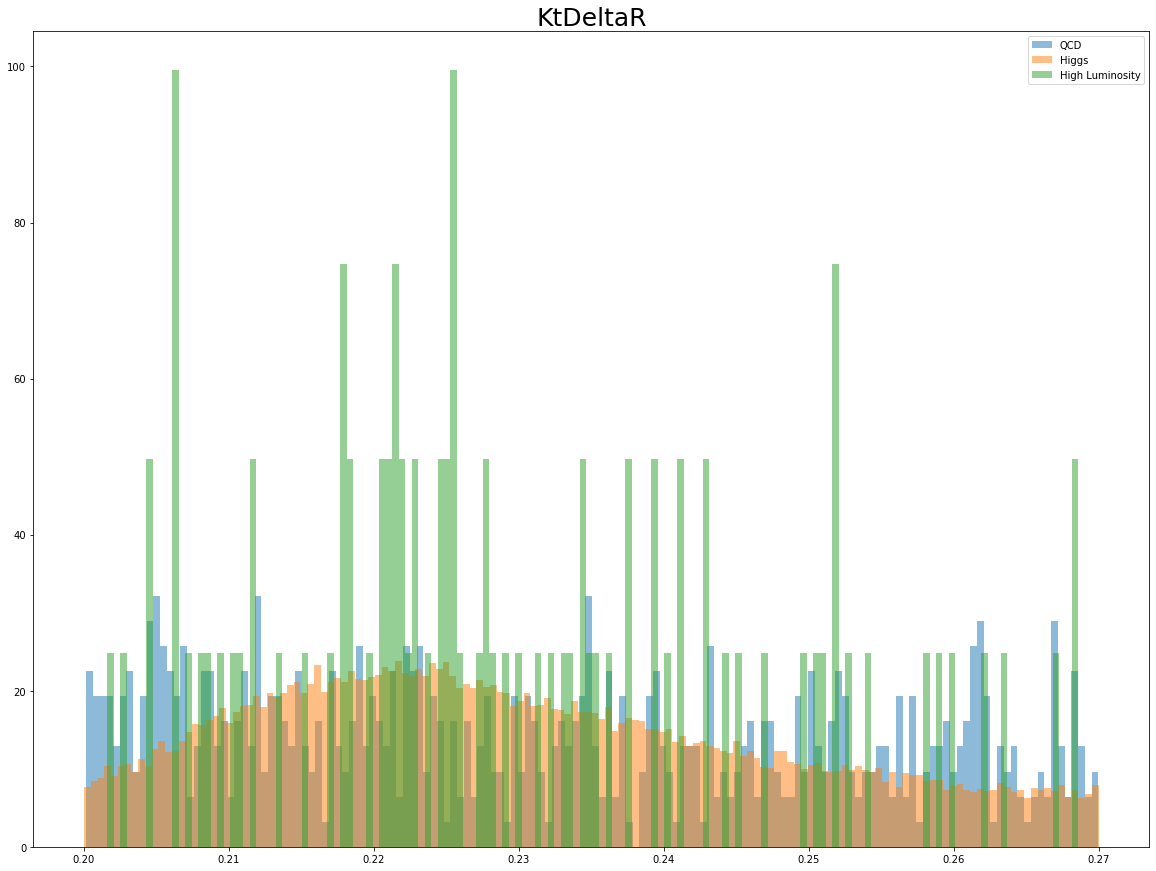

In [210]:
qcd_hist = plt.hist(qcd_cut['KtDeltaR'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['KtDeltaR'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(high_cut['KtDeltaR'],density=True, bins=150, label='High Luminosity', alpha=0.5)
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

In [211]:
N_qcd = len(qcd[qcd_kmcut == 1])/100000*2000
N_high= len(high[high_kmcut == 1])
prob=stats.poisson.sf(N_high, N_qcd)
sig=stats.norm.isf(prob)
print('Observed significance is',sig)

Observed significance is 13.886381901081537


Our observed significance is 13.9 sigma which is much higher than expected significance 6.7 sigma.

### 2. Low luminosity data

- Focus on each feature of your event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
- Evaluate observed significance and compare your results to expectation

#### Without event selection 

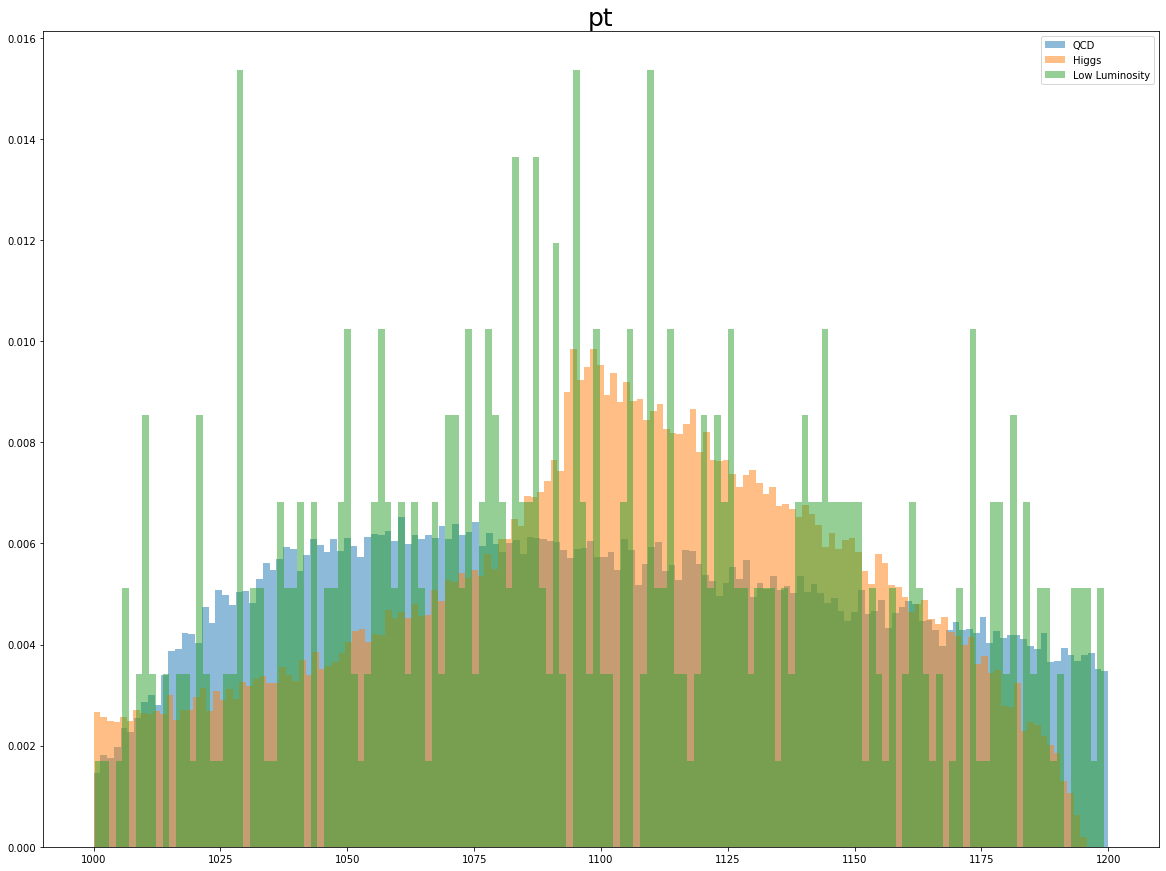

In [213]:
qcd_hist = plt.hist(qcd['pt'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['pt'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['pt'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('pt',size=25)
plt.legend()
plt.show()

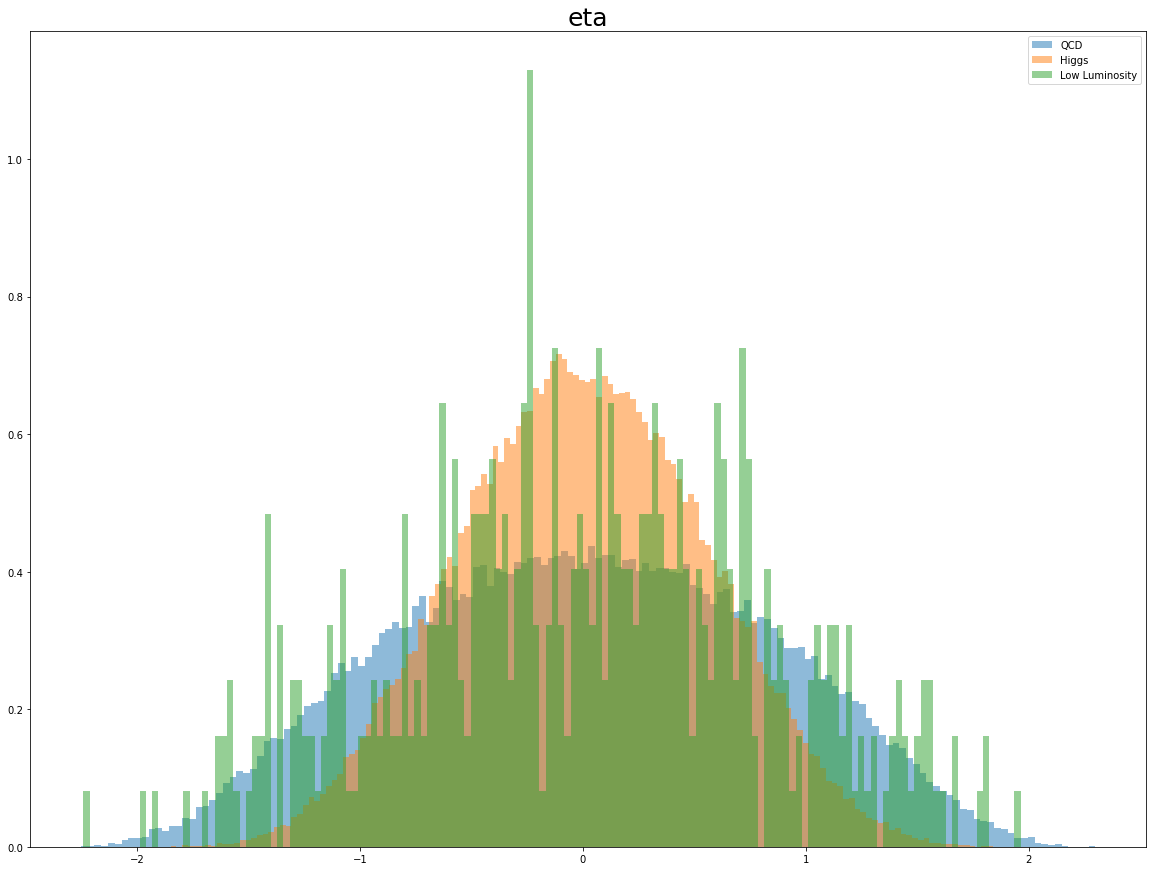

In [214]:
qcd_hist = plt.hist(qcd['eta'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['eta'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['eta'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('eta',size=25)
plt.legend()
plt.show()

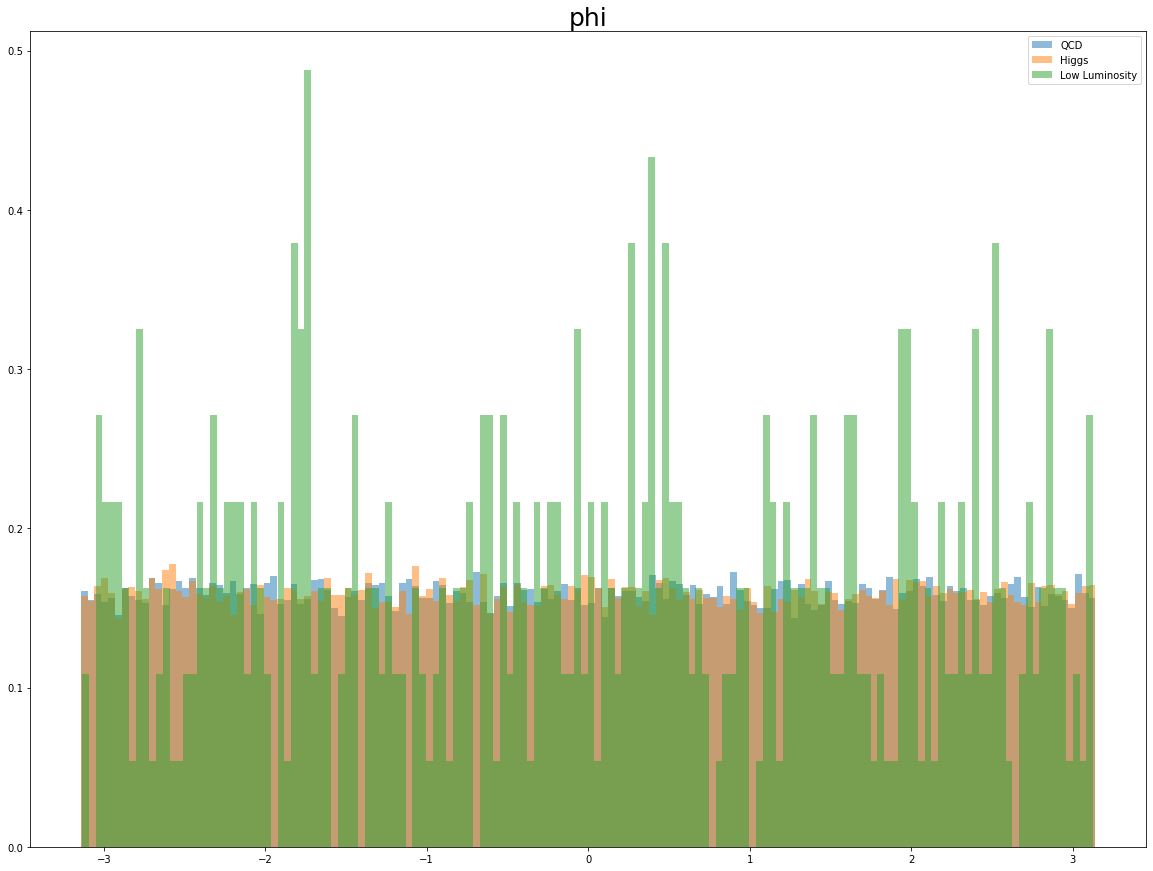

In [215]:
qcd_hist = plt.hist(qcd['phi'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['phi'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['phi'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('phi',size=25)
plt.legend()
plt.show()

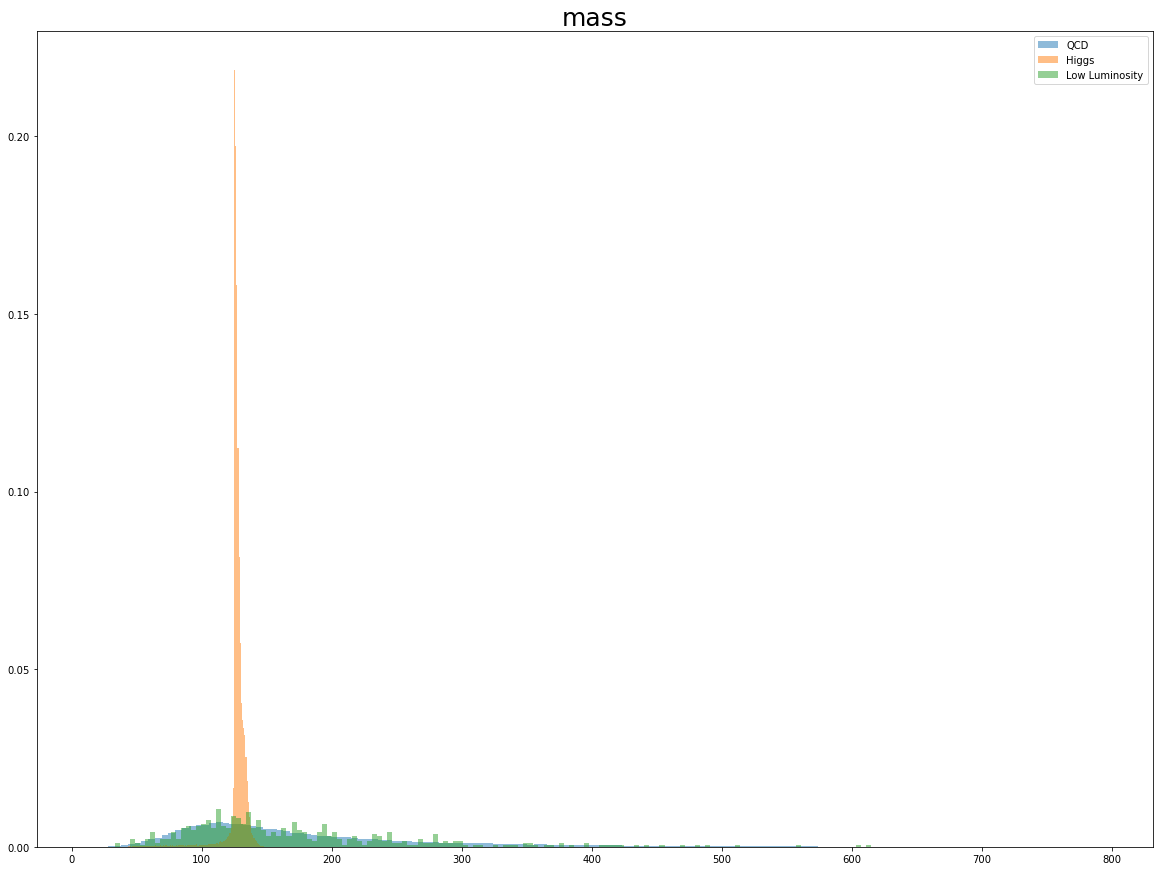

In [216]:
qcd_hist = plt.hist(qcd['mass'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['mass'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['mass'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('mass',size=25)
plt.legend()
plt.show()

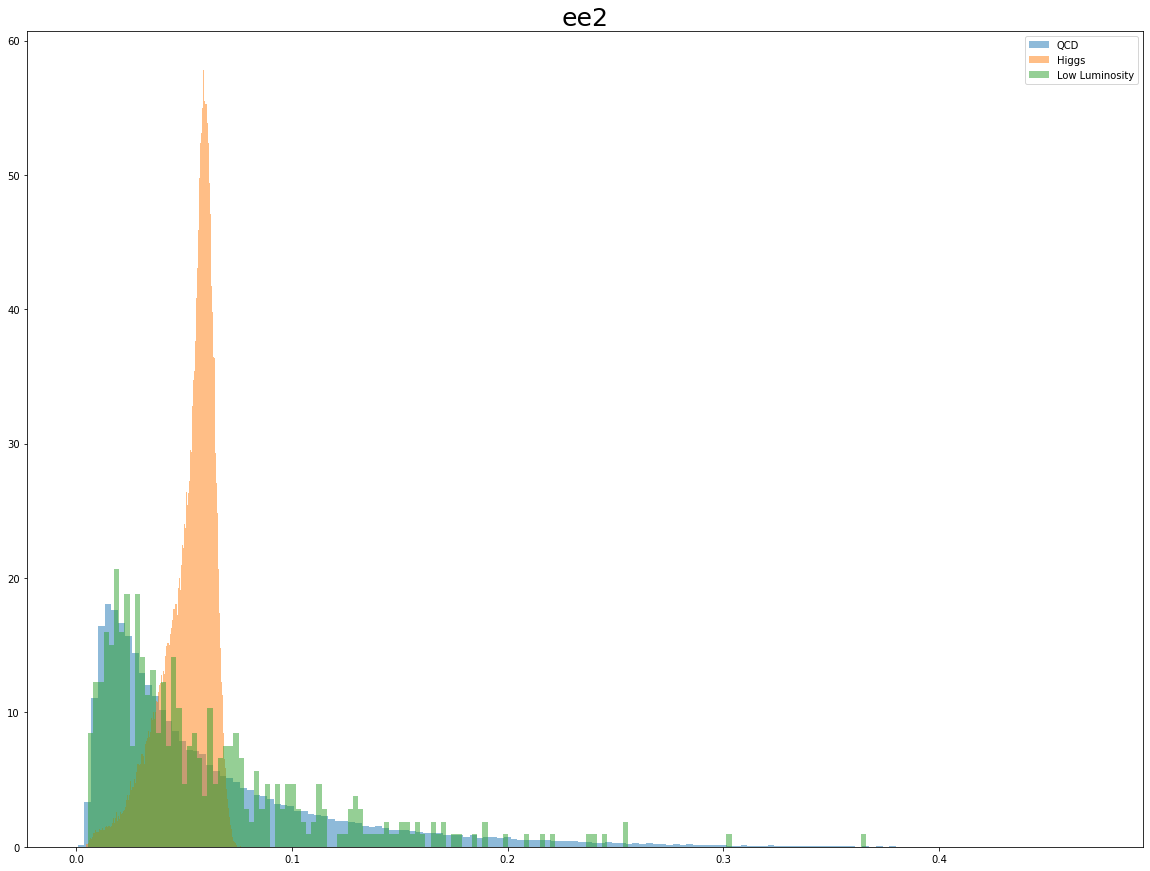

In [217]:
qcd_hist = plt.hist(qcd['ee2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['ee2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['ee2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('ee2',size=25)
plt.legend()
plt.show()

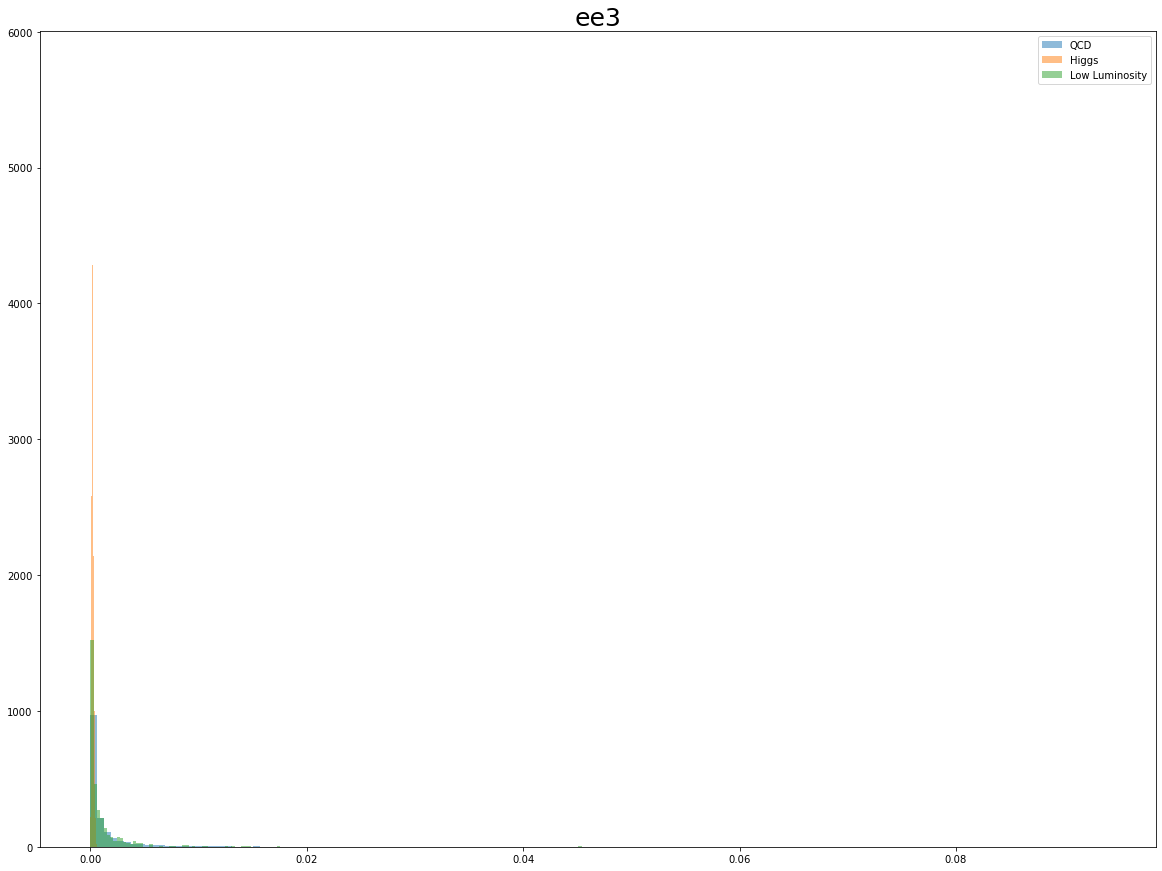

In [218]:
qcd_hist = plt.hist(qcd['ee3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['ee3'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['ee3'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('ee3',size=25)
plt.legend()
plt.show()

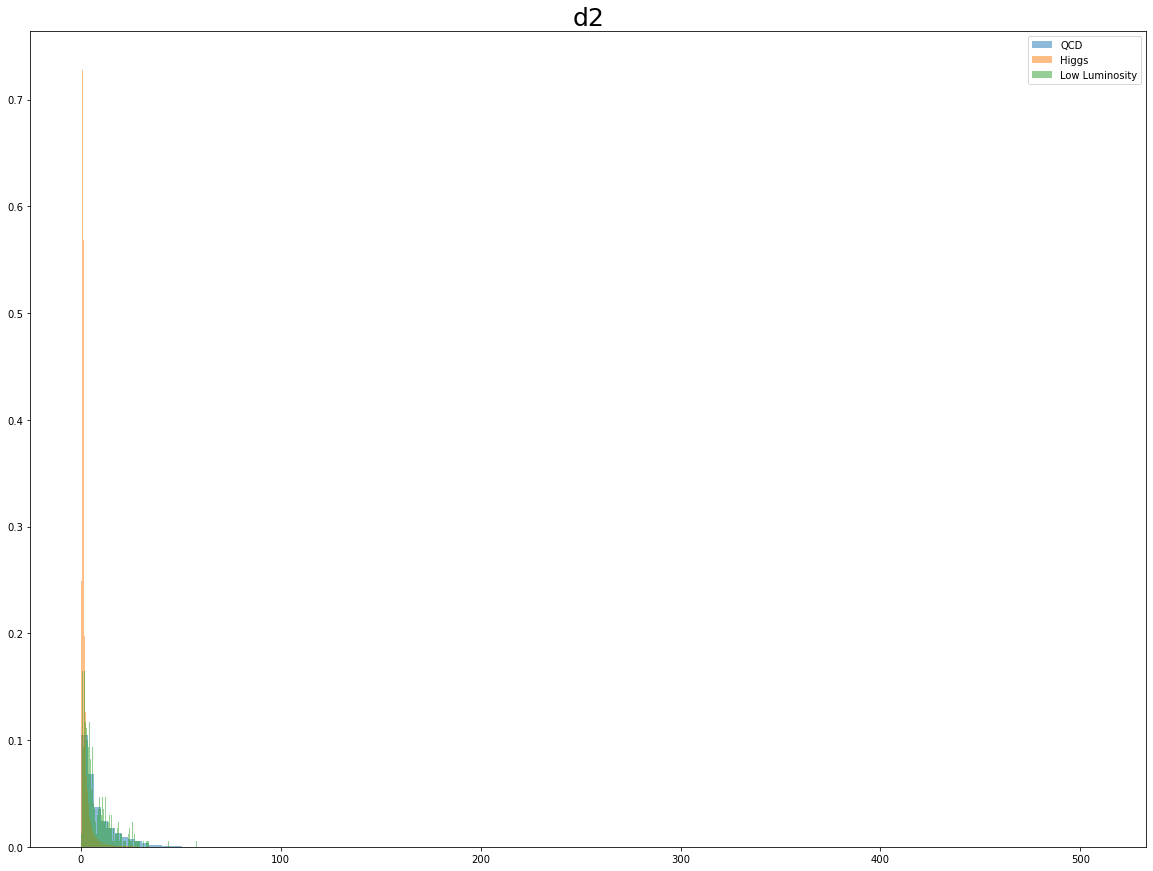

In [219]:
qcd_hist = plt.hist(qcd['d2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['d2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['d2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('d2',size=25)
plt.legend()
plt.show()

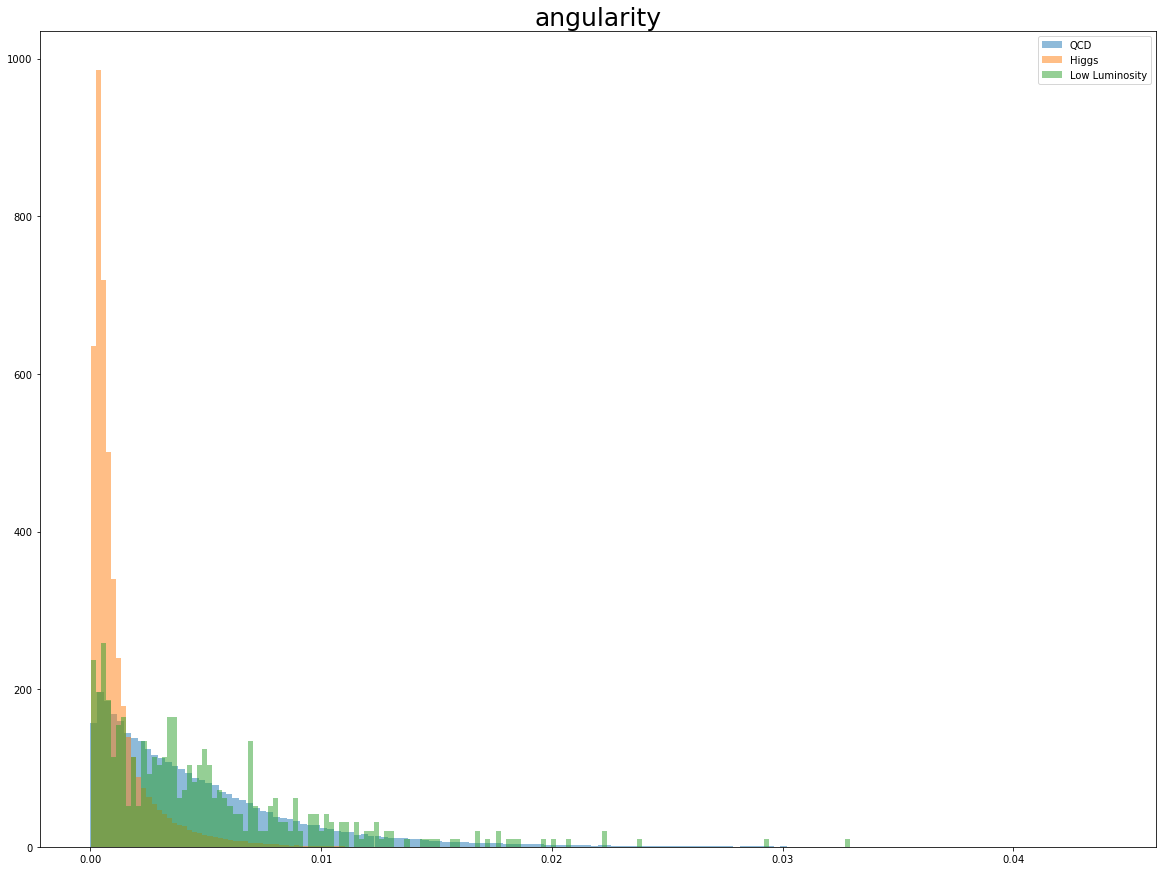

In [220]:
qcd_hist = plt.hist(qcd['angularity'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['angularity'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['angularity'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('angularity',size=25)
plt.legend()
plt.show()

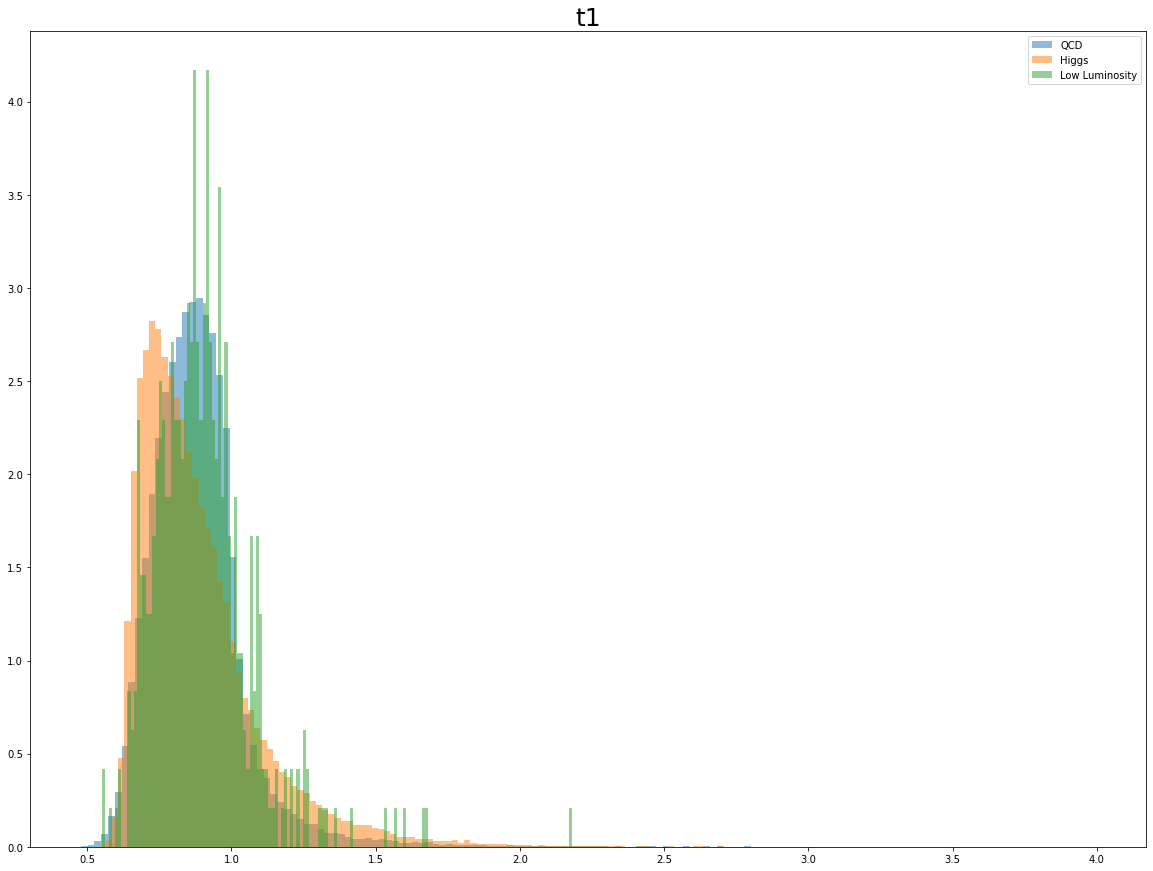

In [221]:
qcd_hist = plt.hist(qcd['t1'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['t1'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['t1'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t1',size=25)
plt.legend()
plt.show()

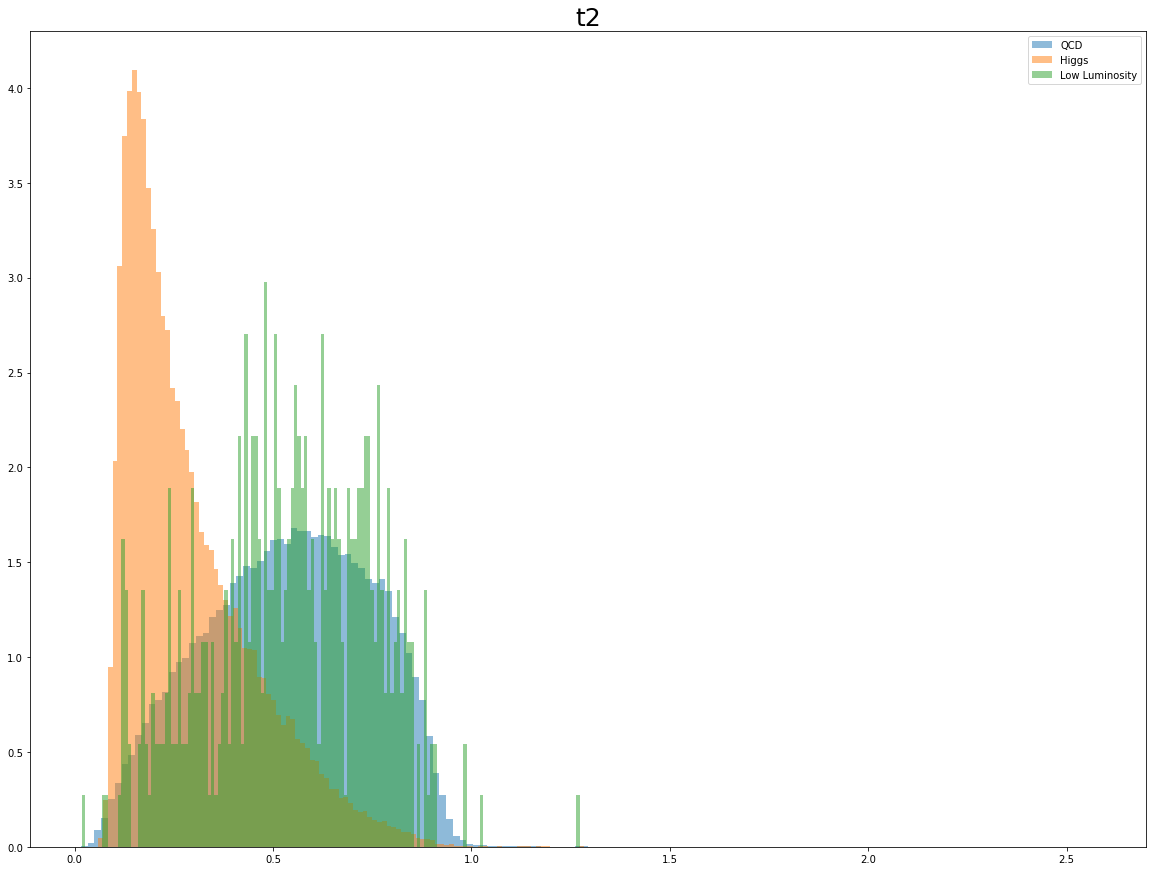

In [222]:
qcd_hist = plt.hist(qcd['t2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['t2'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['t2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t2',size=25)
plt.legend()
plt.show()

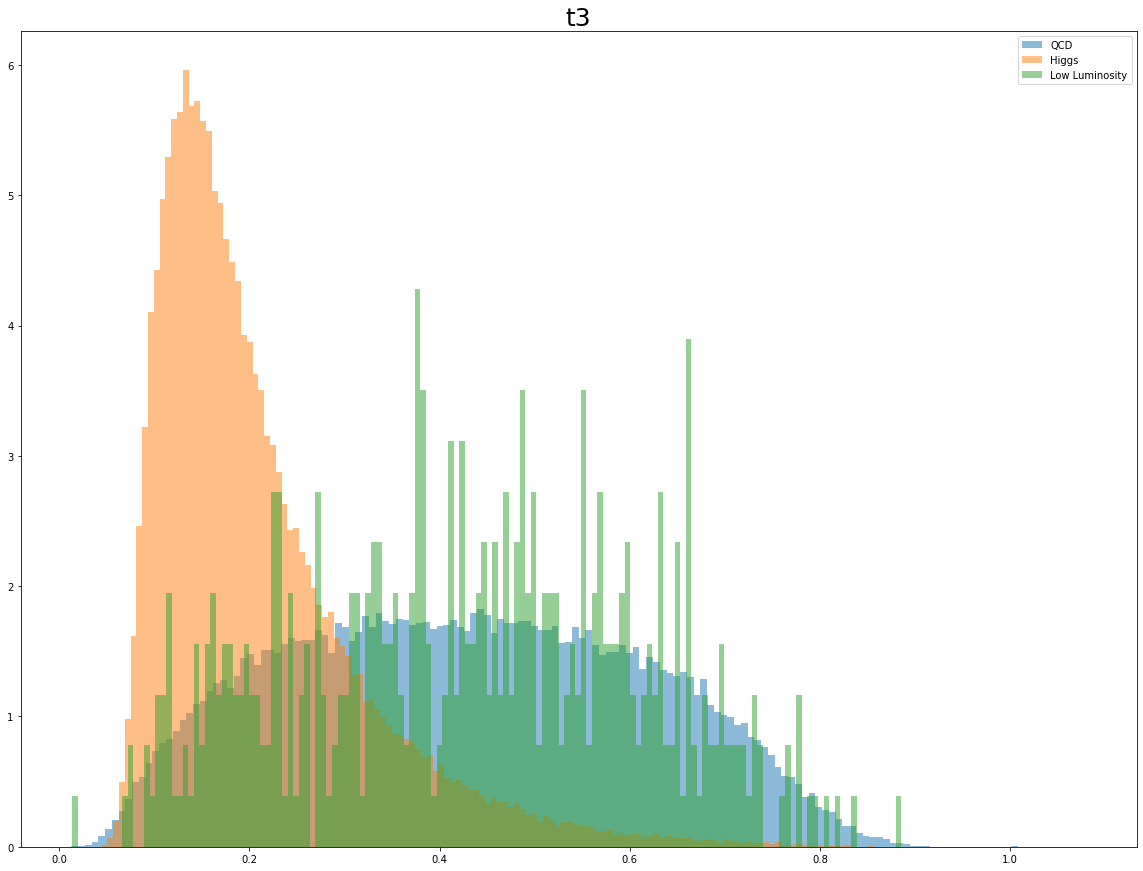

In [223]:
qcd_hist = plt.hist(qcd['t3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['t3'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['t3'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t3',size=25)
plt.legend()
plt.show()

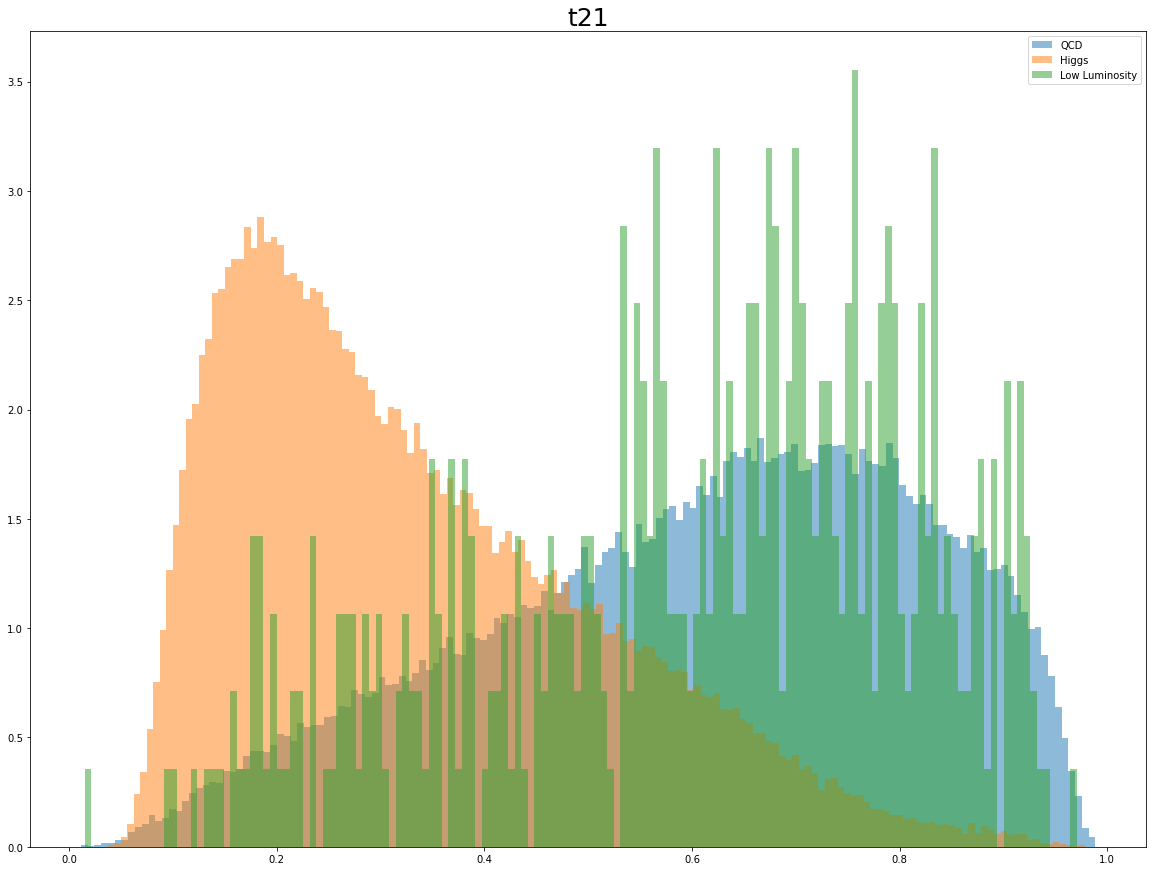

In [224]:
qcd_hist = plt.hist(qcd['t21'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['t21'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['t21'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t21',size=25)
plt.legend()
plt.show()

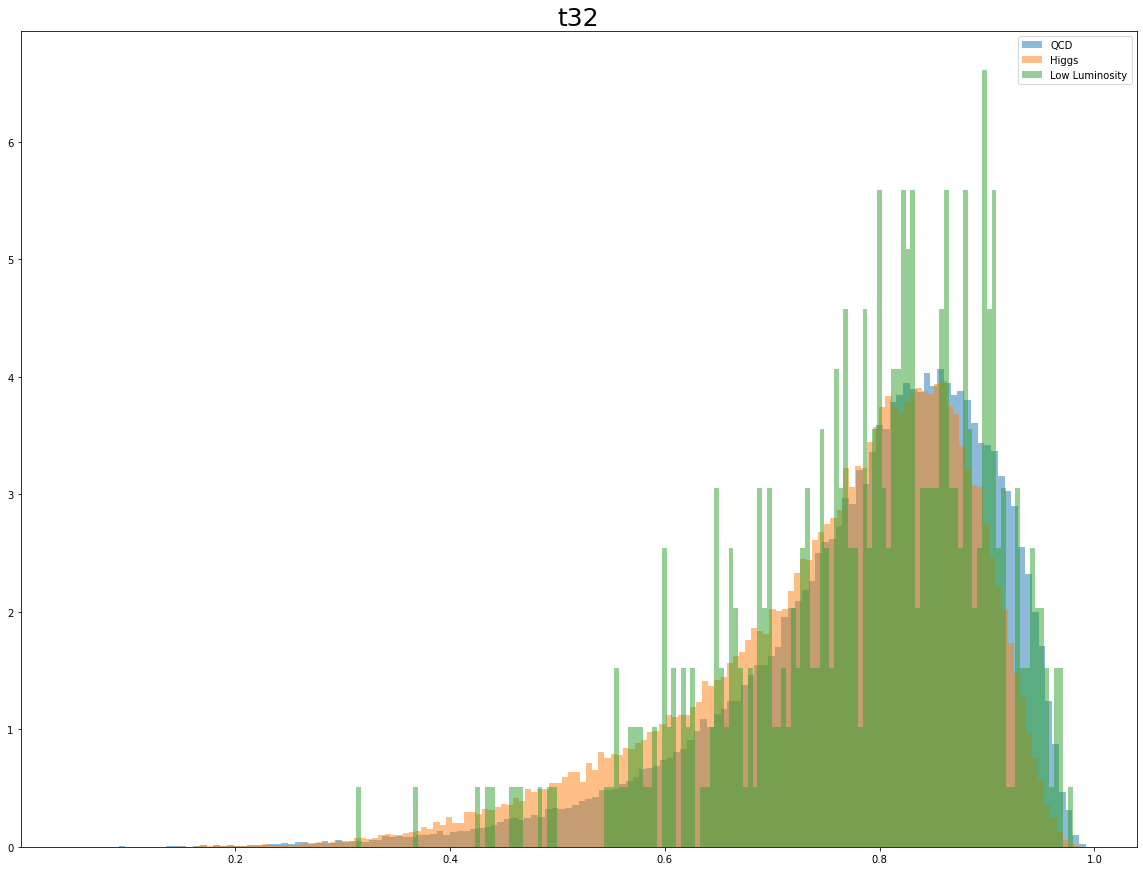

In [225]:
qcd_hist = plt.hist(qcd['t32'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['t32'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['t32'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t32',size=25)
plt.legend()
plt.show()

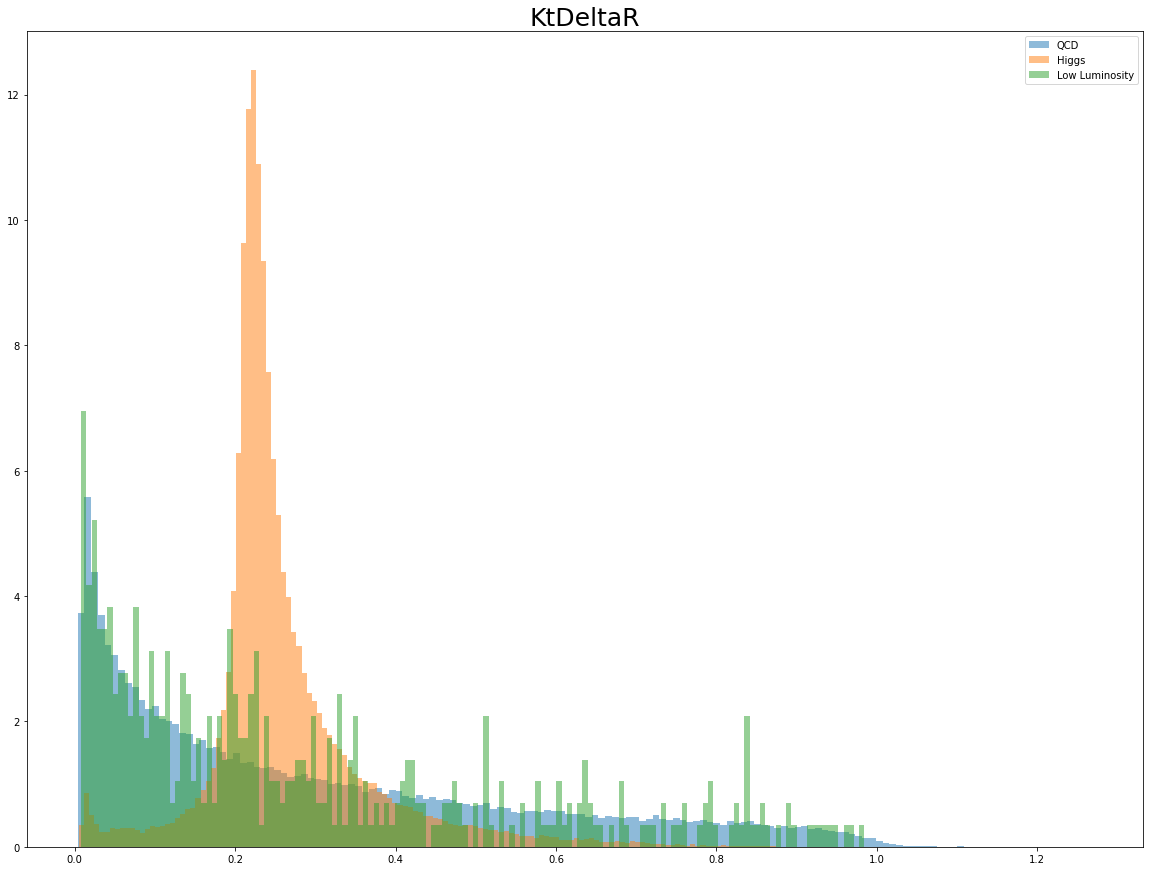

In [226]:
qcd_hist = plt.hist(qcd['KtDeltaR'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs['KtDeltaR'],density=True, bins=150, label='Higgs', alpha=0.5)
high_hist= plt.hist(low['KtDeltaR'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

#### With event selection

In [227]:
higgs_kmcut = (higgs['KtDeltaR']>0.2) & (higgs['KtDeltaR'] <0.27) & (higgs['mass']>125) & (higgs['mass'] <135)
qcd_kmcut = (qcd['KtDeltaR']>0.2) & (qcd['KtDeltaR'] <0.27) & (qcd['mass']>125) & (qcd['mass'] <135)
low_kmcut = (low['KtDeltaR']>0.2) & (low['KtDeltaR'] <0.27) & (low['mass']>125) & (low['mass'] <135)
low_cut = low[low_kmcut==1]
qcd_cut = qcd[qcd_kmcut==1]
higgs_cut = higgs[higgs_kmcut==1]

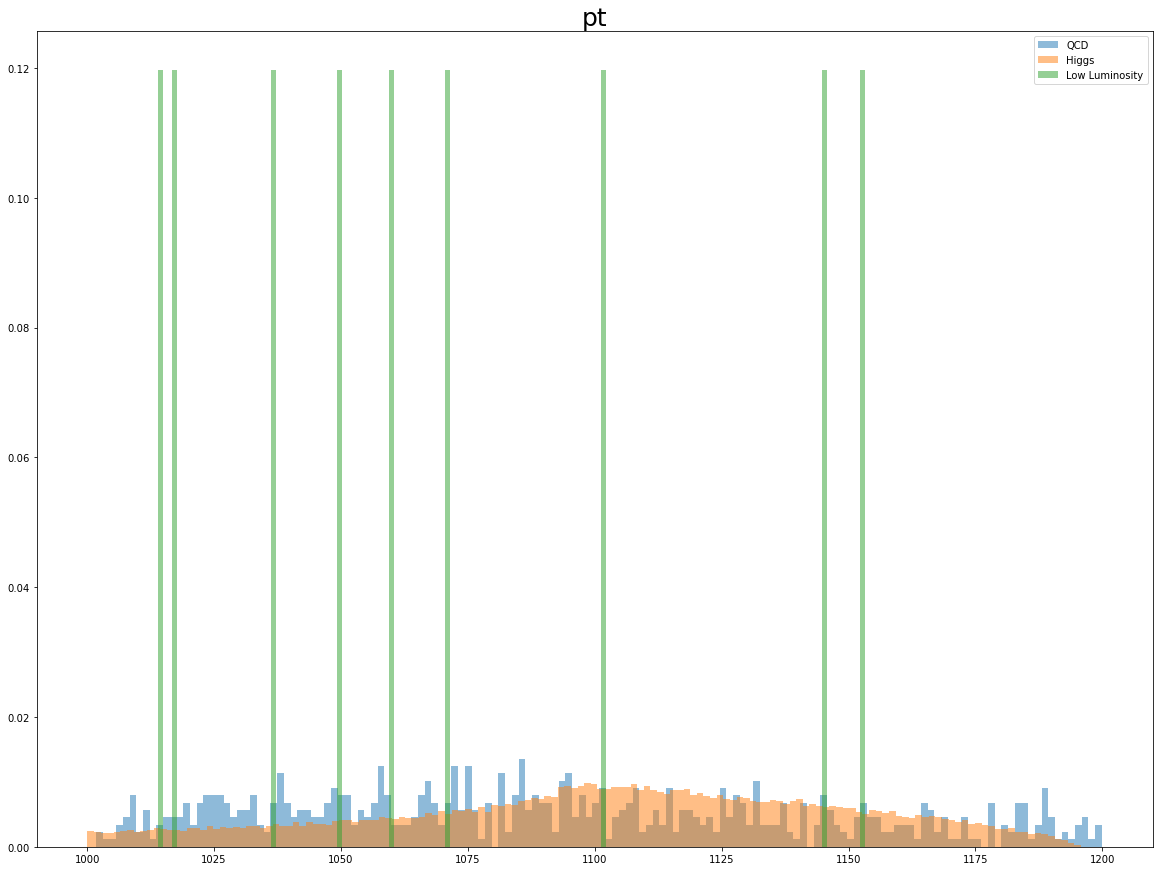

In [228]:
qcd_hist = plt.hist(qcd_cut['pt'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['pt'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['pt'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('pt',size=25)
plt.legend()
plt.show()

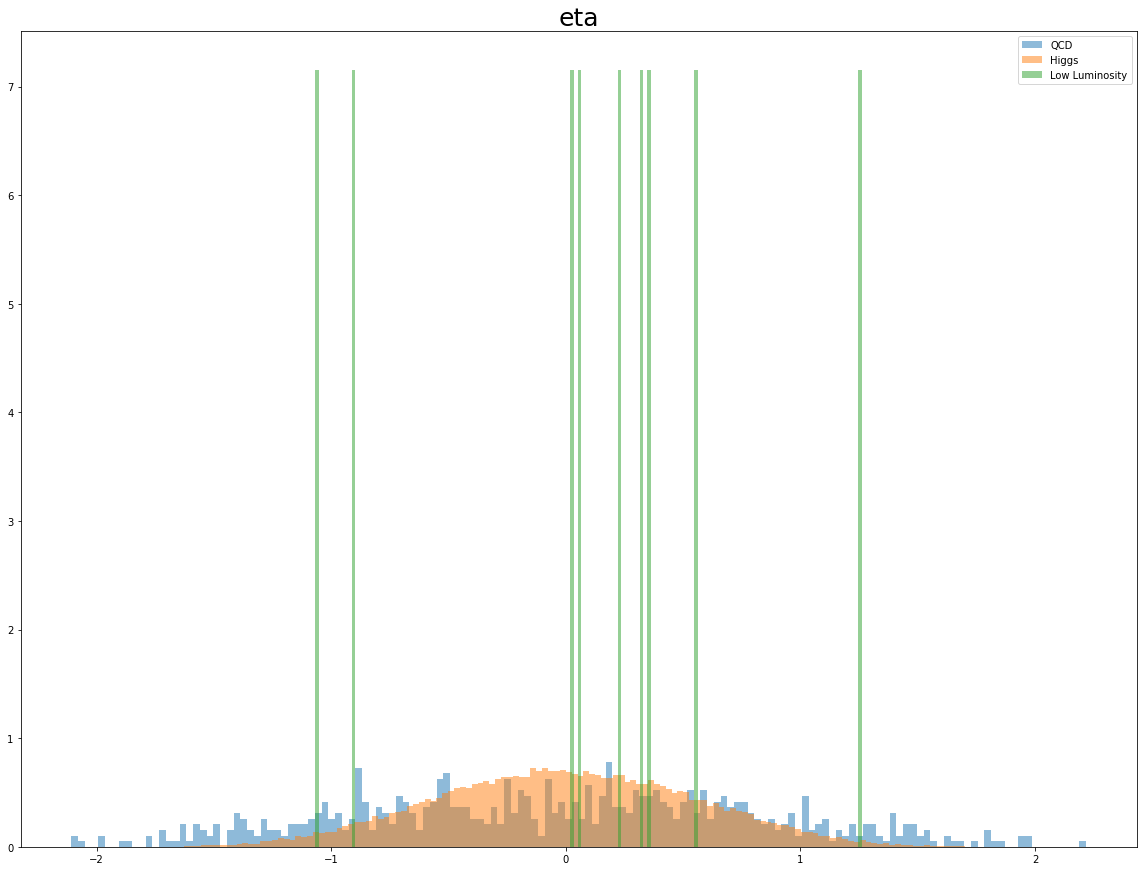

In [229]:
qcd_hist = plt.hist(qcd_cut['eta'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['eta'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['eta'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('eta',size=25)
plt.legend()
plt.show()

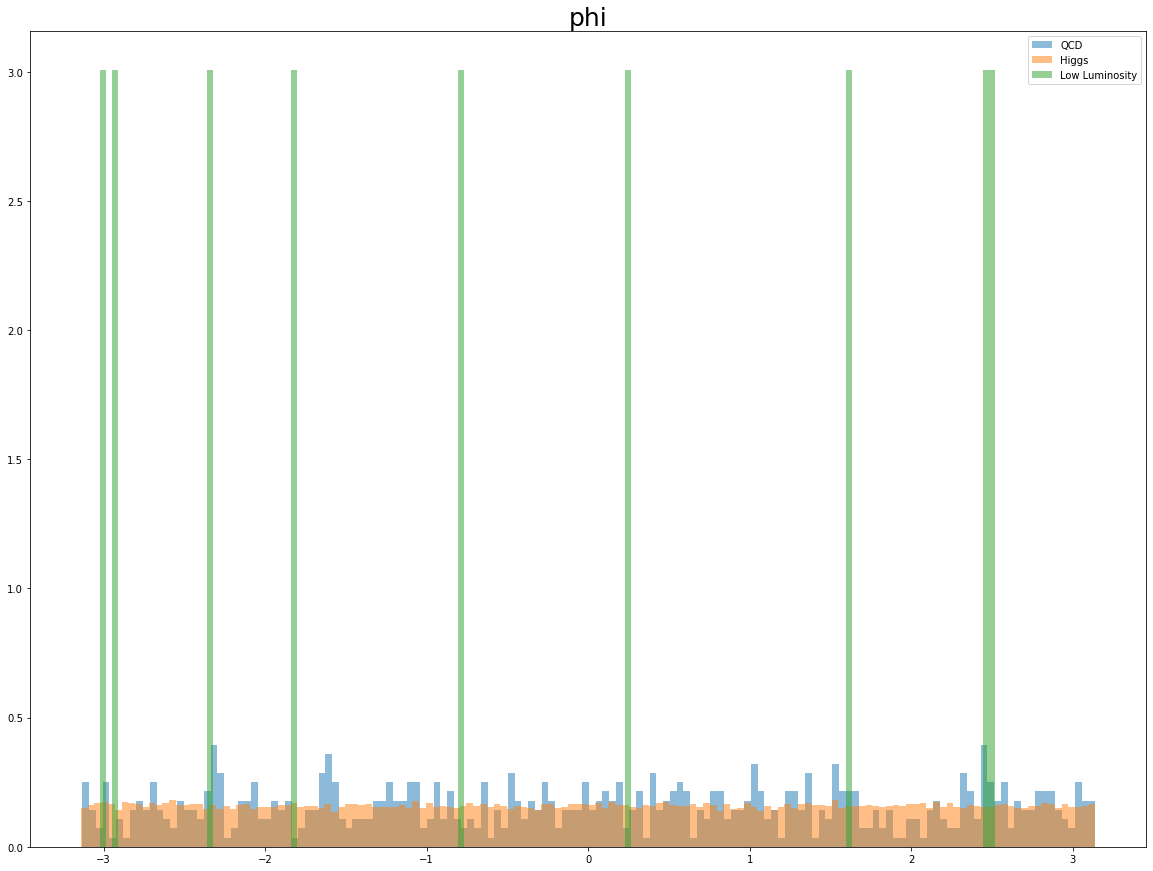

In [230]:
qcd_hist = plt.hist(qcd_cut['phi'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['phi'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['phi'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('phi',size=25)
plt.legend()
plt.show()

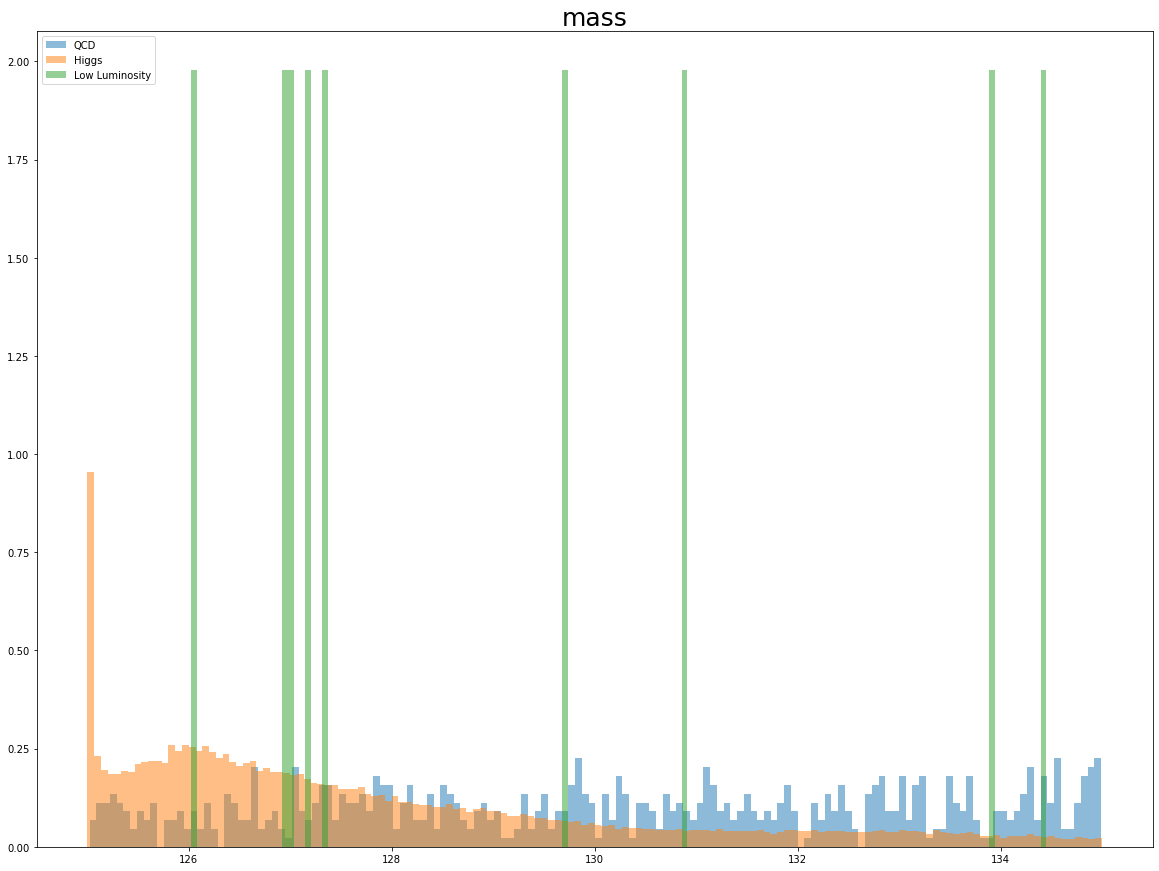

In [231]:
qcd_hist = plt.hist(qcd_cut['mass'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['mass'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['mass'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('mass',size=25)
plt.legend()
plt.show()

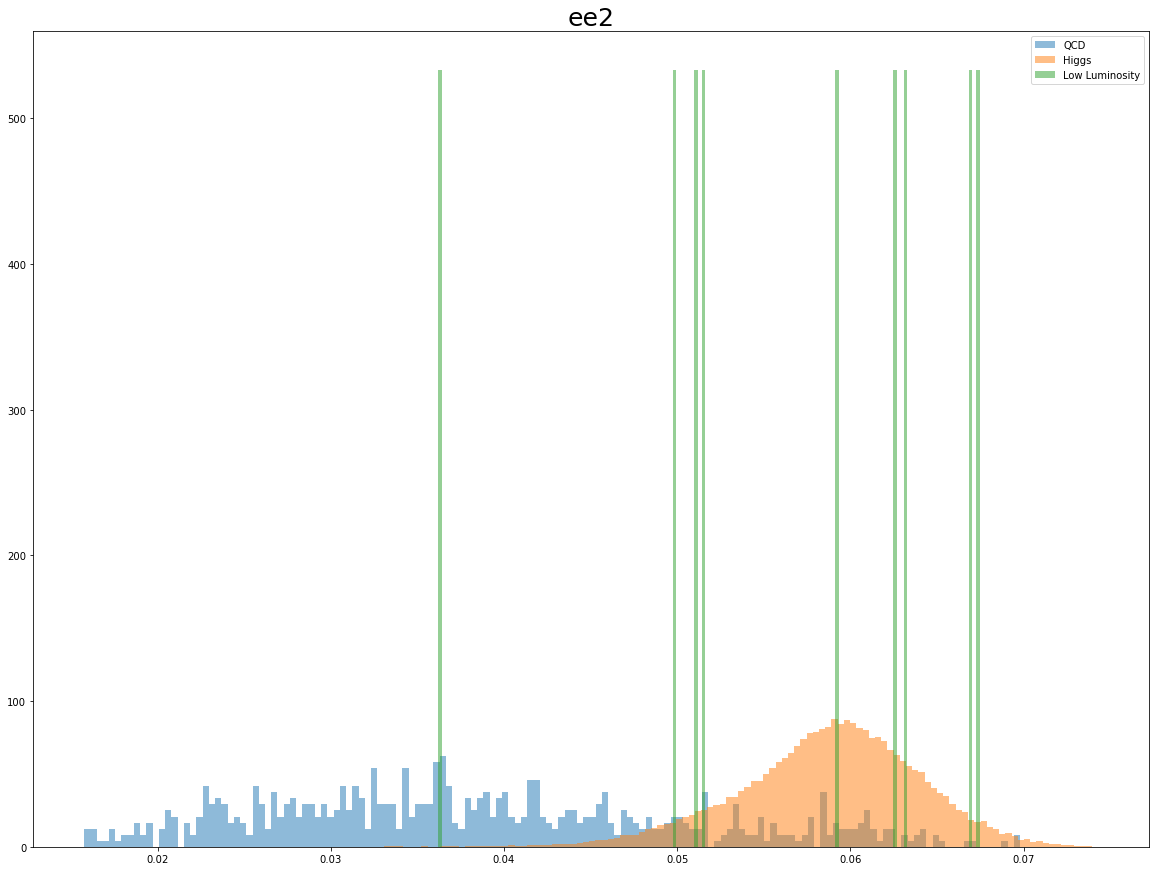

In [232]:
qcd_hist = plt.hist(qcd_cut['ee2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['ee2'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['ee2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('ee2',size=25)
plt.legend()
plt.show()

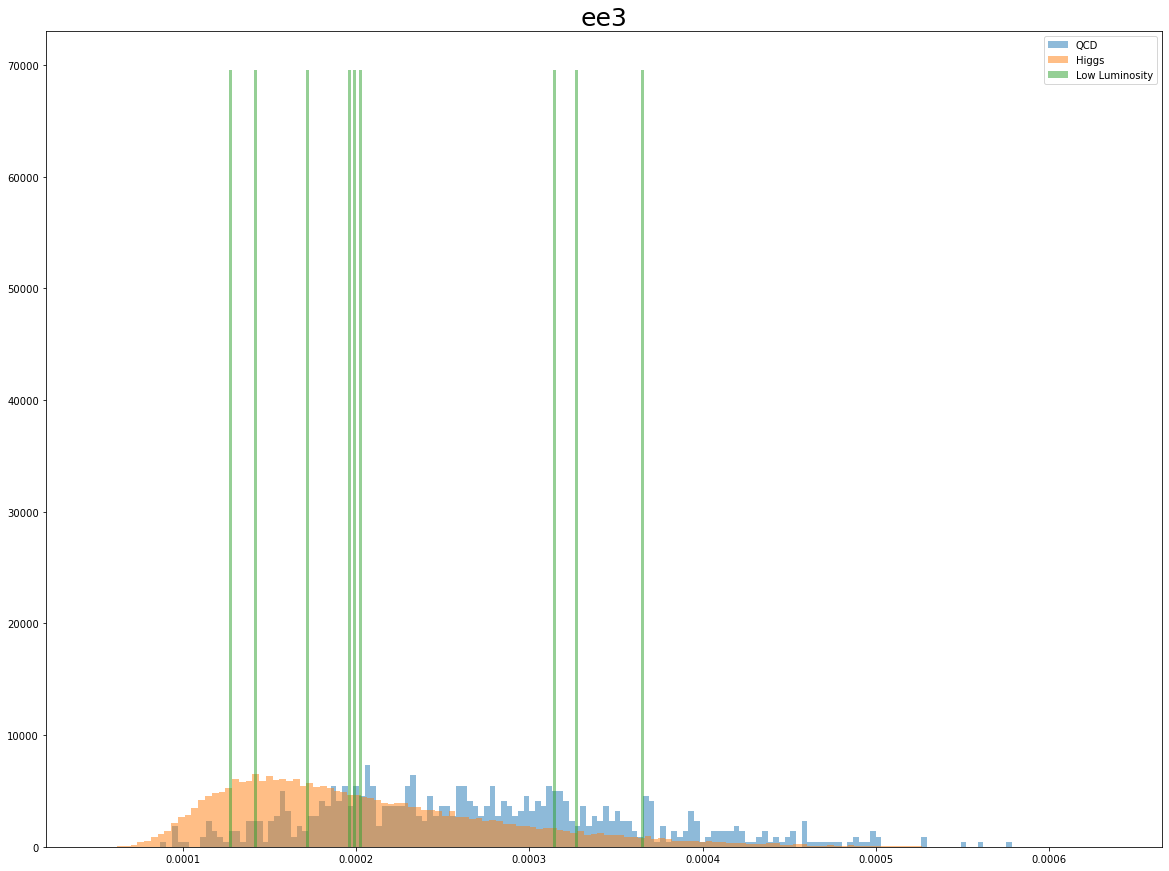

In [233]:
qcd_hist = plt.hist(qcd_cut['ee3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['ee3'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['ee3'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('ee3',size=25)
plt.legend()
plt.show()

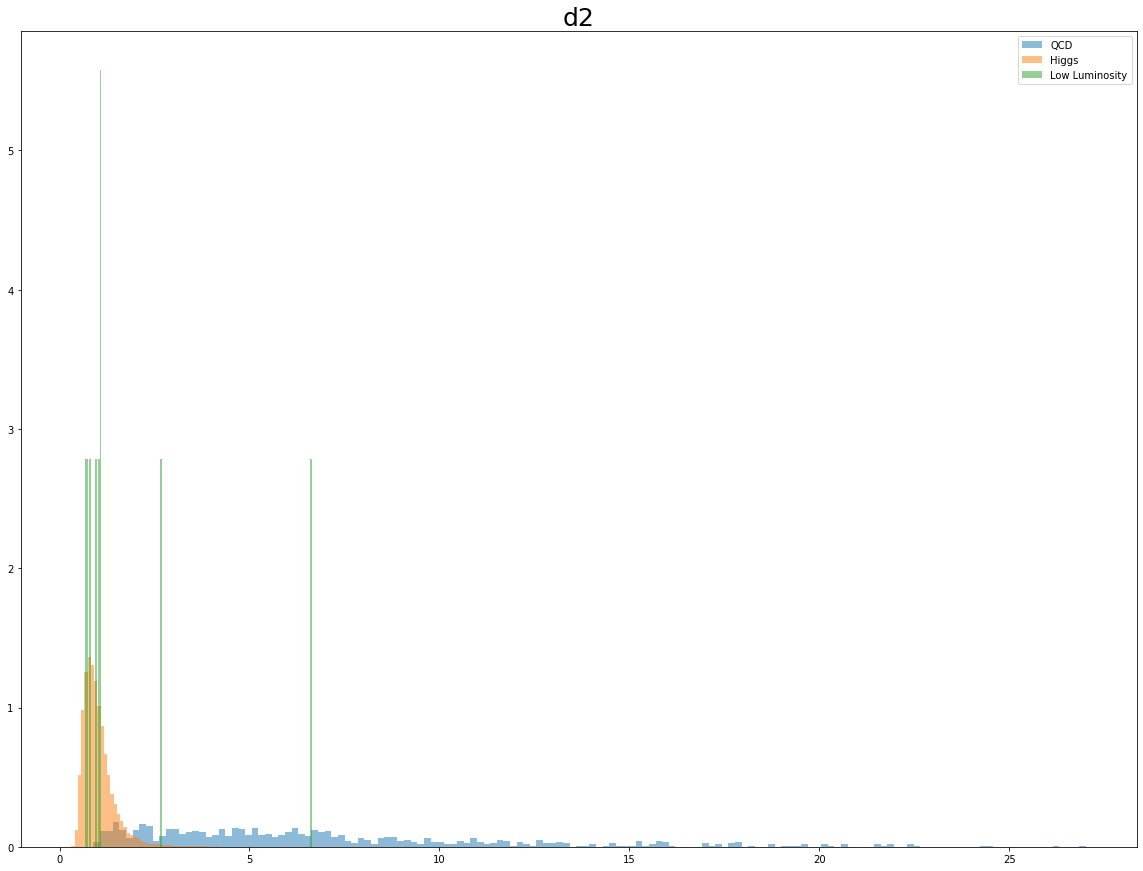

In [234]:
qcd_hist = plt.hist(qcd_cut['d2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['d2'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['d2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('d2',size=25)
plt.legend()
plt.show()

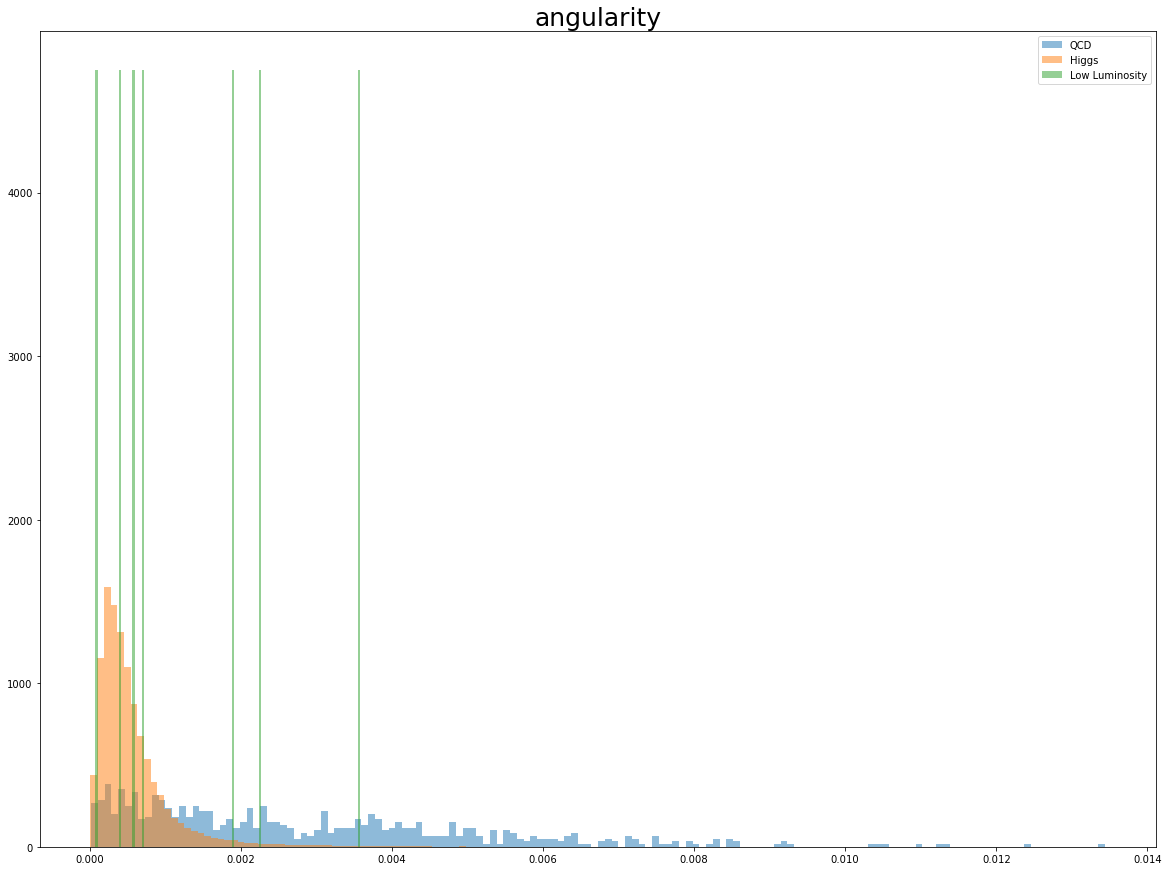

In [235]:
qcd_hist = plt.hist(qcd_cut['angularity'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['angularity'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['angularity'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('angularity',size=25)
plt.legend()
plt.show()

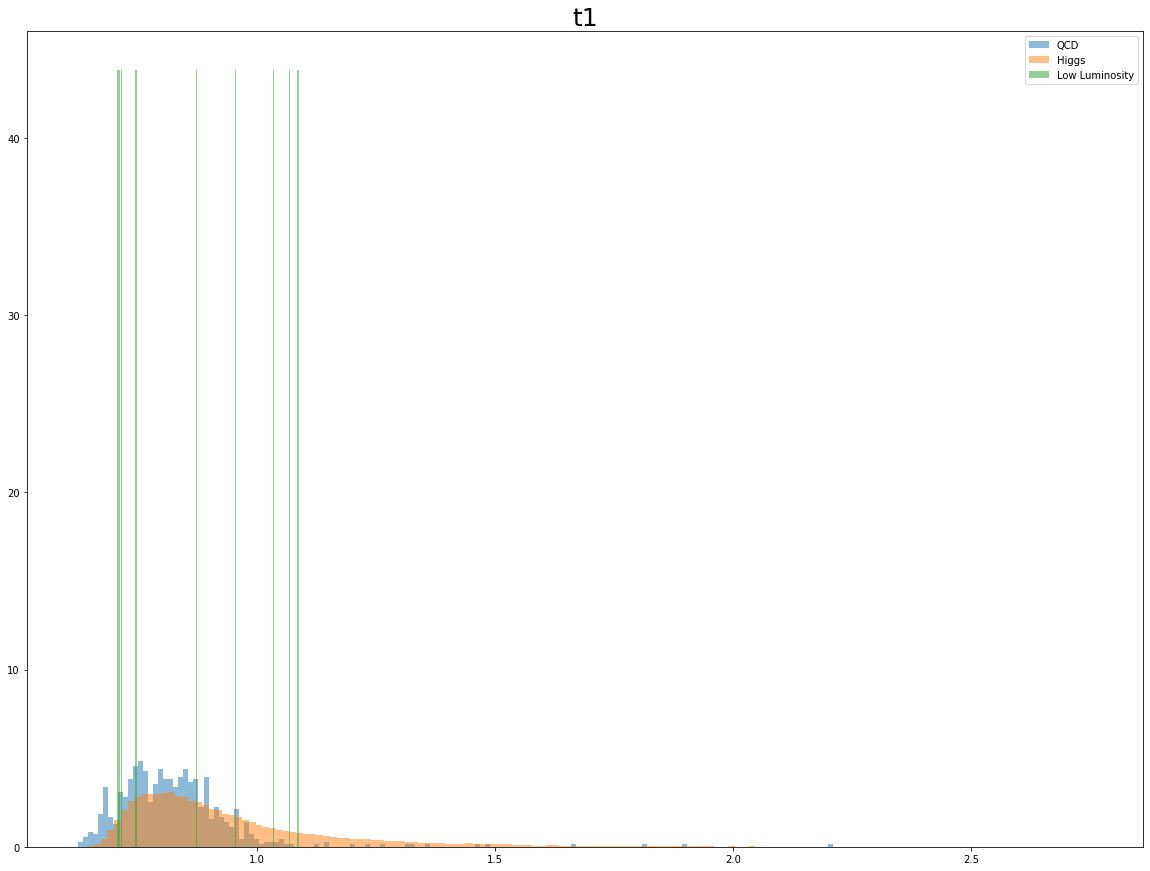

In [236]:
qcd_hist = plt.hist(qcd_cut['t1'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t1'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['t1'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t1',size=25)
plt.legend()
plt.show()

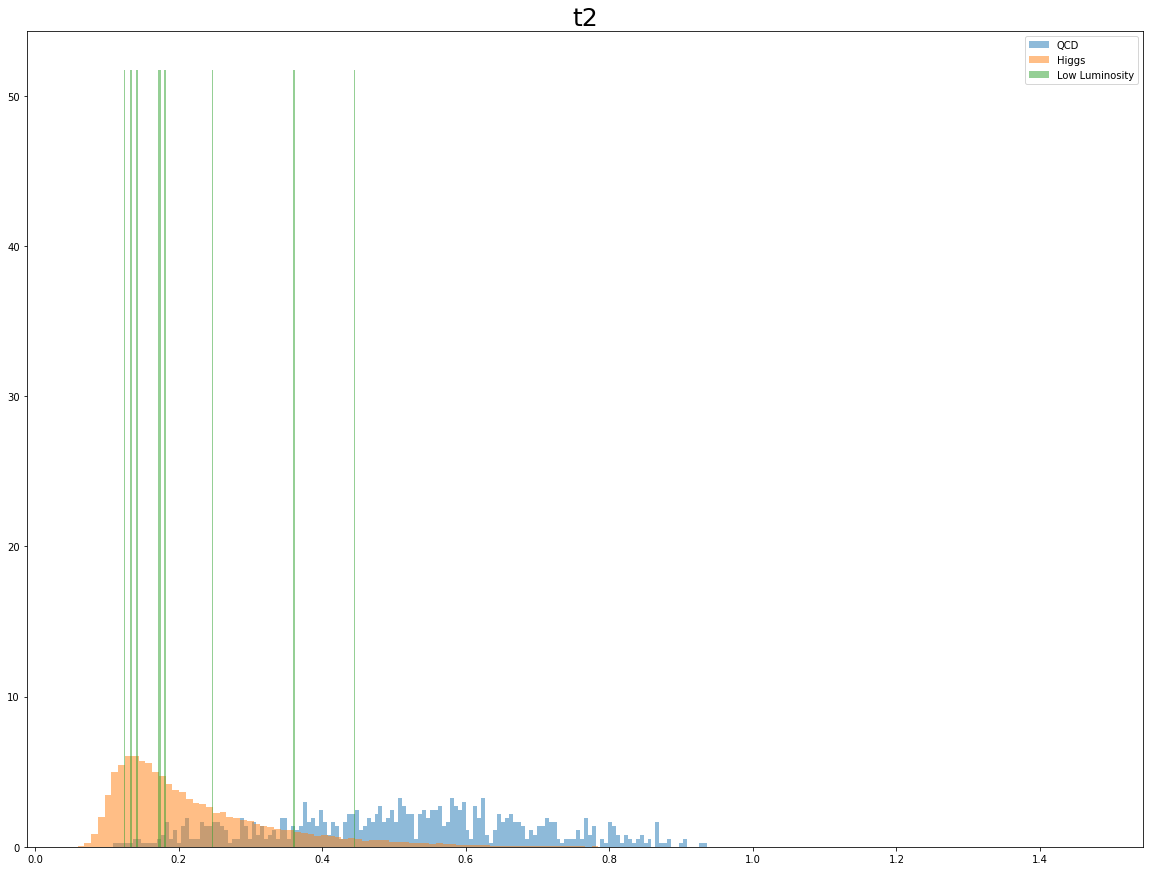

In [237]:
qcd_hist = plt.hist(qcd_cut['t2'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t2'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['t2'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t2',size=25)
plt.legend()
plt.show()

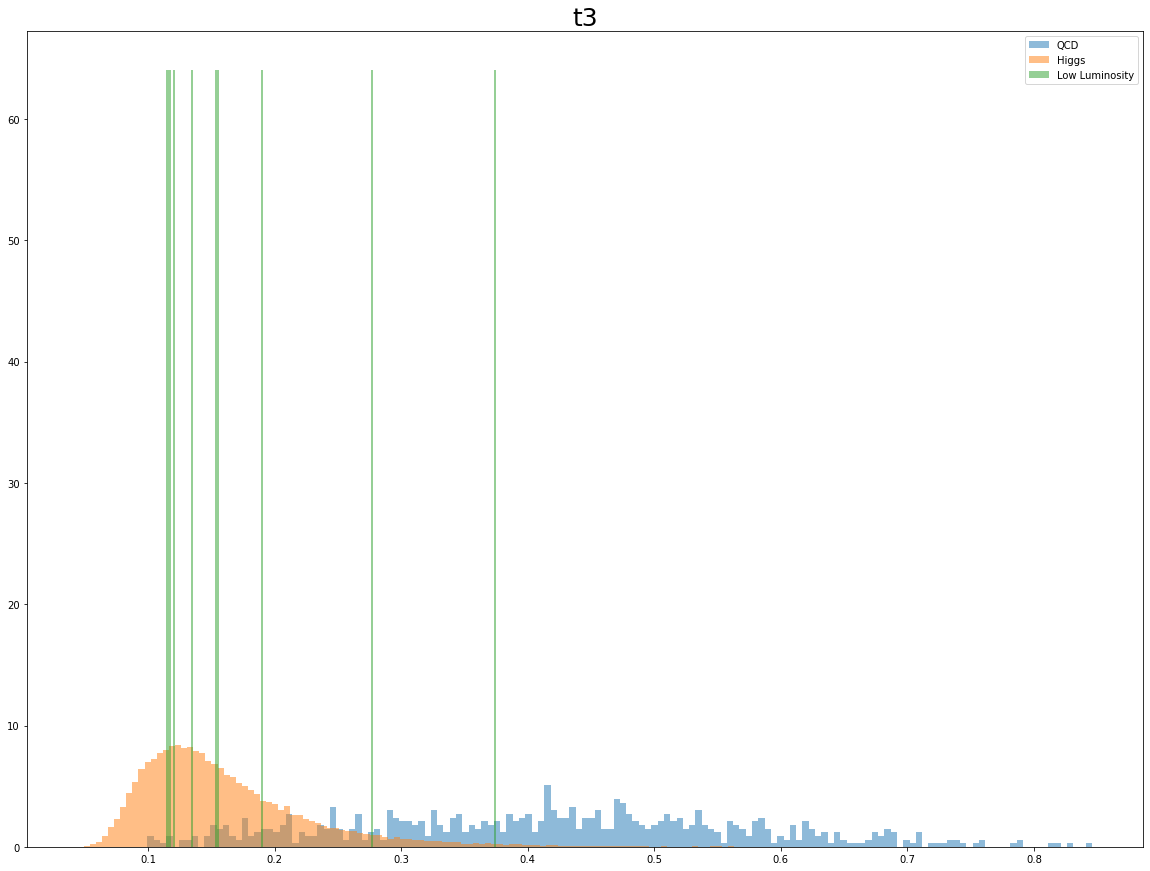

In [238]:
qcd_hist = plt.hist(qcd_cut['t3'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t3'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['t3'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t3',size=25)
plt.legend()
plt.show()

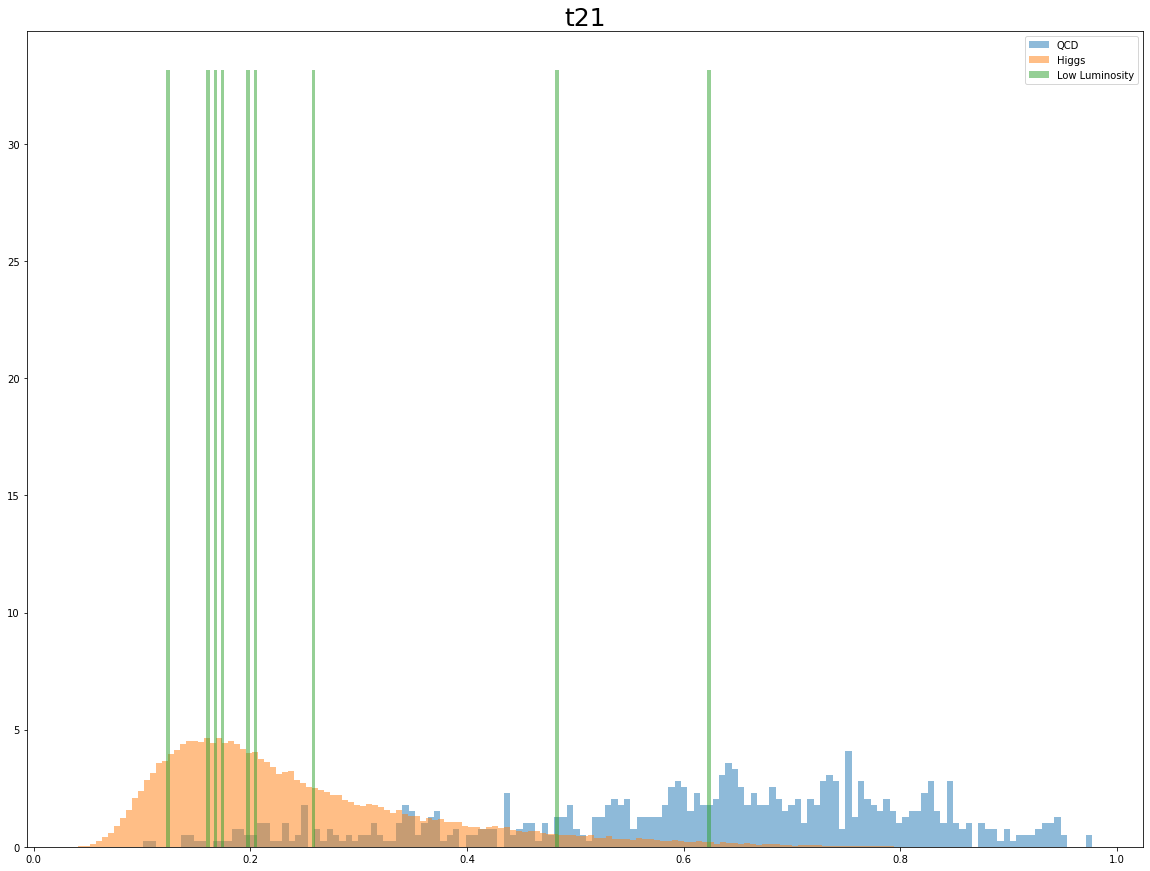

In [239]:
qcd_hist = plt.hist(qcd_cut['t21'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t21'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['t21'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t21',size=25)
plt.legend()
plt.show()

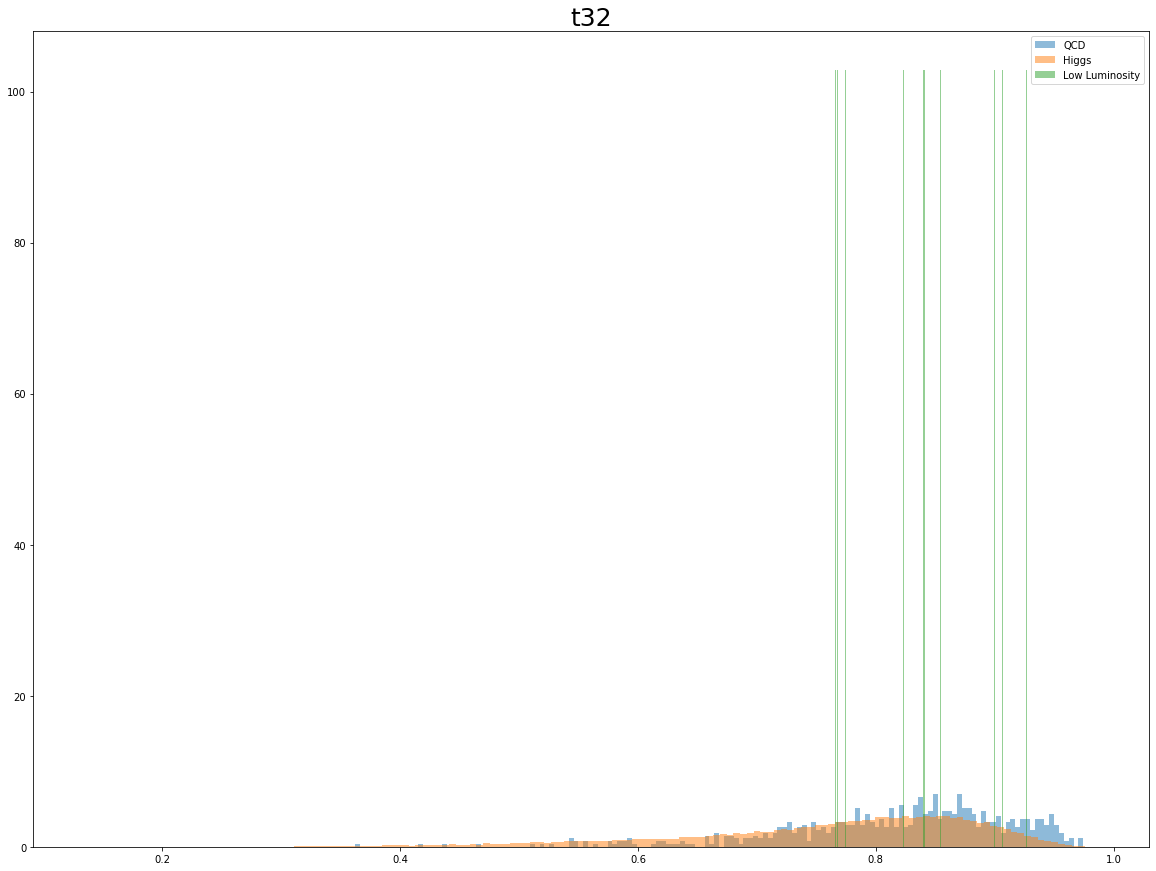

In [240]:
qcd_hist = plt.hist(qcd_cut['t32'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['t32'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['t32'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('t32',size=25)
plt.legend()
plt.show()

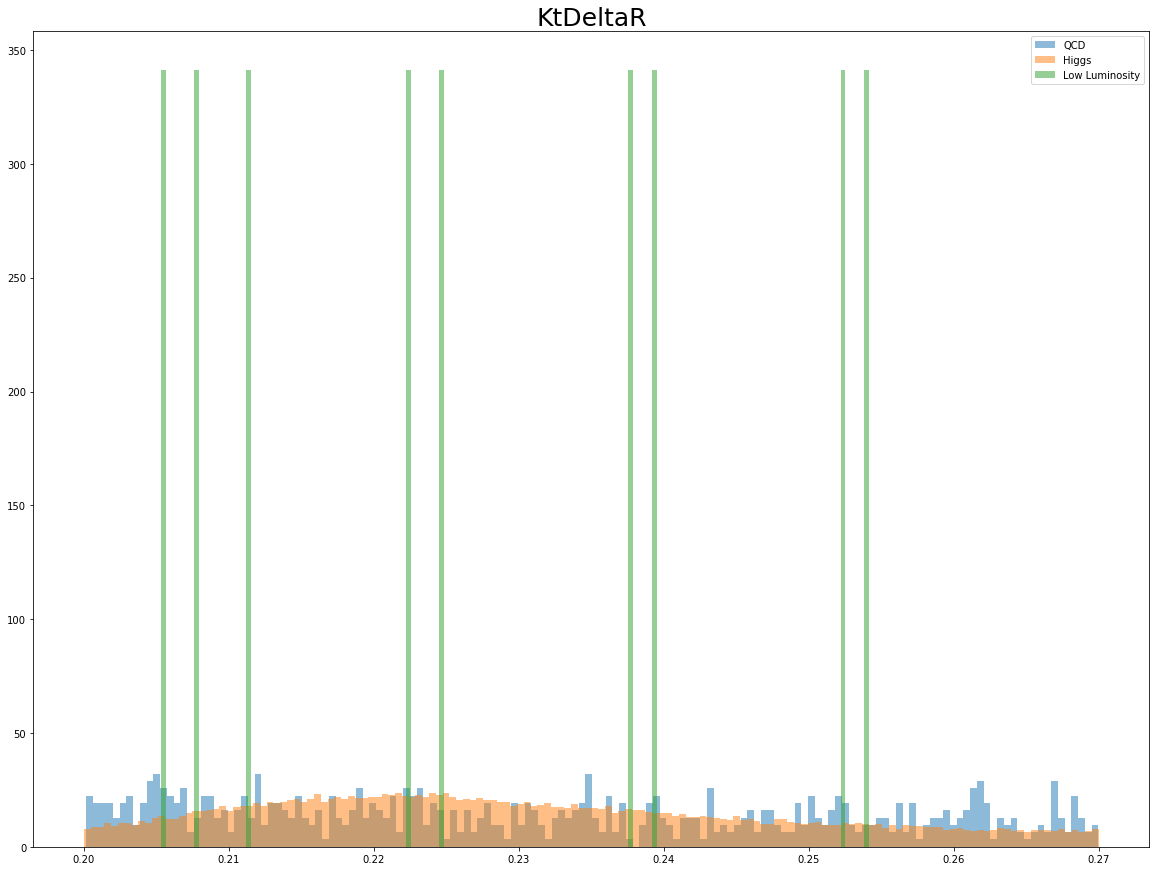

In [241]:
qcd_hist = plt.hist(qcd_cut['KtDeltaR'],density=True, bins=150, label='QCD',alpha=0.5)
higgs_hist = plt.hist(higgs_cut['KtDeltaR'],density=True, bins=150, label='Higgs', alpha=0.5)
low_hist= plt.hist(low_cut['KtDeltaR'],density=True, bins=150, label='Low Luminosity', alpha=0.5)
plt.title('KtDeltaR',size=25)
plt.legend()
plt.show()

In [242]:
N_qcd = len(qcd[qcd_kmcut == 1])/100000*2000
N_low= len(low[low_kmcut == 1])
prob=stats.poisson.sf(N_low, N_qcd)
sig=stats.norm.isf(prob)
print('Observed significance is',sig)

Observed significance is -1.0654906985448571


Our observed significance is much lower than our expected significance, 6.7 sigma. I think these cuts work better for the high luminosity.

### 3. 95% Confidence Level of signal yields

- In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
- Evaluate the expected 95% confidence level upper limit
- Evaluate the observed 95% confidence level upper limit
- Compare expectation to observation. Comment on your finding.

In [245]:
higgs_kmcut = (higgs['KtDeltaR']>0.2) & (higgs['KtDeltaR'] <0.27) & (higgs['mass']>125) & (higgs['mass'] <135)
qcd_kmcut = (qcd['KtDeltaR']>0.2) & (qcd['KtDeltaR'] <0.27) & (qcd['mass']>125) & (qcd['mass'] <135)
new_N_higgs = 50*len(higgs['mass'][higgs_kmcut])/size
new_N_qcd = 2000*len(qcd['mass'][qcd_kmcut])/size
sig = new_N_higgs / np.sqrt(new_N_qcd)
print('Expected significance is',sig)
up_sig = (new_N_higgs + 2*np.sqrt(new_N_qcd))/np.sqrt(new_N_qcd)
low_sig = (new_N_higgs - 2*np.sqrt(new_N_qcd))/np.sqrt(new_N_qcd)
print('The expected 95% confidence level upper limit is',up_sig)
print('The expected 95% confidence level lower limit is',low_sig)
prob=stats.poisson.sf(N_low+N_qcd+2*np.sqrt(N_qcd), N_qcd)
up_lim = stats.norm.isf(prob)
print('The observed 95% confidence level upper limit is ', up_lim)

Expected significance is 6.7328596428864005
The expected 95% confidence level upper limit is 8.7328596428864
The expected 95% confidence level lower limit is 4.7328596428864005
The observed 95% confidence level upper limit is  3.8415228648165565


The expectation (8.7) is higher than the observation (3.8) of 95% confidence of the upper limit. It makes sense that the confidence interval changes because we did cut the data to maximize the significance.